In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
import math

In [12]:
df = pd.read_csv('./Experiments/10,000_Trials_#1/stats.csv')

In [13]:
# models 
models = ['SVC', 'GradientBoosting', 'GaussianNB', 'DecisionTree', 'KNeighbors', 'AdaBoost', 'RandomForest', 'MLP', 'QDA', 'CatBoost', 'ExtraTrees', 'Bagging', 'Ridge', 'PassiveAggressive', 'SGDOneClassSVM', 'Dummy', 'HistGradientBoosting', 'LGBM', 'XGB']
# Diagnosis options
diagnosis_options = ['cath', 'lad', 'lcx', 'rca', 'vhd', 'rwma']

In [14]:
# Scoring function
def get_score(target):
    accuracy_reciprocal_sum = sum(df[f'{target} - accuracy'].rdiv(1))
    precision_reciprocal_sum = sum(df[f'{target} - precision'].rdiv(1))
    trials_num = len(df)
    accuracy_sum = sum(df[f'{target} - accuracy'])
    time_to_fit_ms = st.mean(df[f'{target} - time to fit']/1000000)

    score = 0.14 * (trials_num / (precision_reciprocal_sum)) + 0.85 * (accuracy_sum / trials_num) - (0.01 * math.log(time_to_fit_ms, 12))
    return score

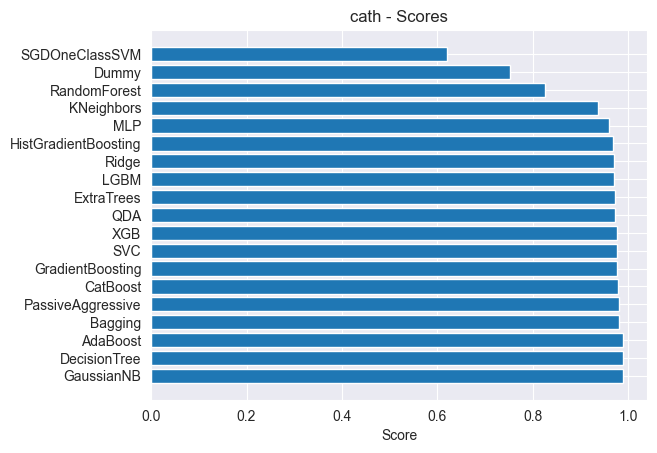

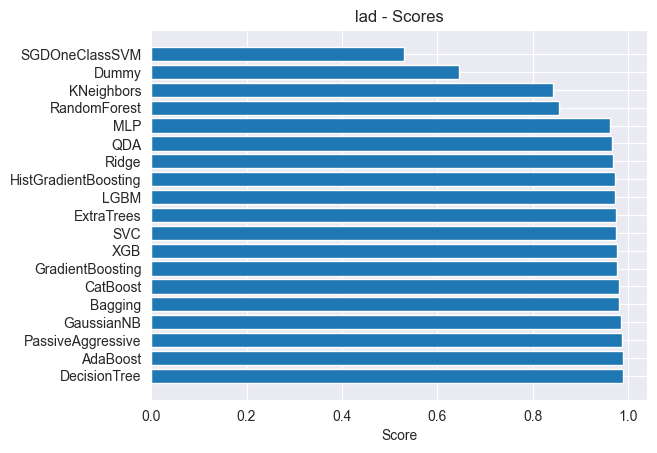

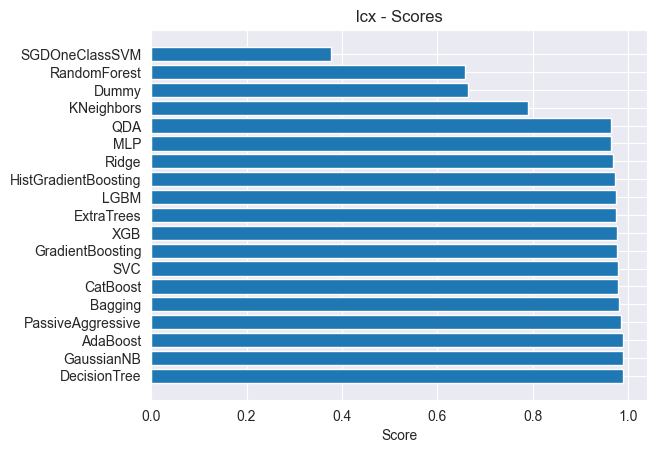

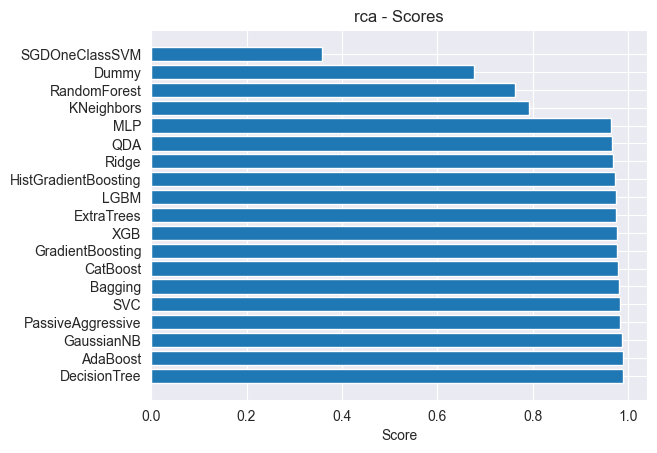

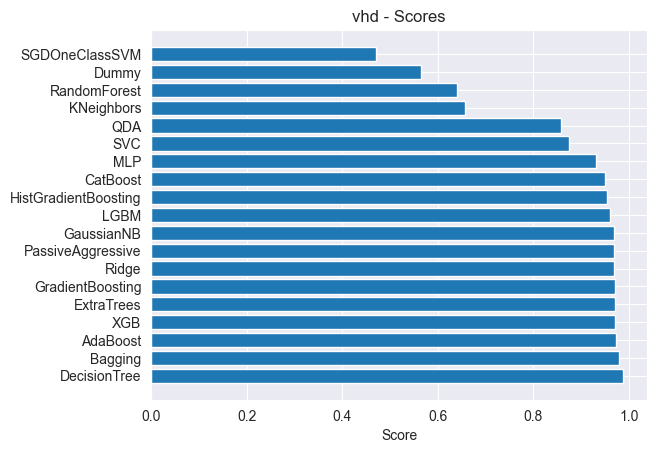

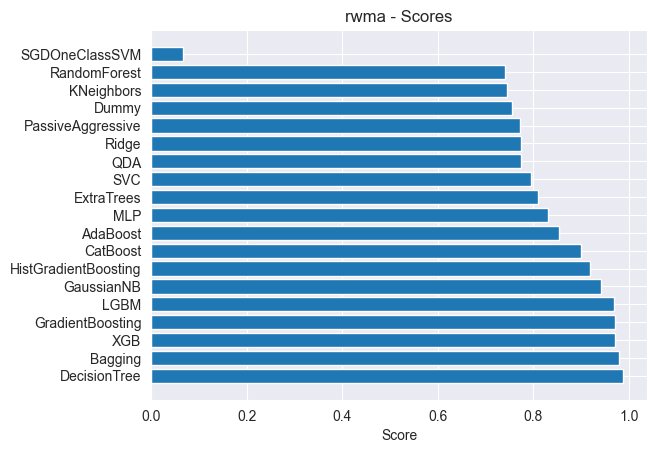

In [15]:
# Create a horizontal bar plot of all scores for every type of diagnosis
for options in diagnosis_options:
    scores = {}
    for model in models:
        scores.update({model: get_score(f'{options} - {model}')})

    all_scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
    plt.barh(range(len(all_scores_sorted)), list(all_scores_sorted.values()), align='center')
    plt.yticks(range(len(all_scores_sorted)), list(all_scores_sorted.keys()))
    plt.xlabel('Score')
    plt.title(f'{options} - Scores')
    plt.show()


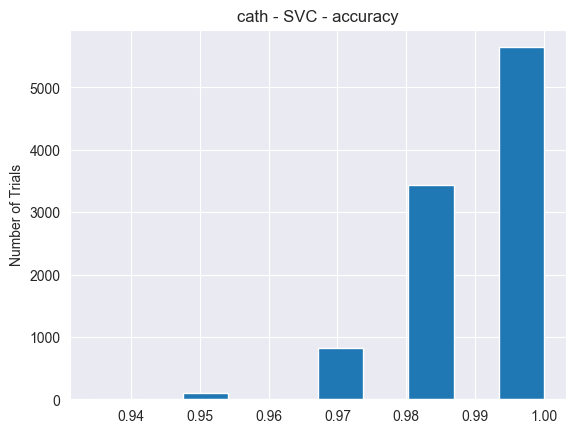

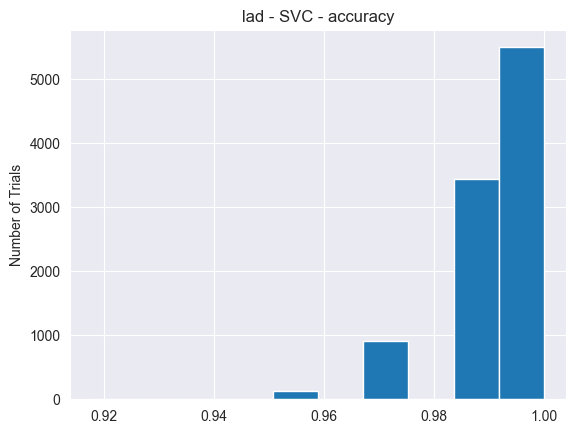

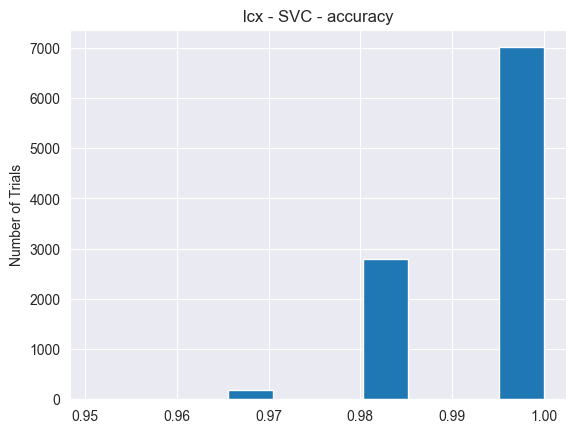

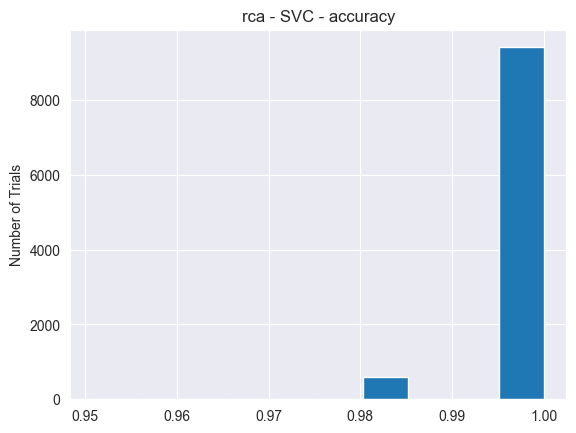

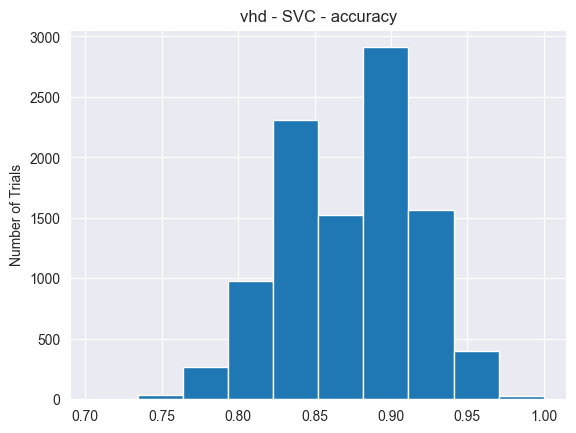

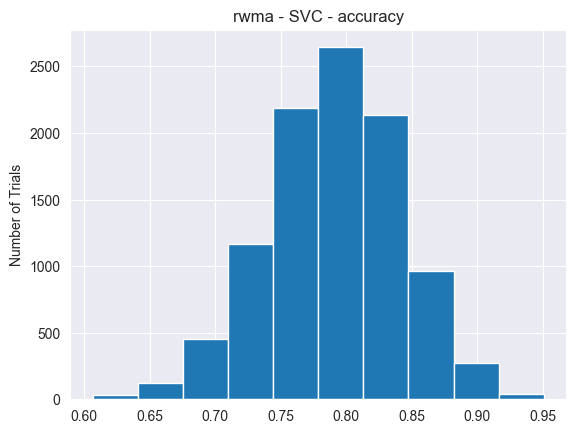

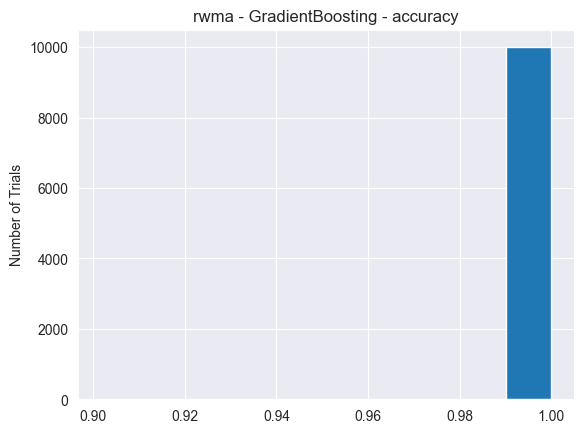

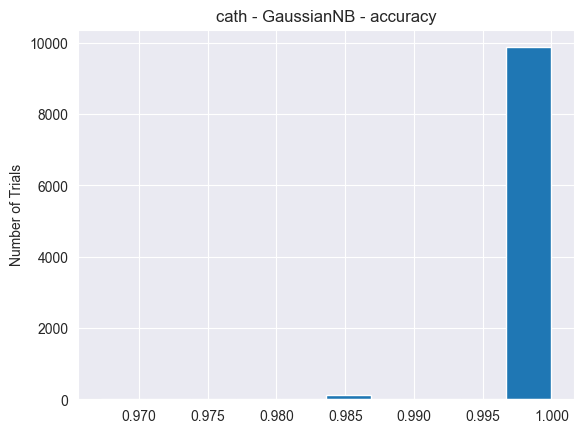

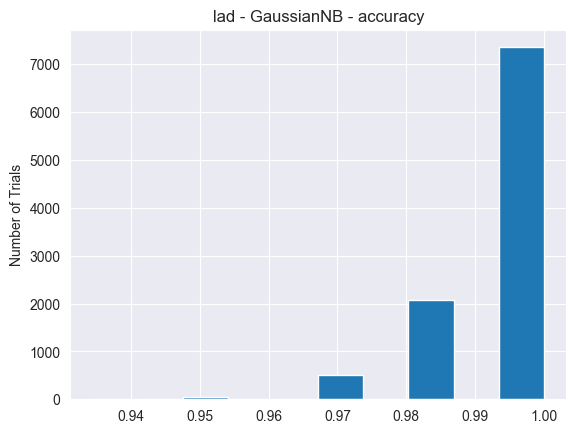

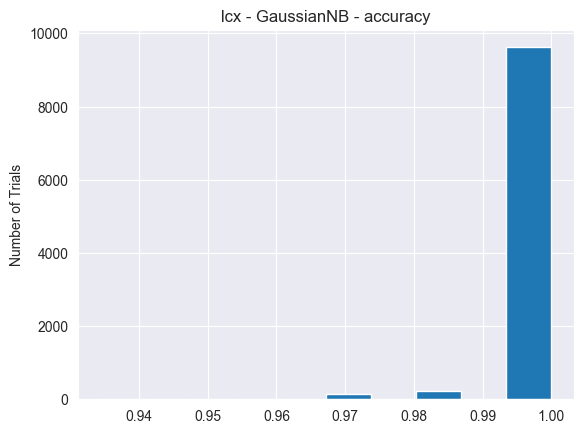

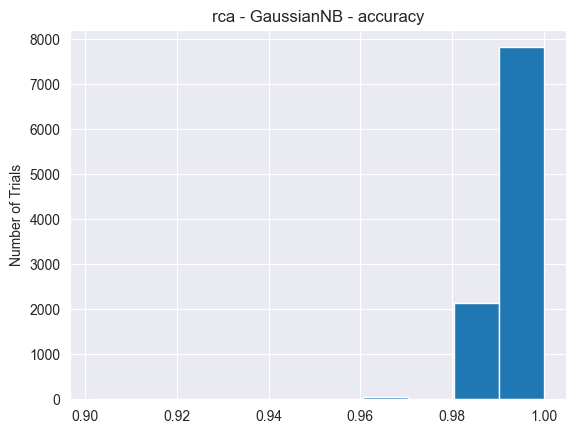

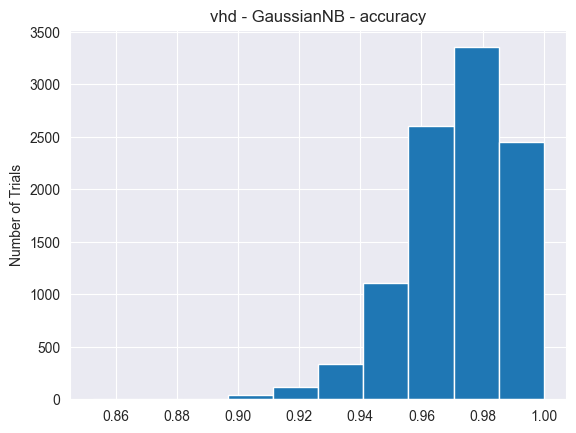

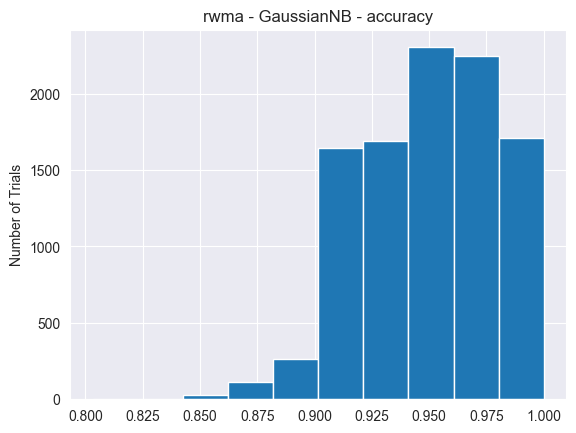

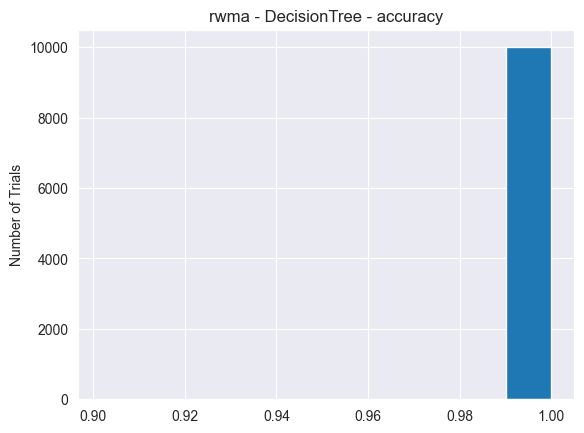

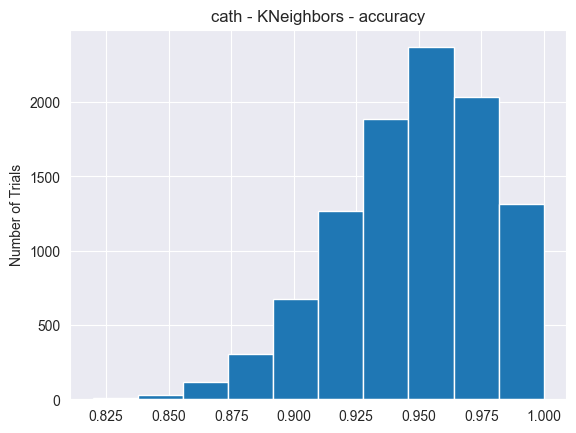

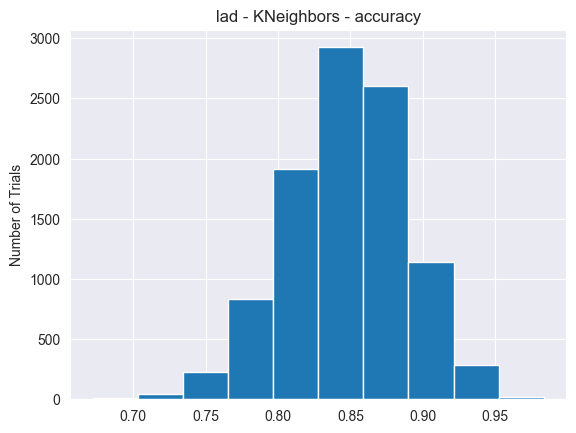

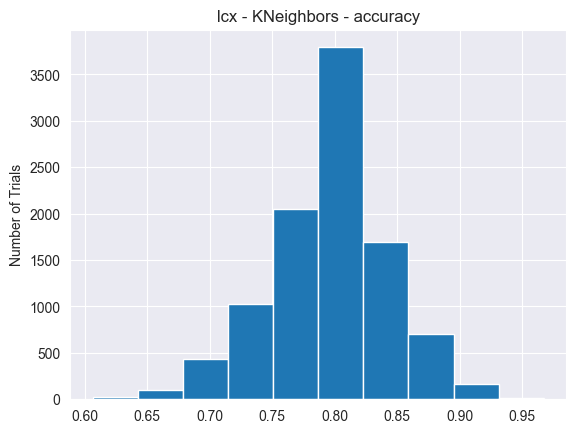

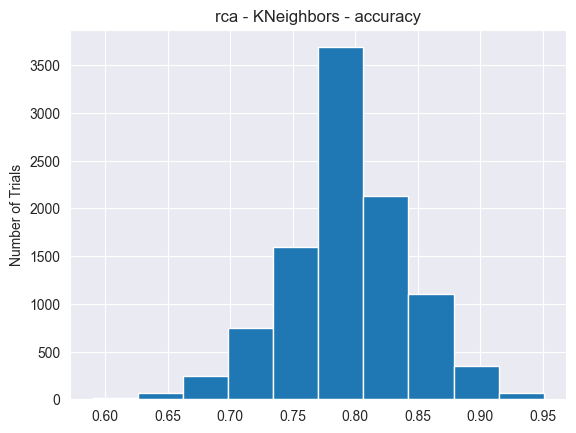

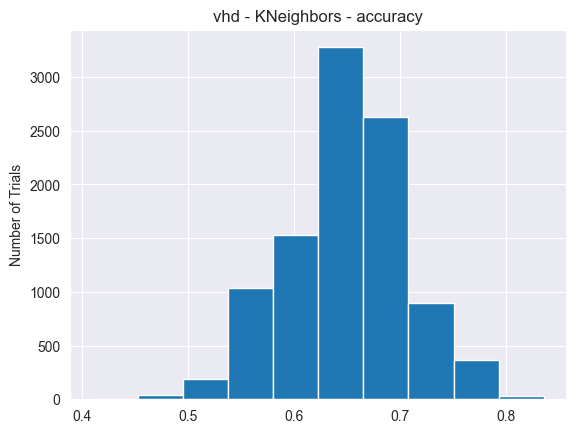

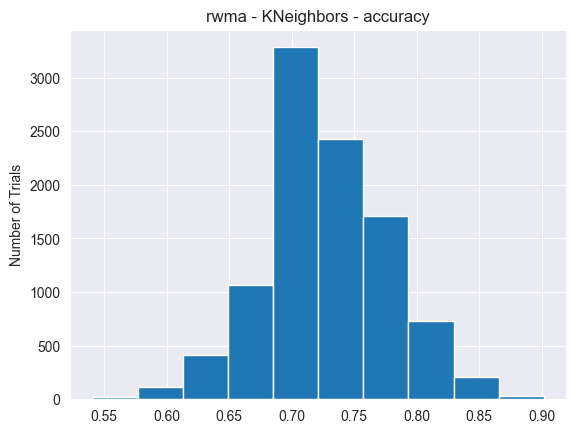

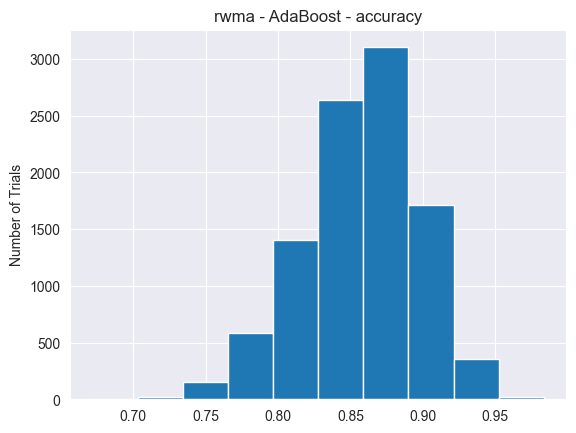

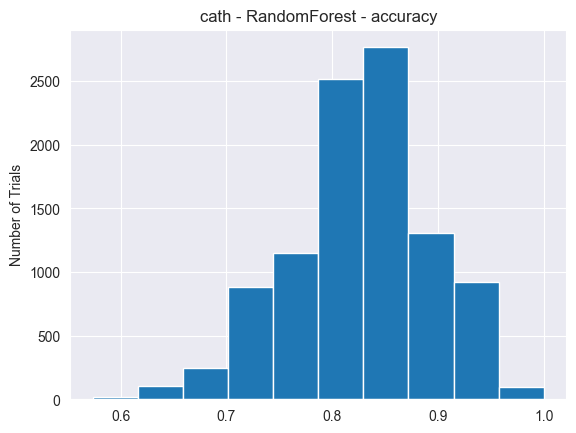

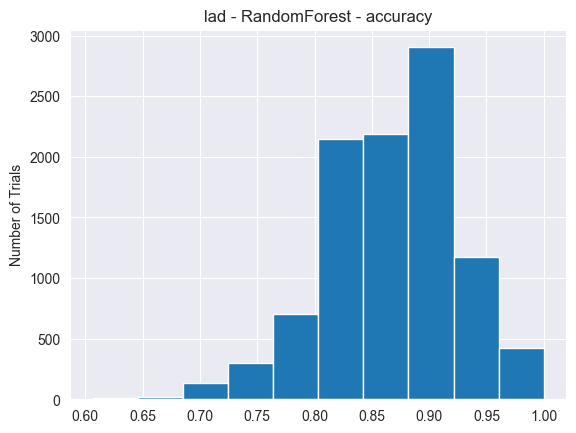

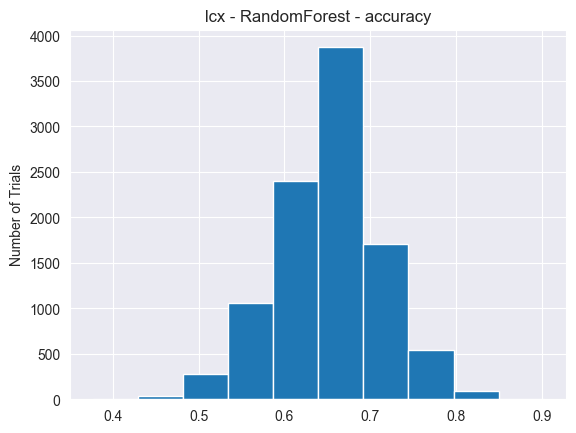

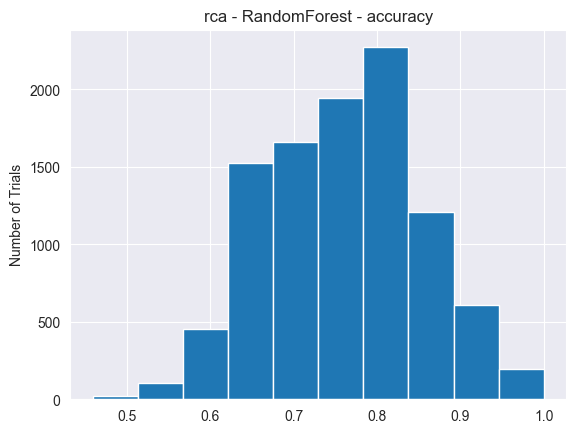

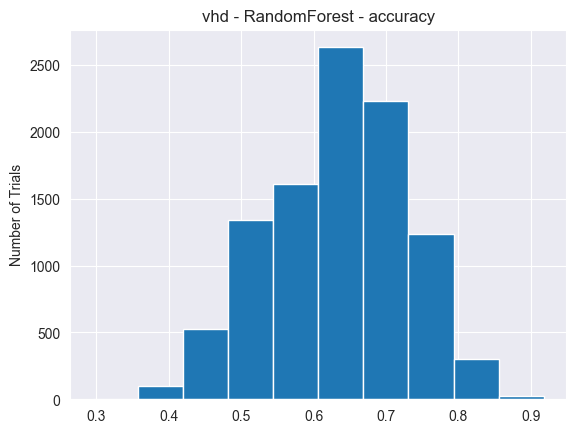

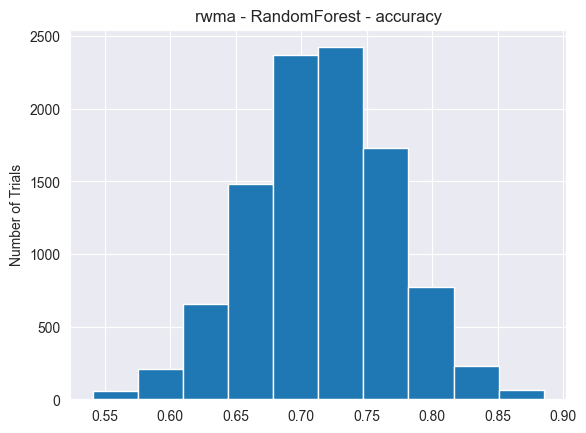

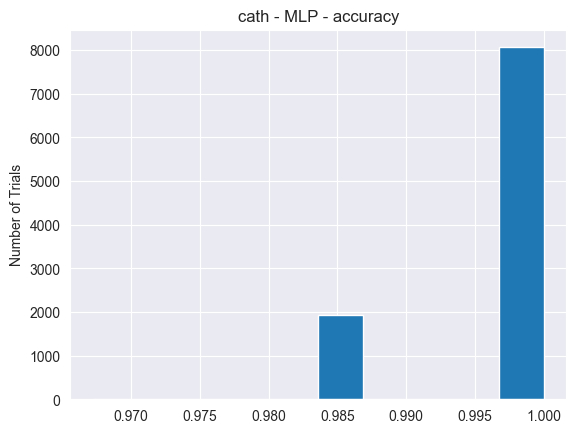

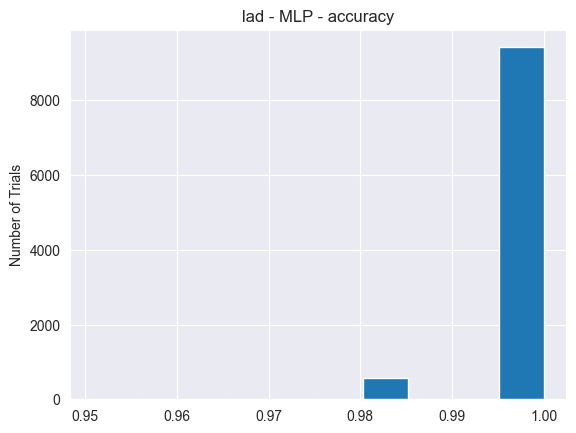

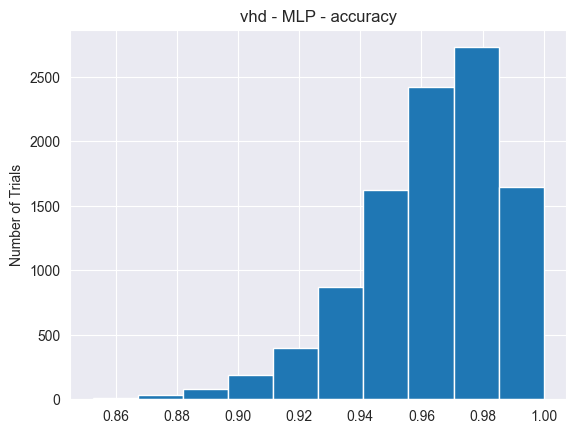

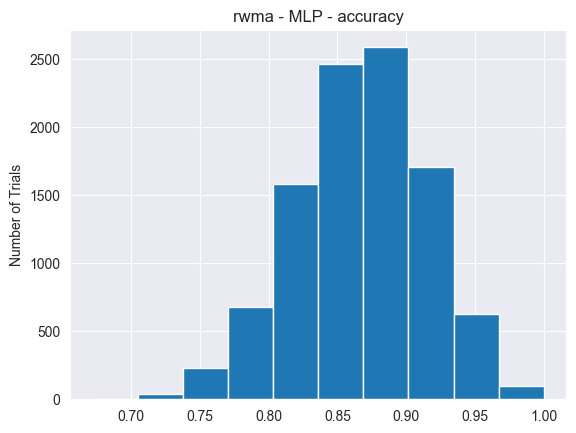

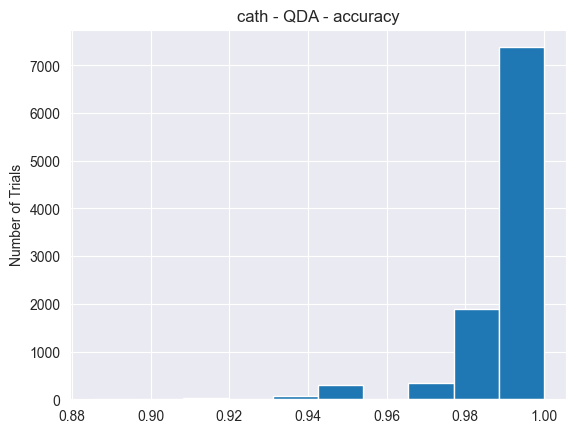

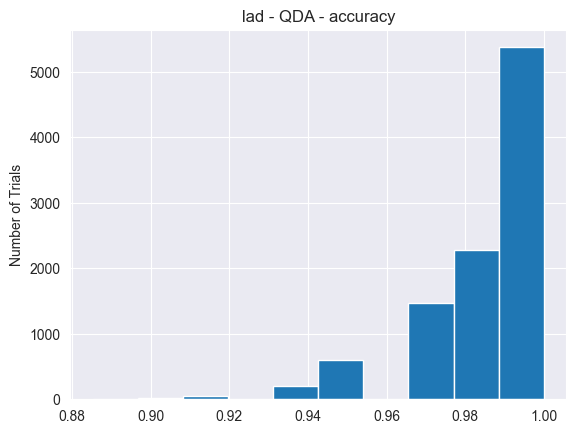

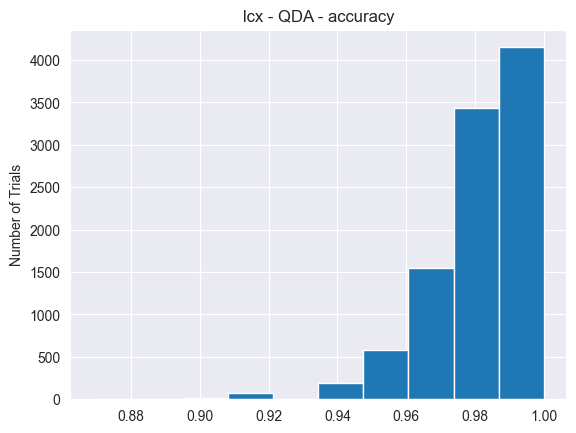

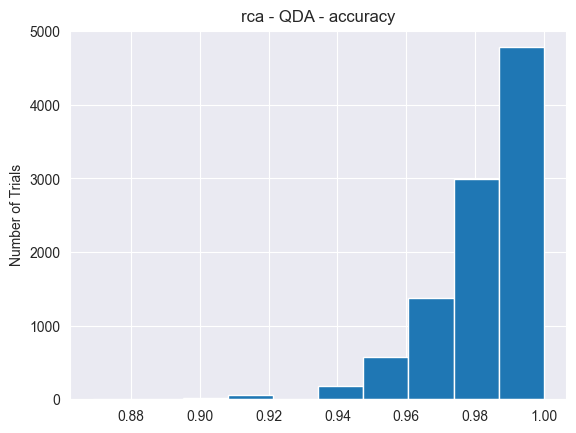

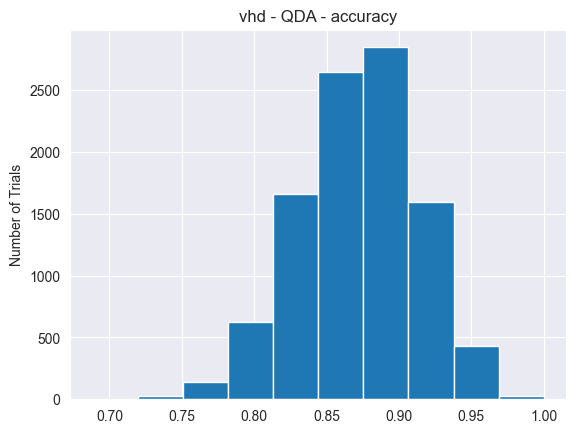

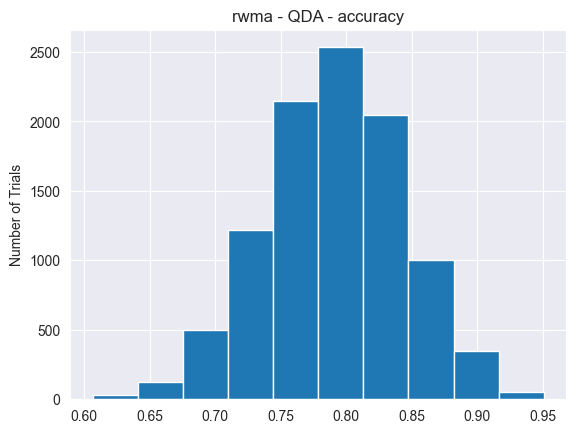

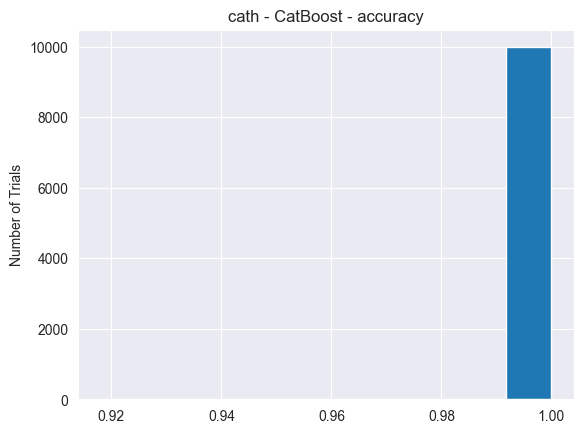

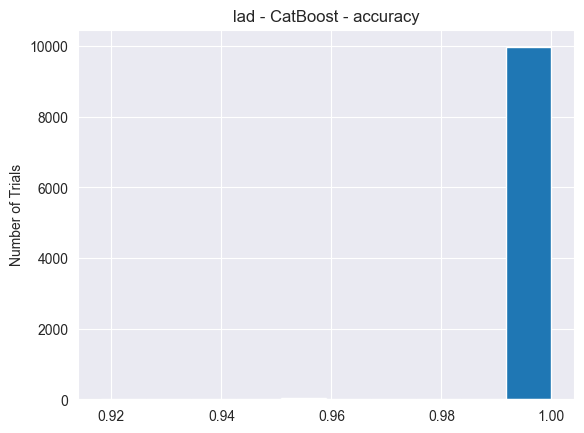

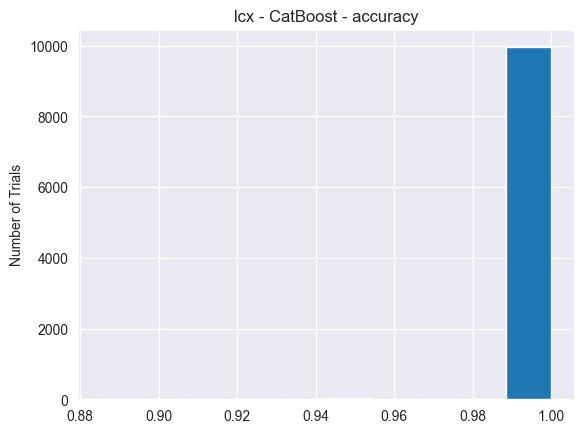

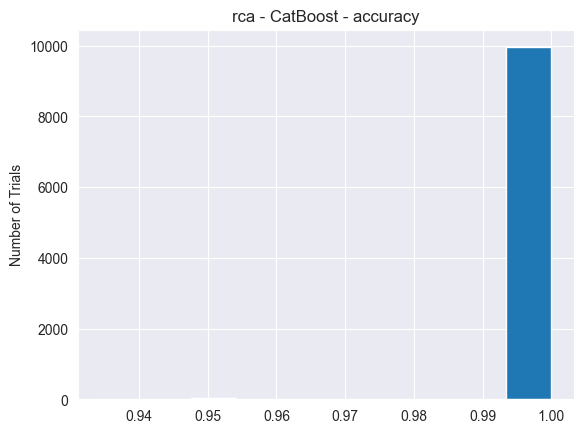

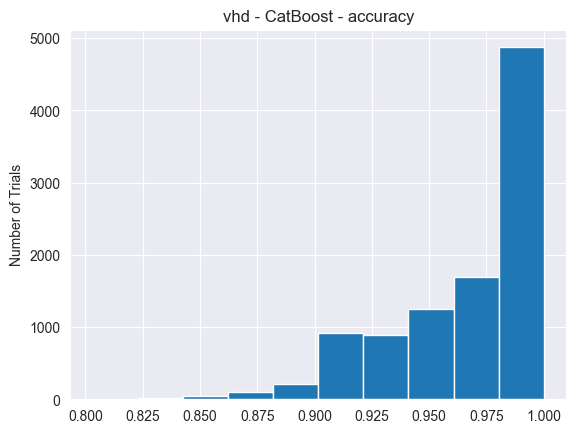

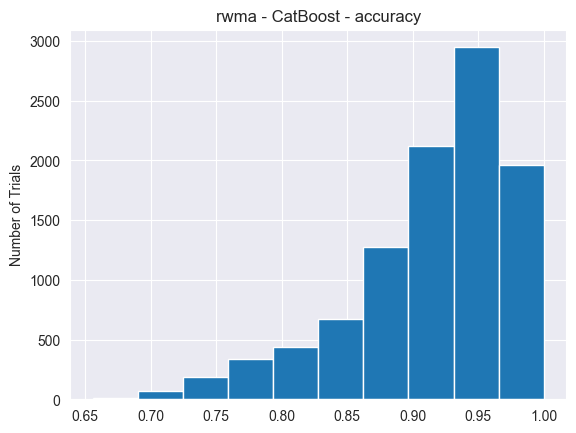

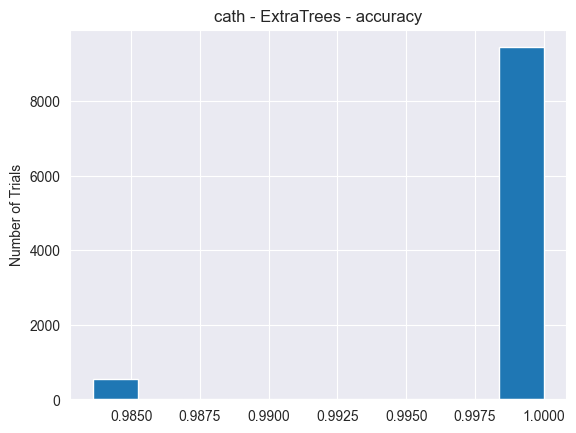

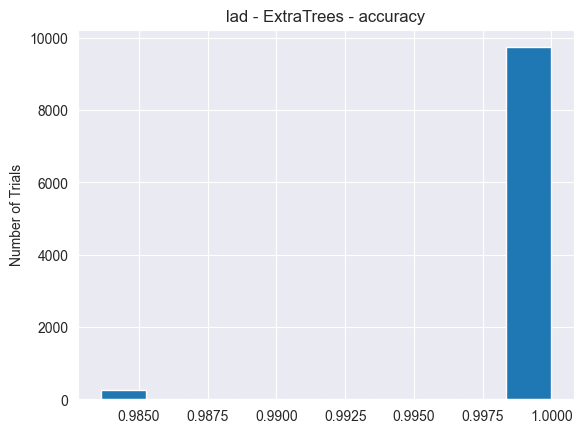

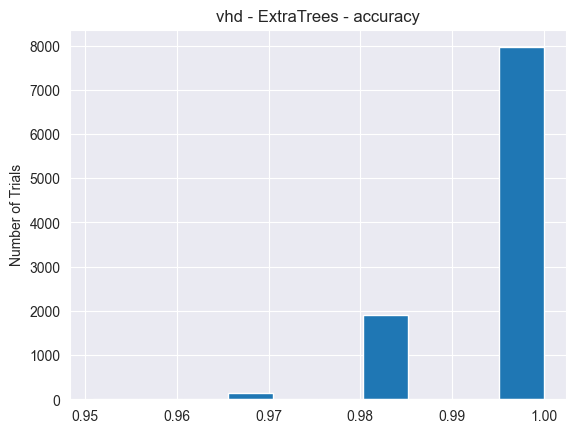

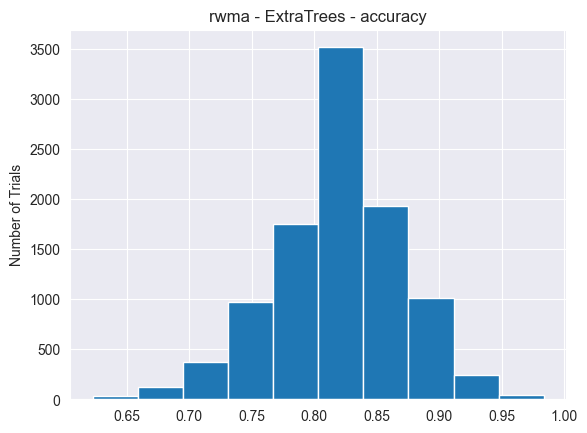

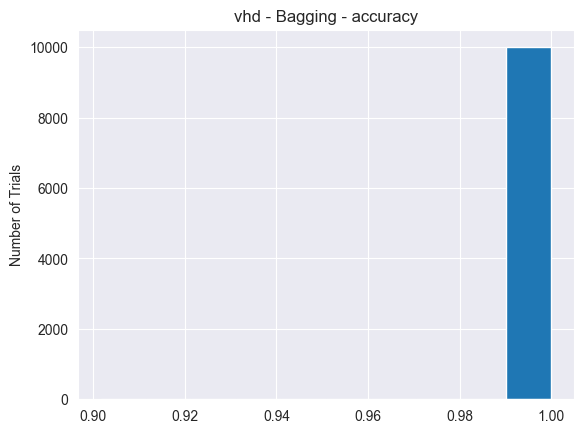

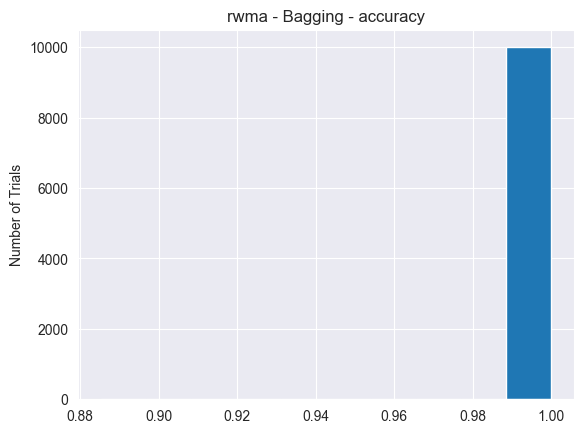

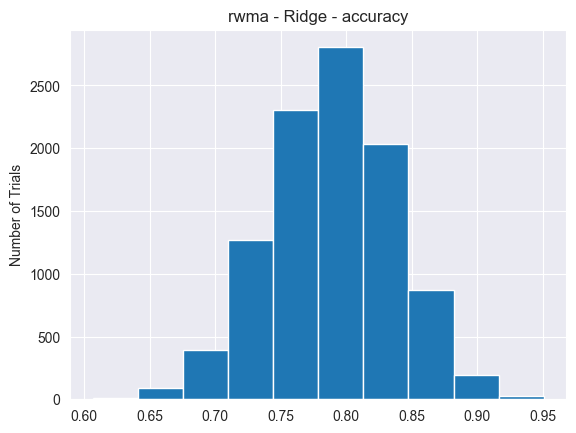

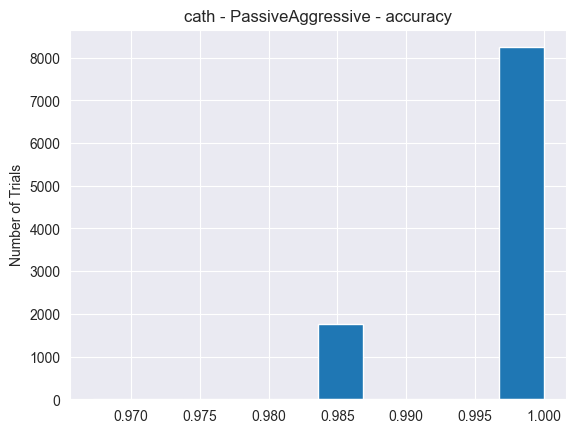

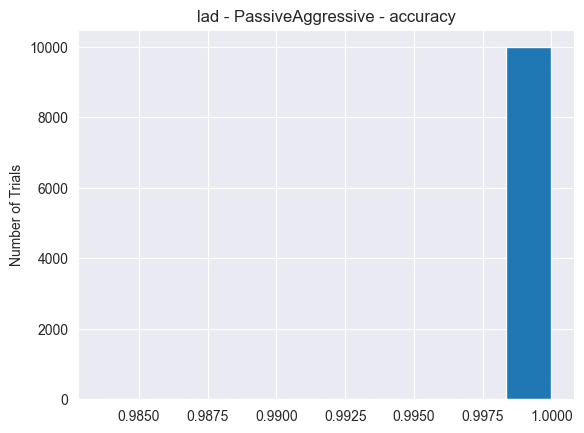

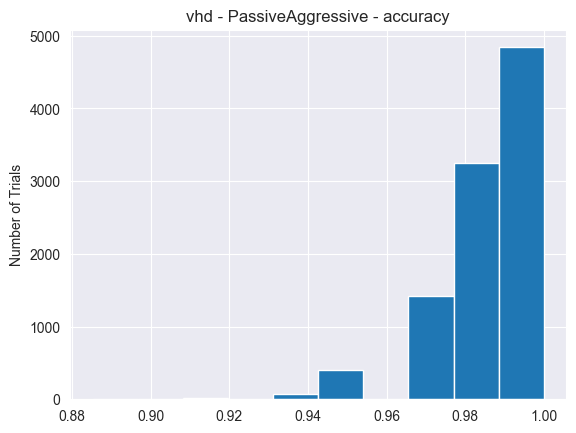

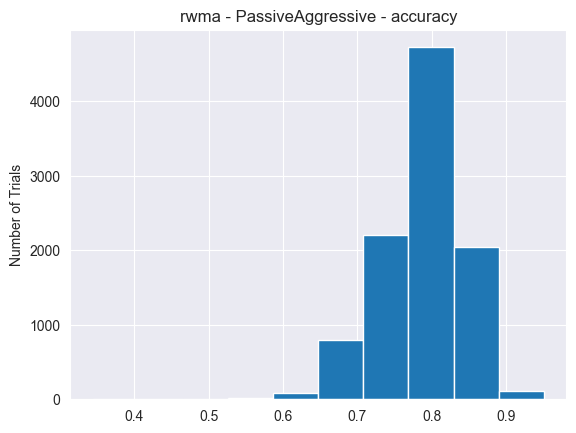

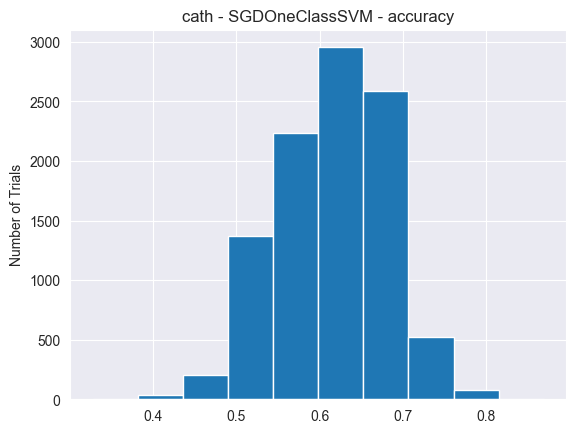

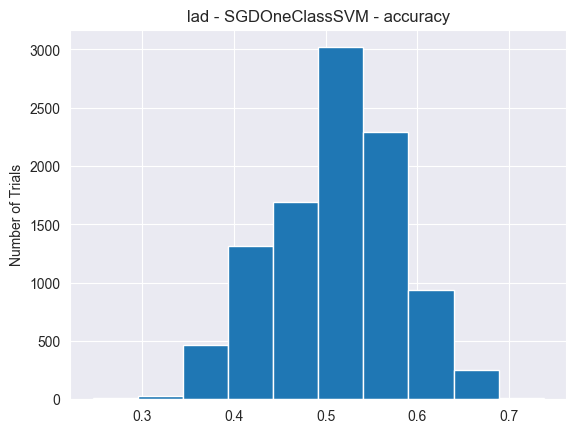

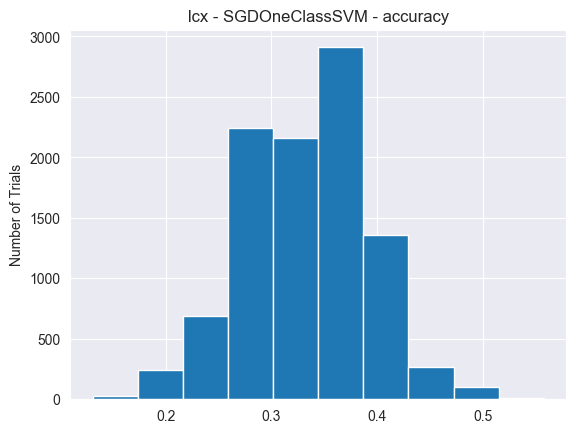

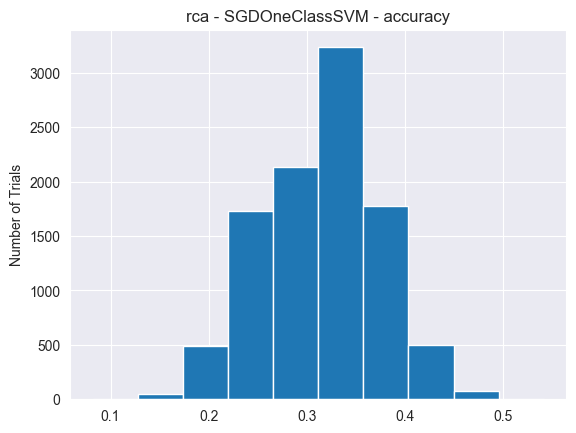

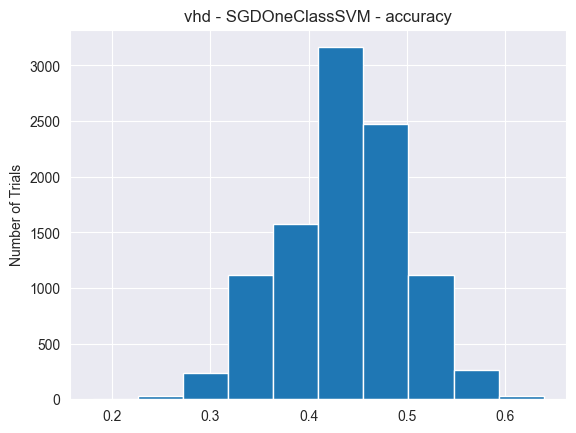

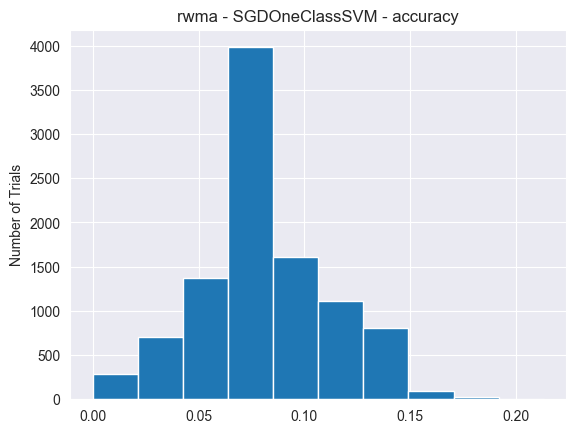

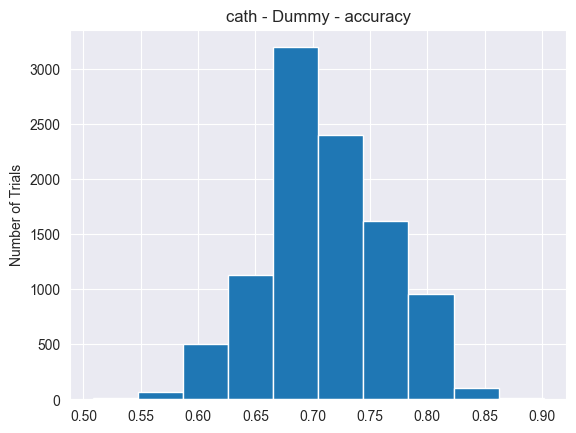

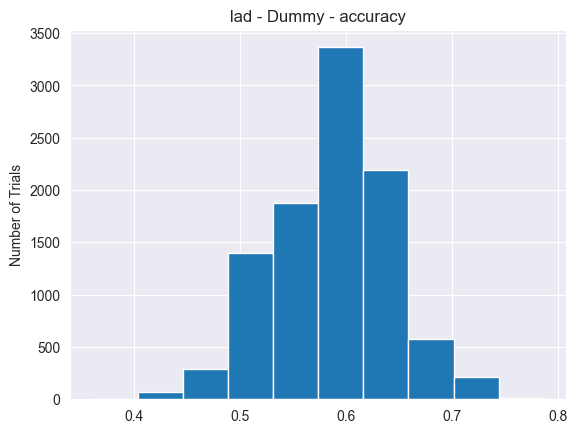

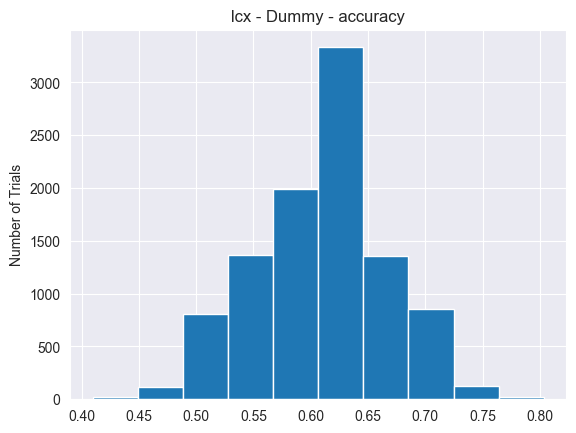

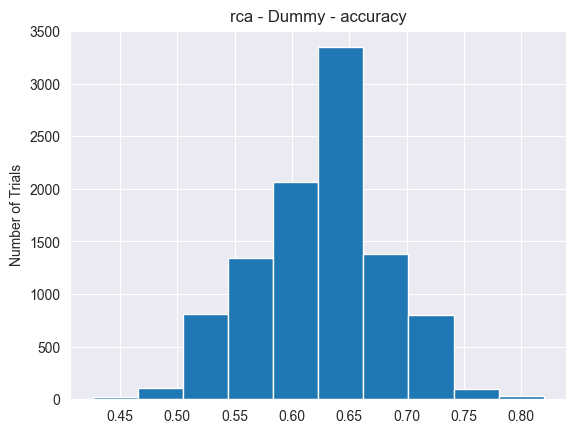

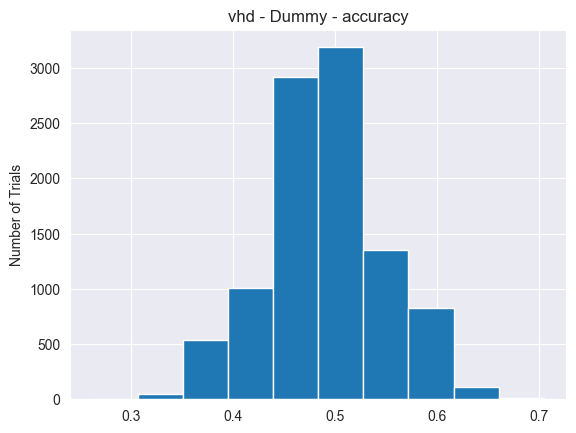

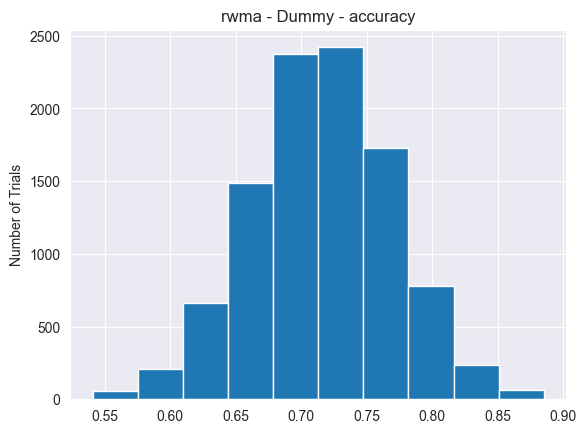

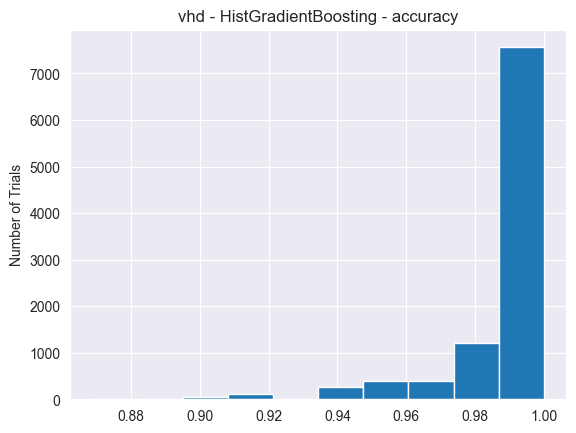

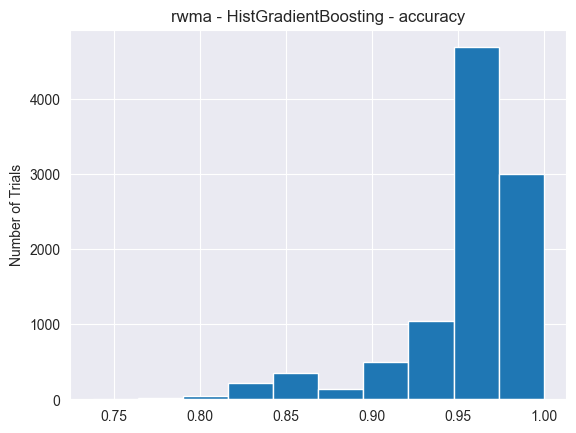

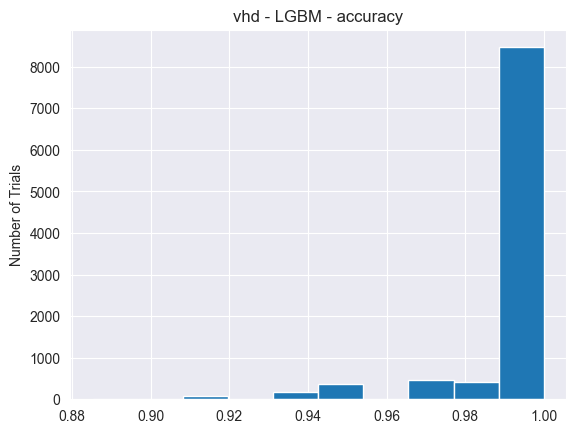

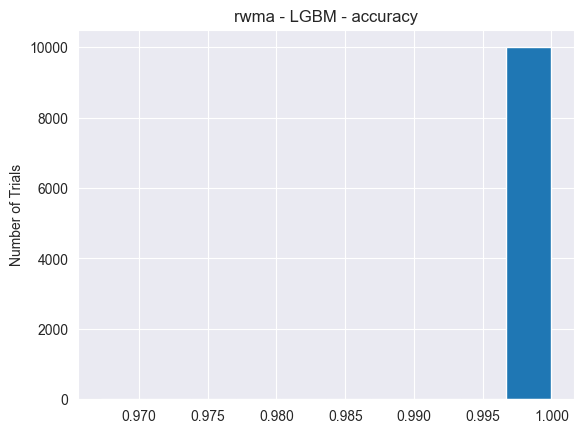

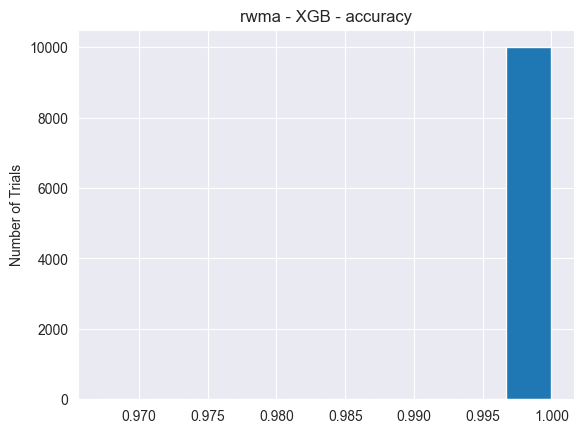

In [18]:
# Distribution of accuracy
for i in df.columns:
    if min(df[i]) != 1.0 and "accuracy" in i and 'balanced' not in i in i:
        plt.hist(df[i])
        plt.title(i)
        plt.ylabel('Number of Trials')
        plt.show()

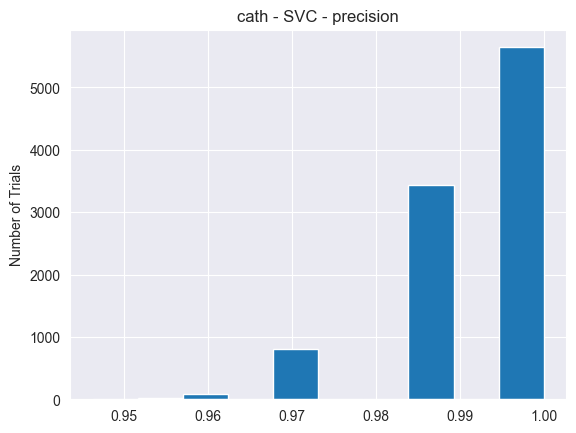

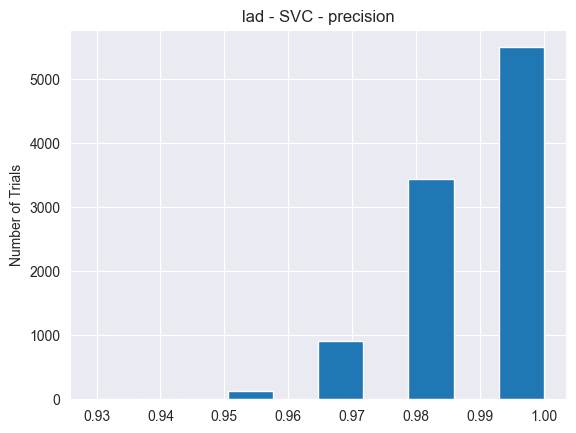

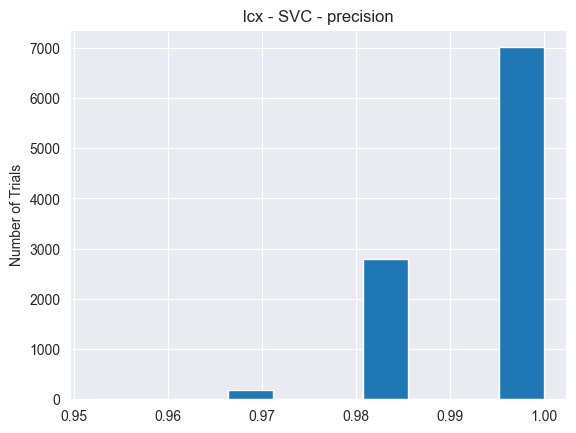

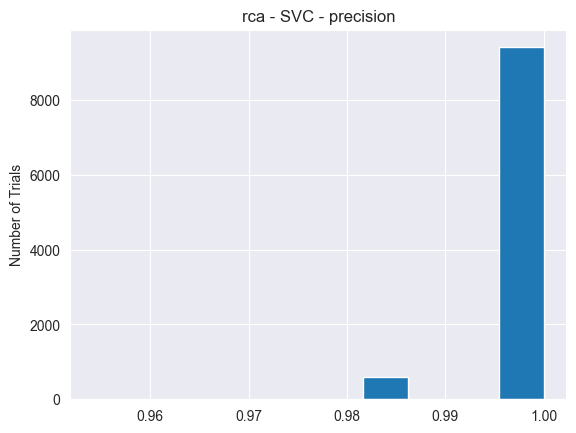

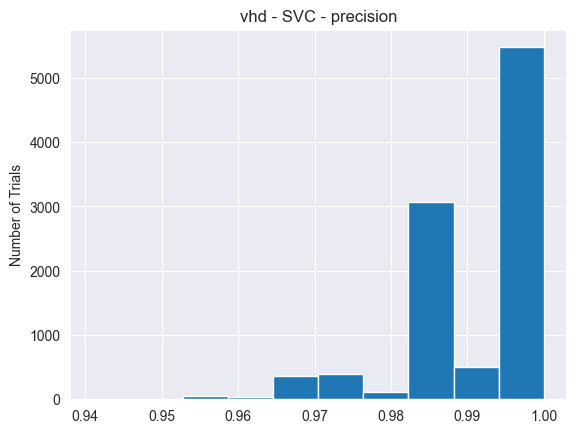

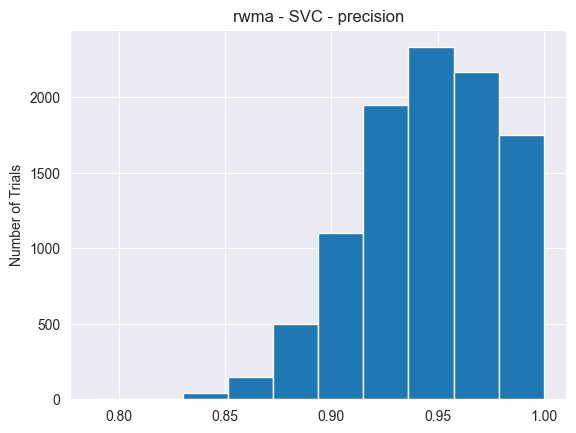

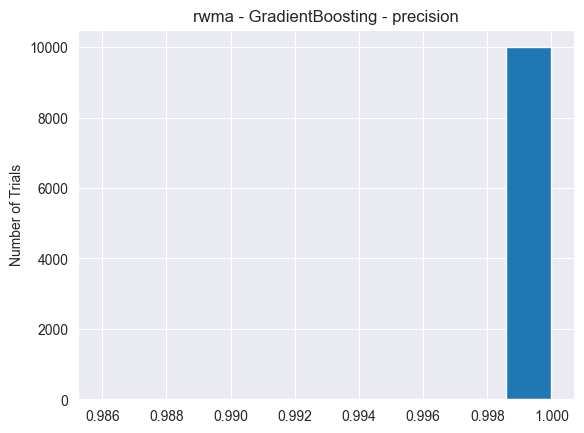

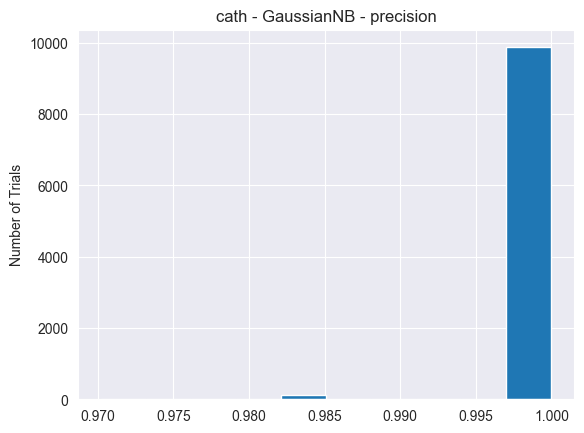

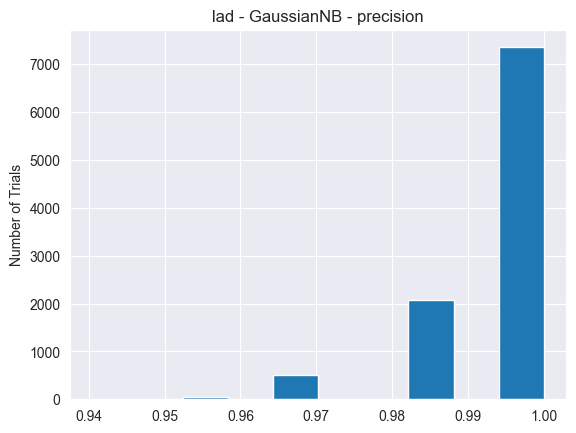

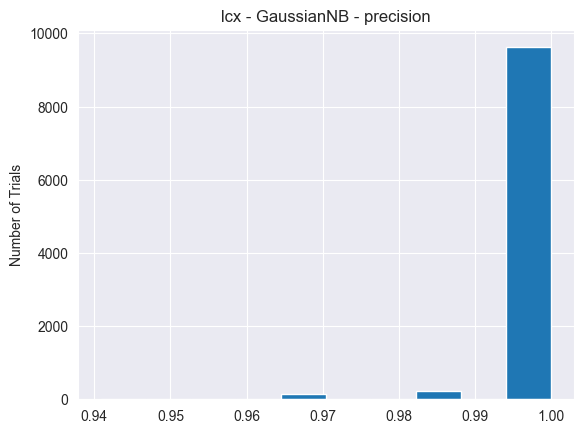

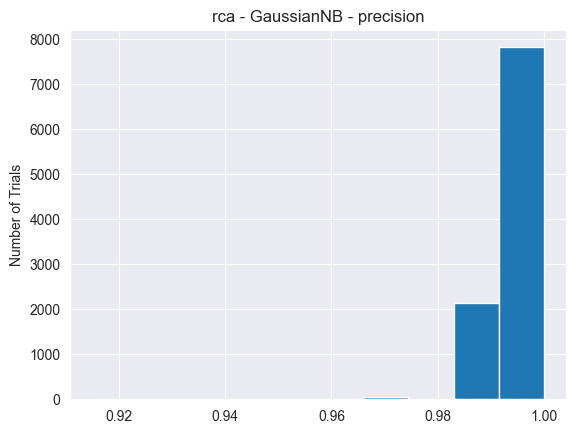

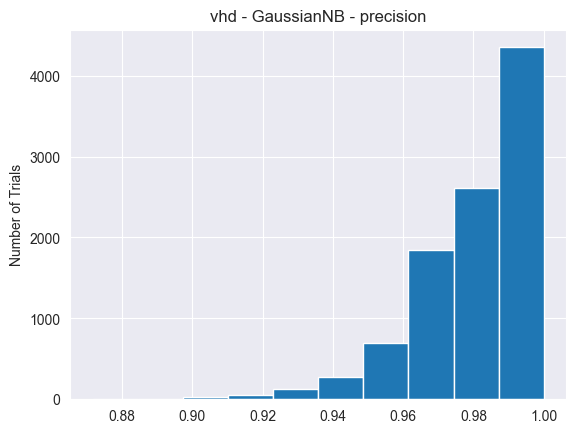

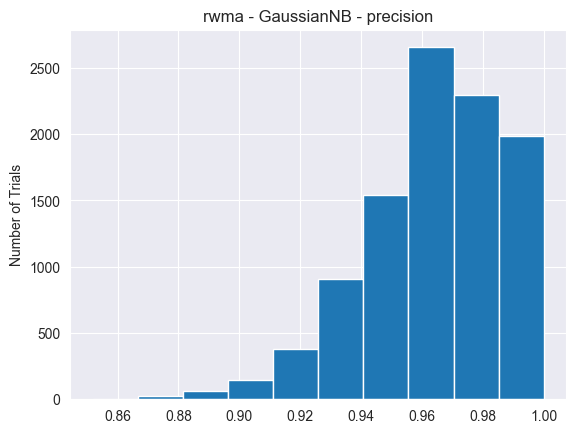

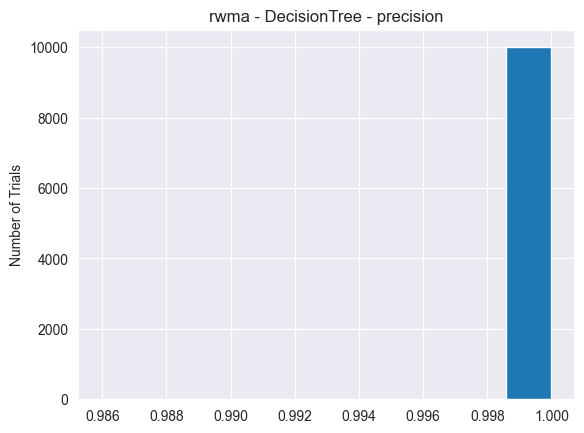

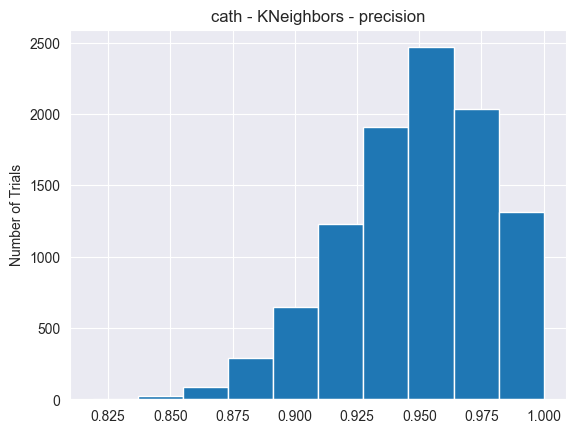

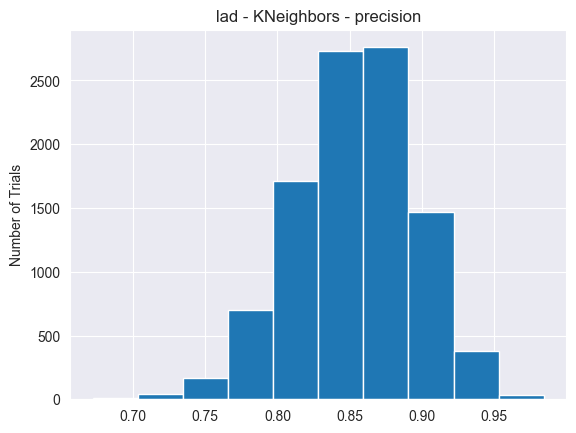

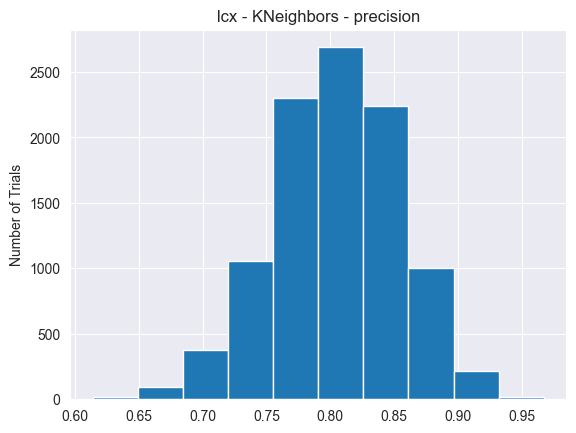

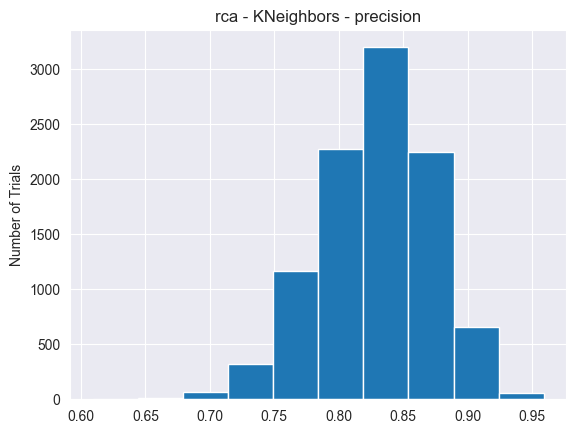

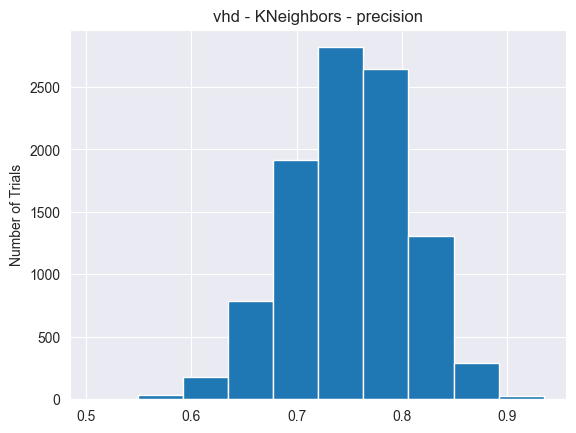

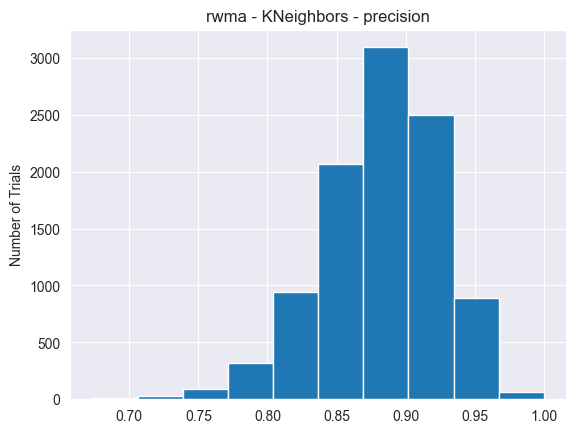

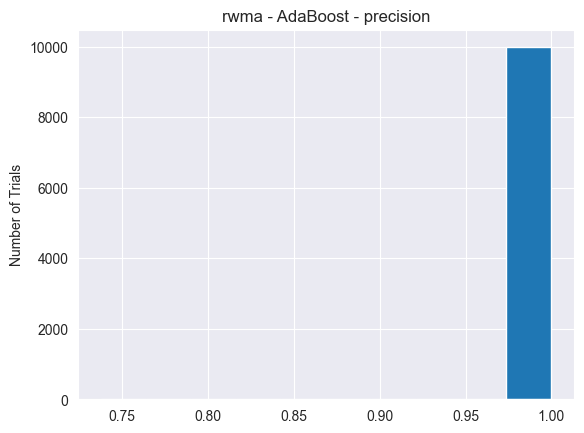

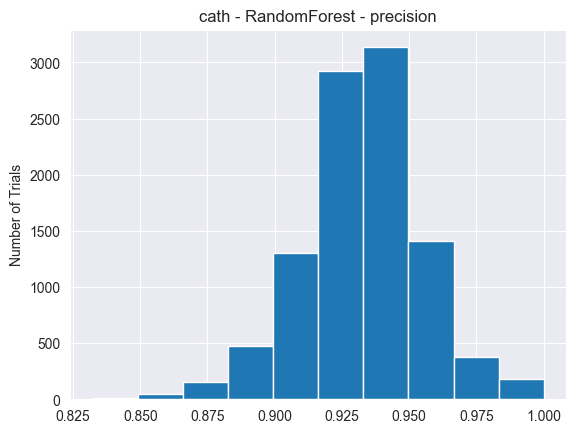

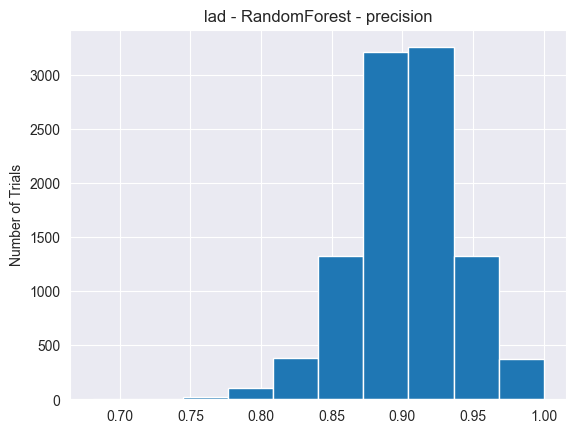

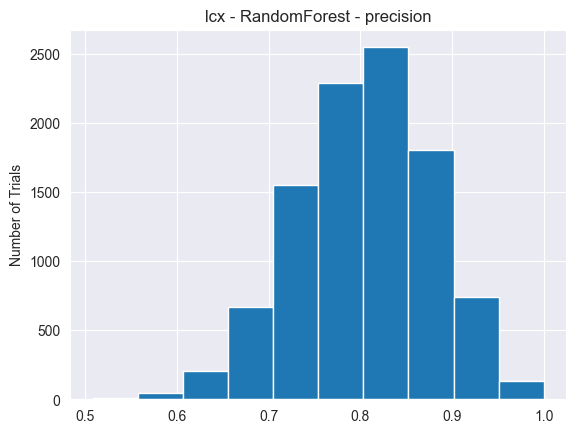

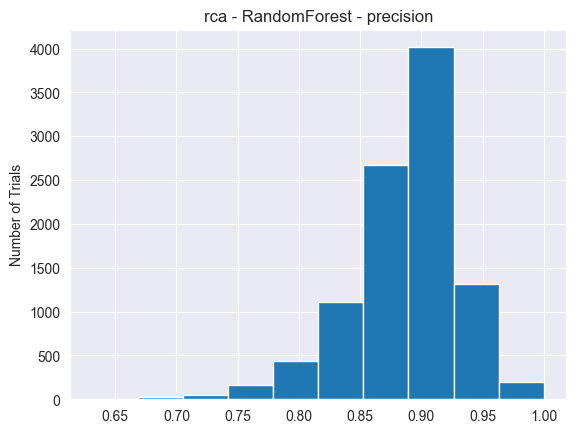

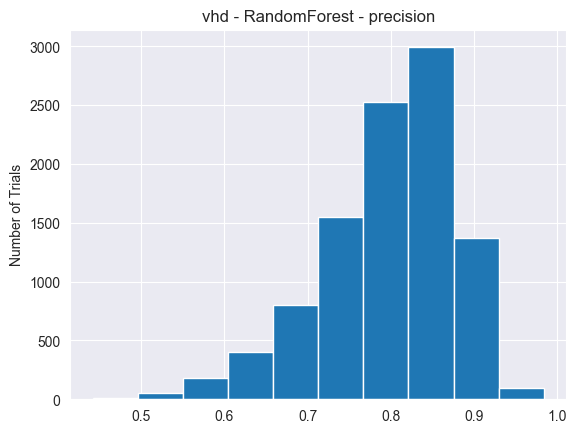

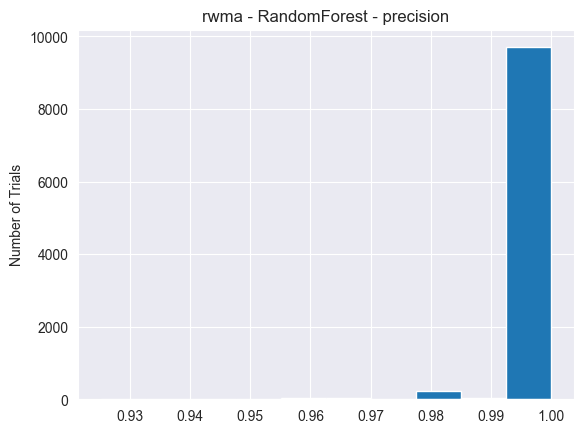

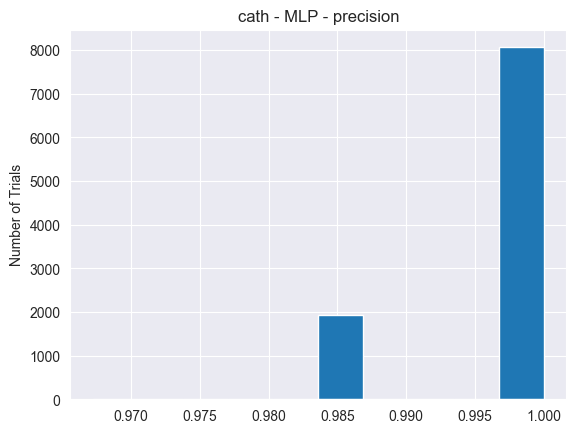

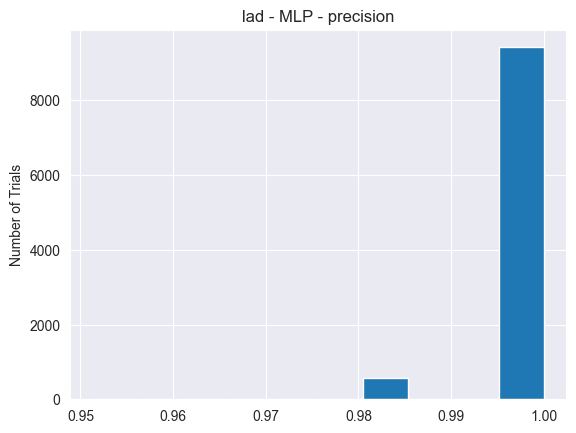

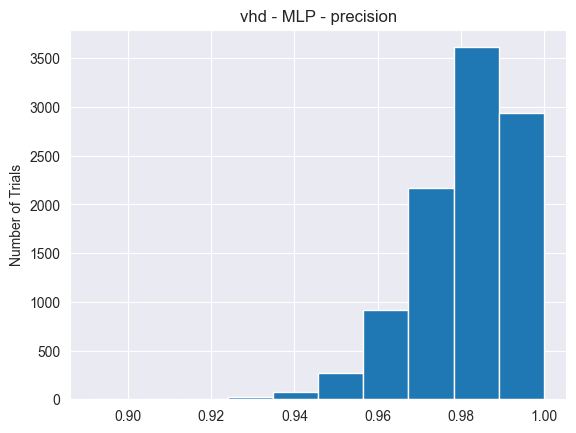

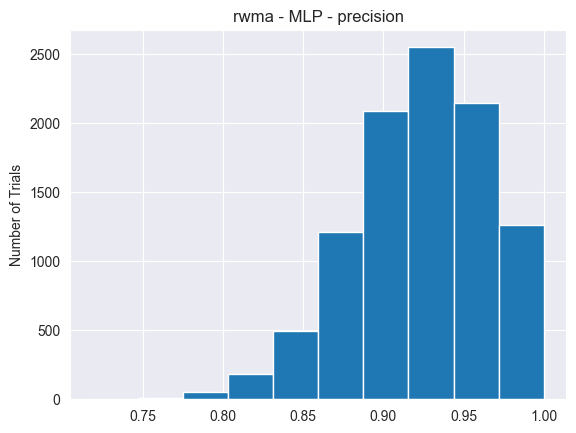

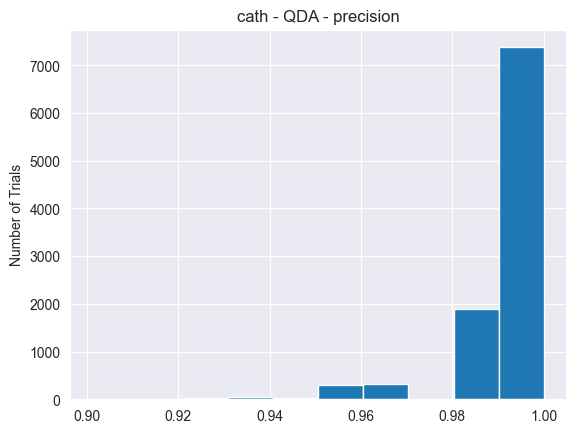

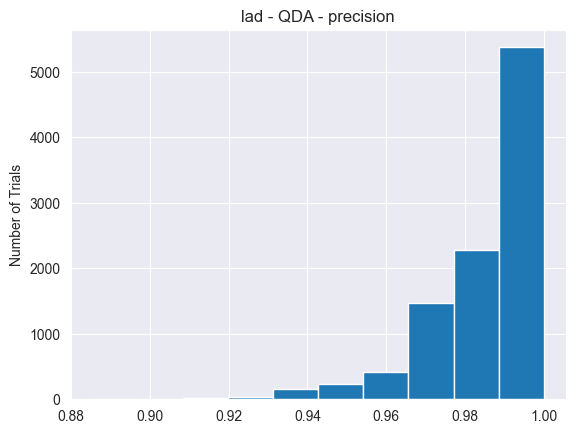

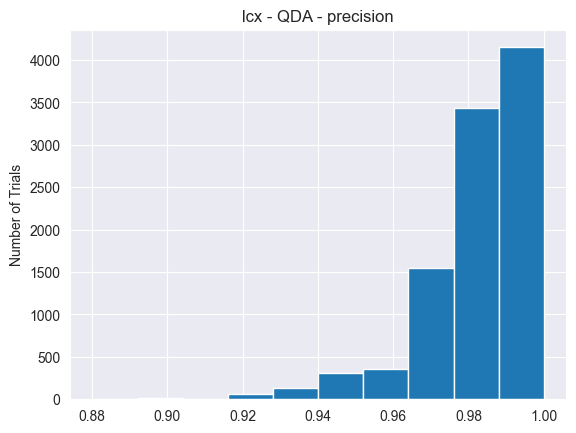

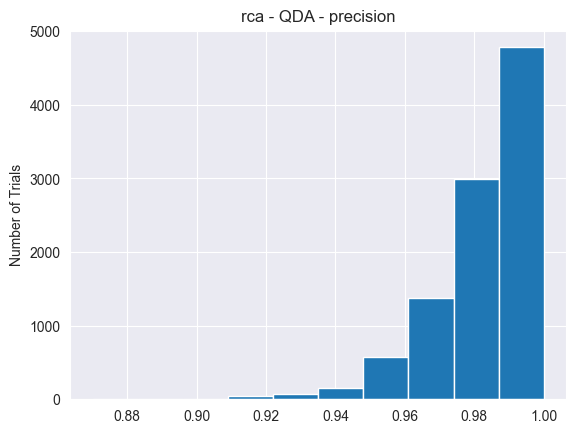

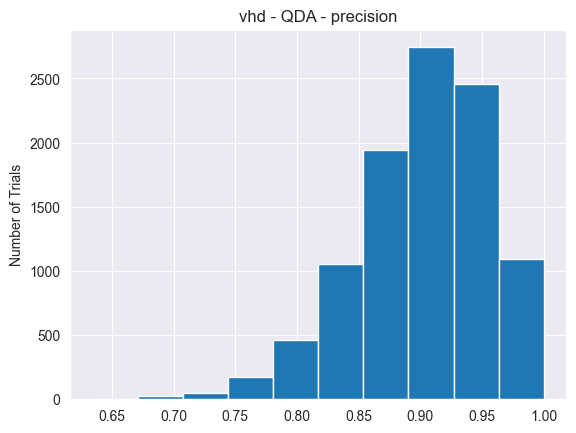

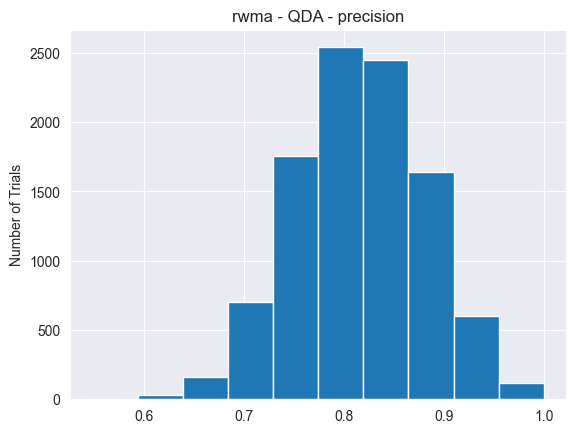

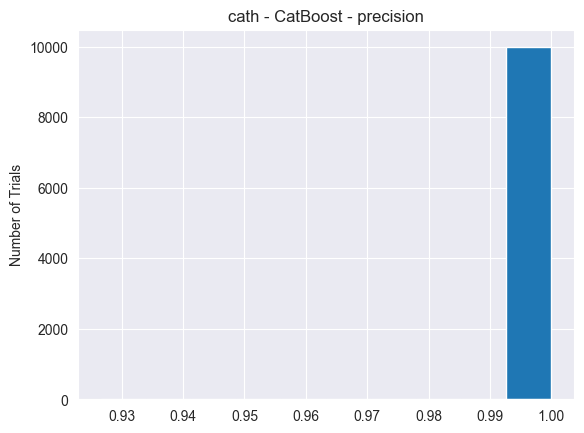

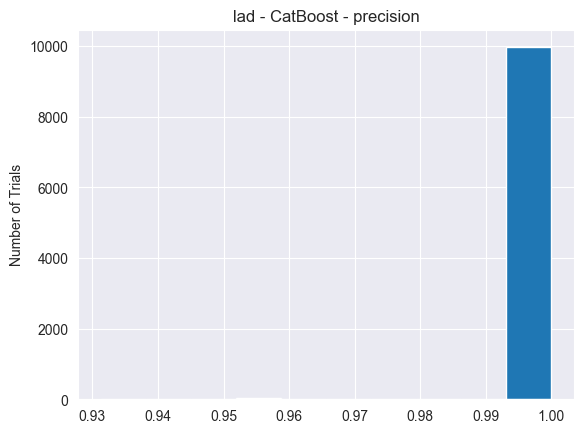

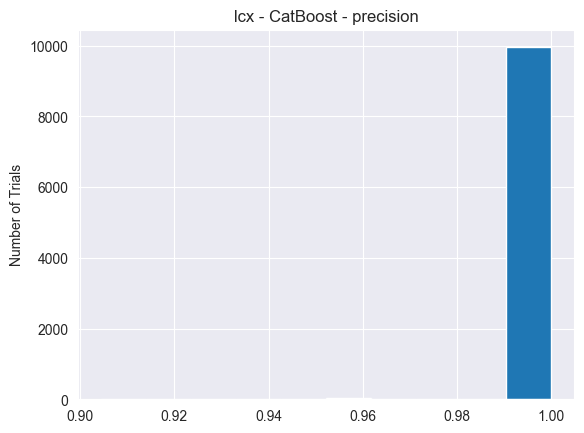

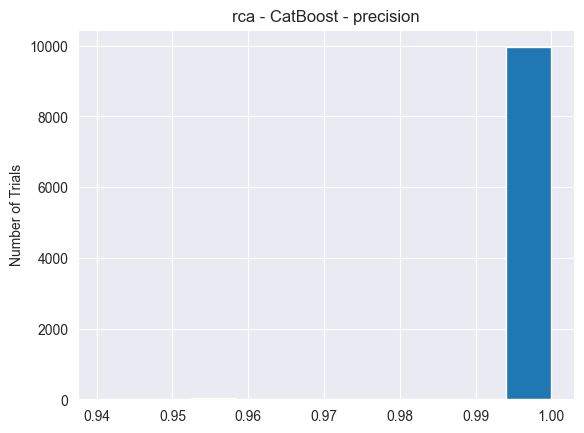

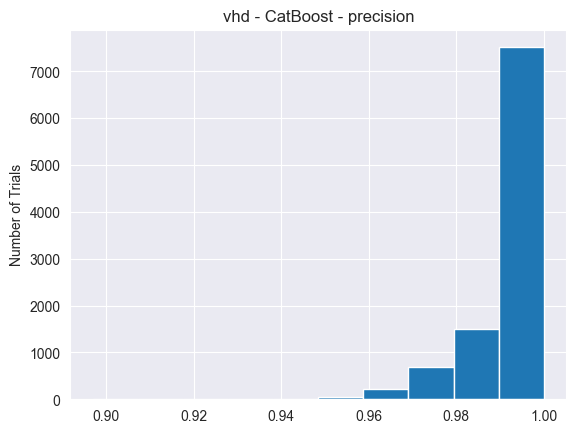

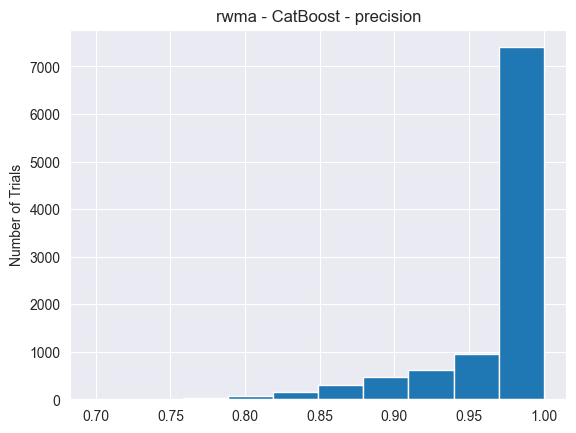

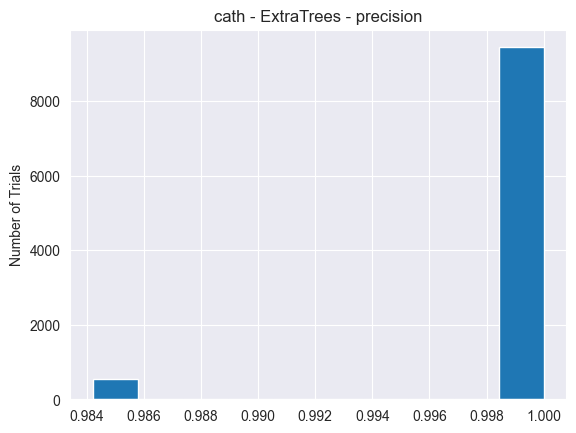

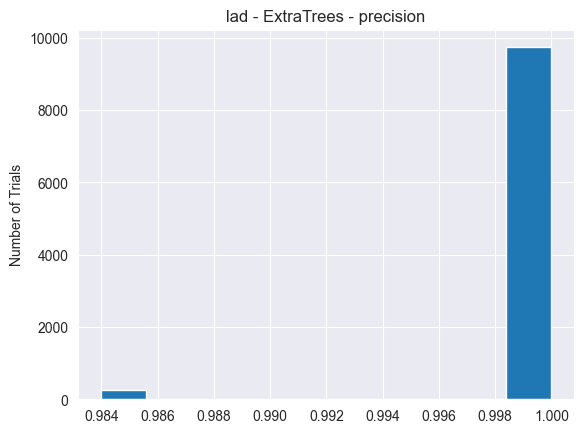

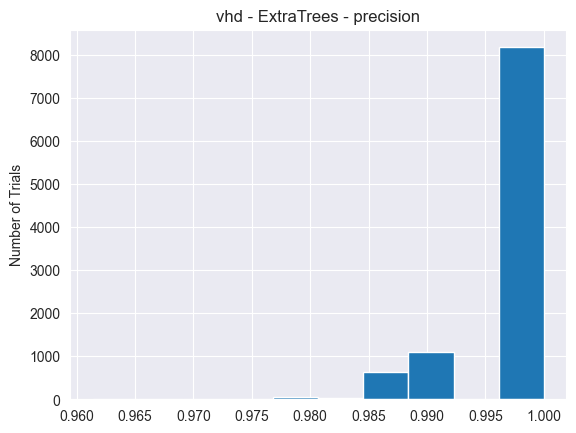

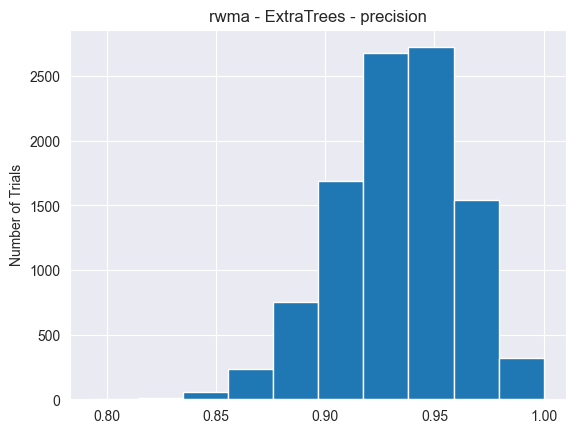

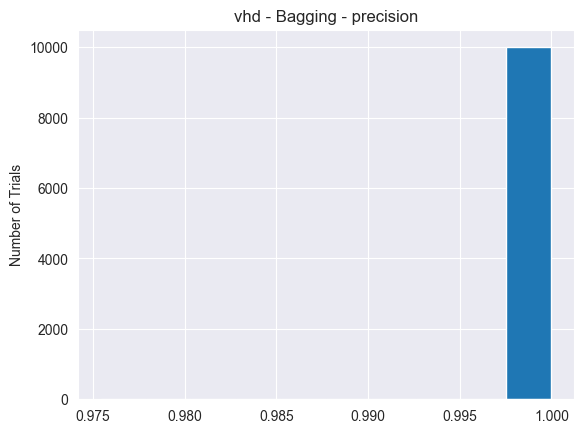

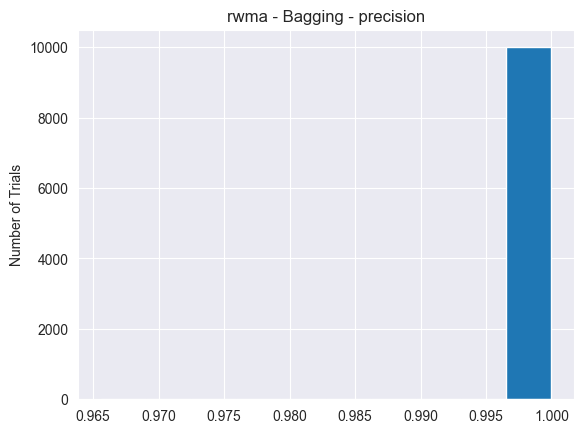

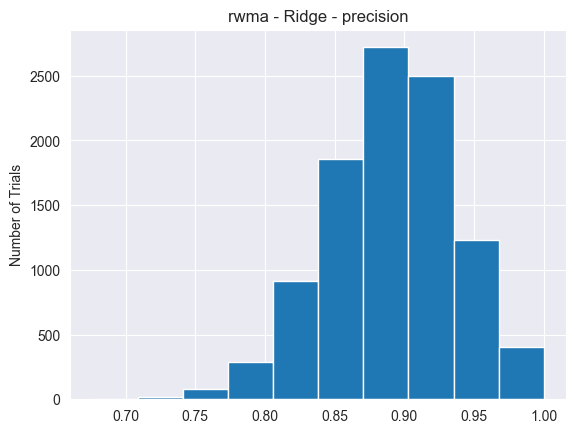

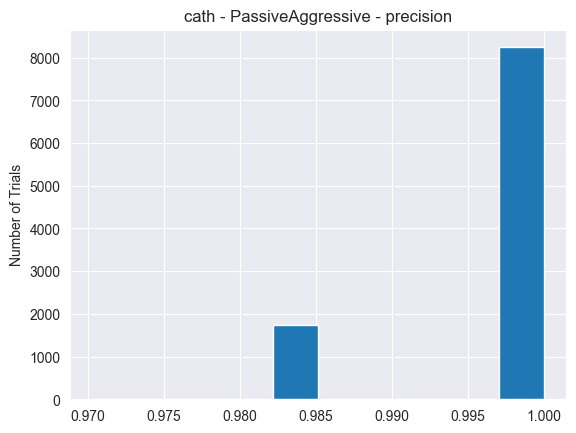

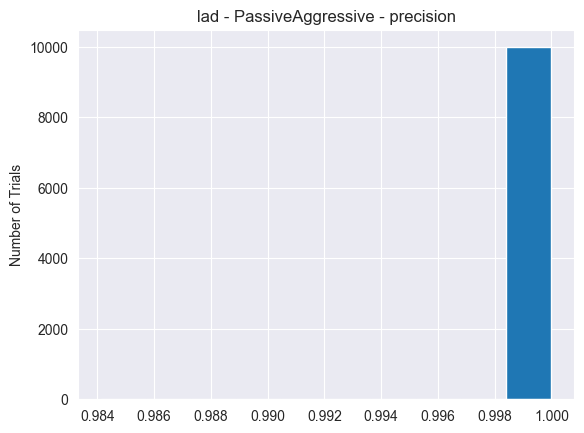

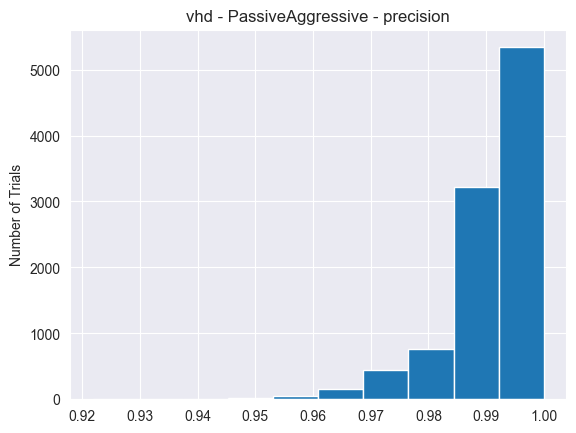

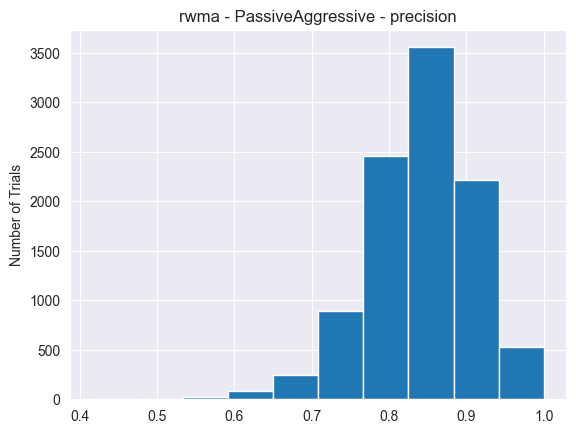

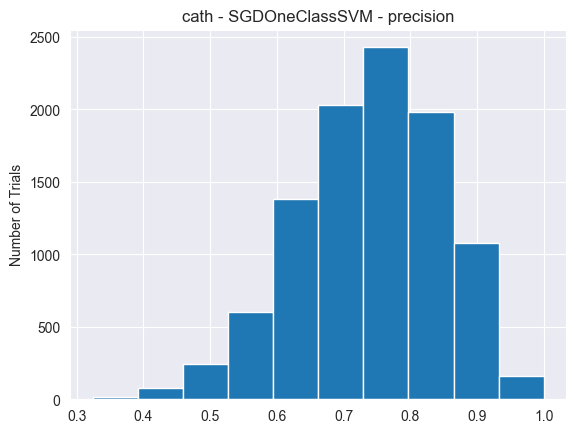

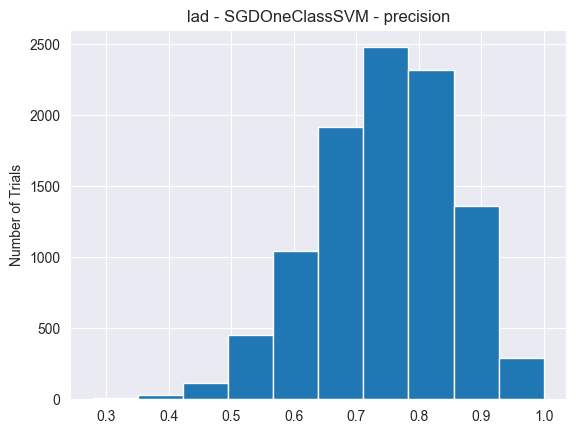

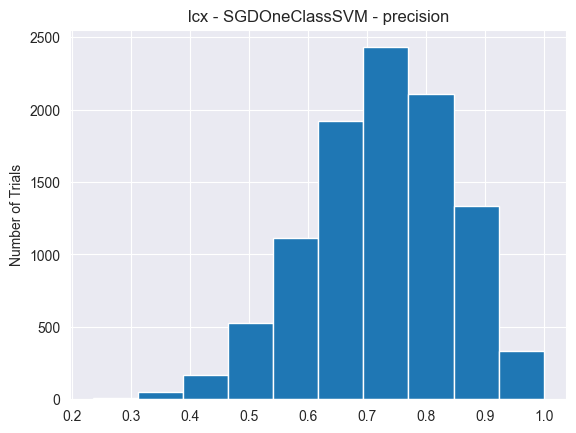

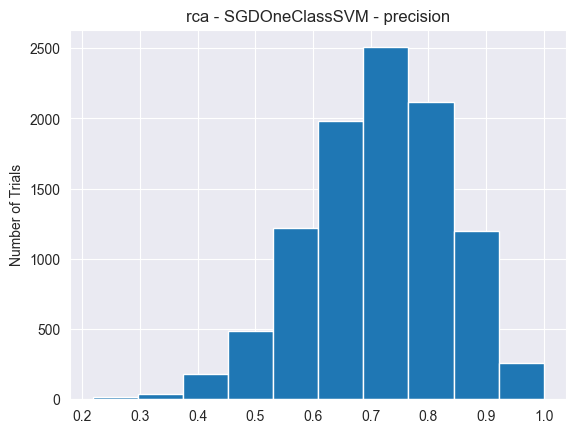

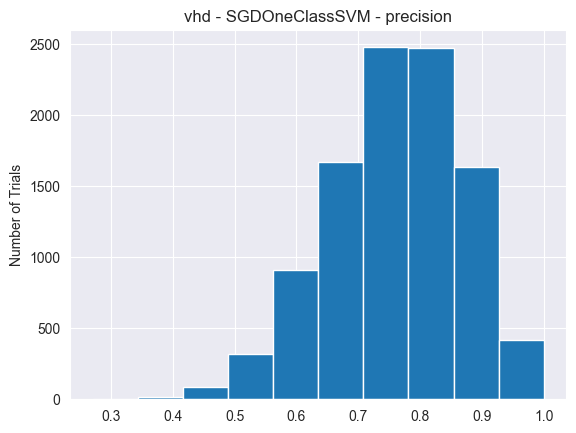

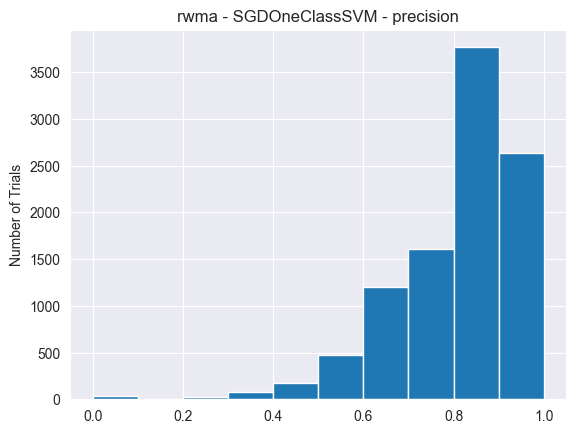

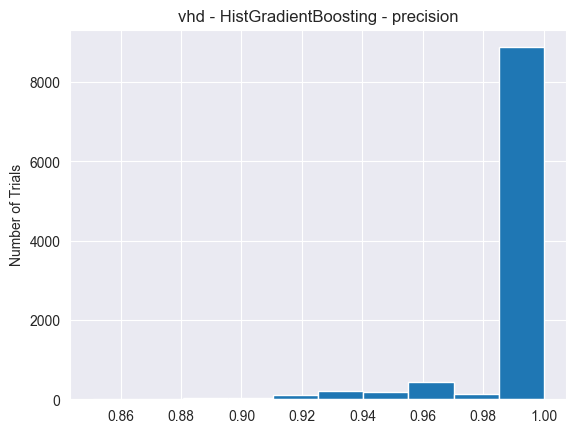

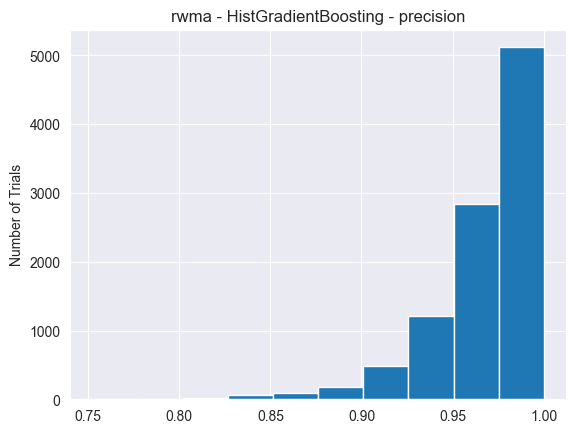

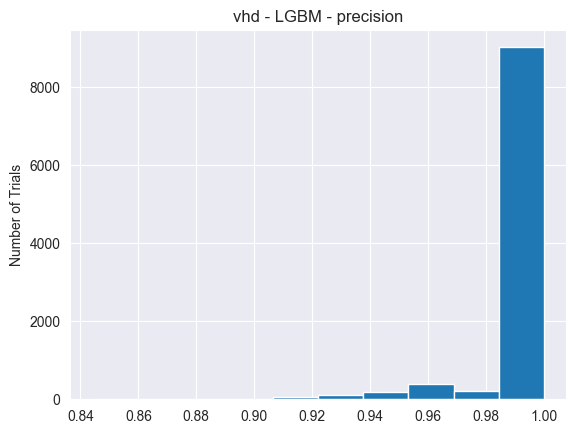

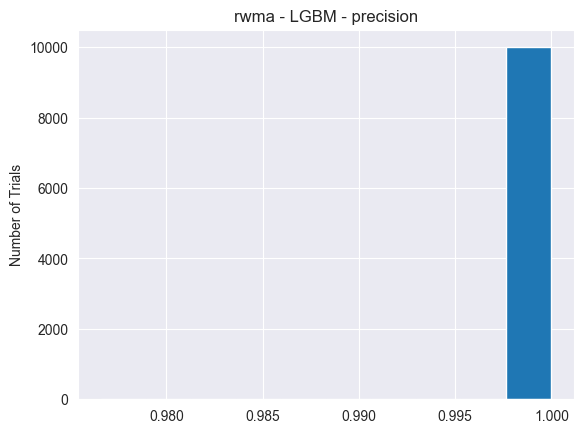

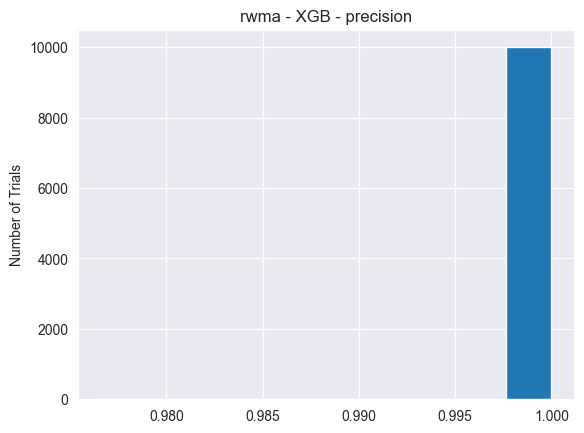

In [19]:
for i in df.columns:
    if min(df[i]) != 1.0 and 'precision' in i:
        plt.hist(df[i])
        plt.title(i)
        plt.ylabel('Number of Trials')
        plt.show()

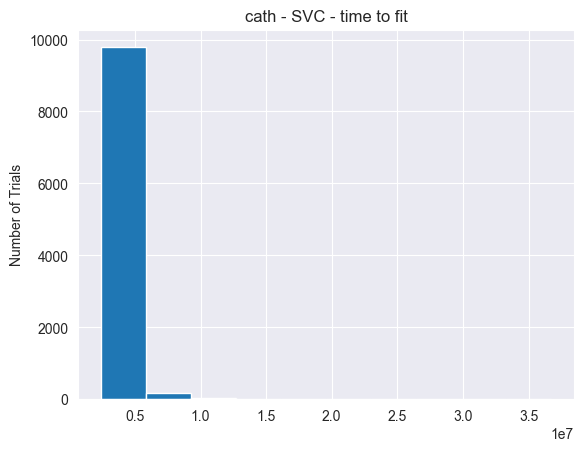

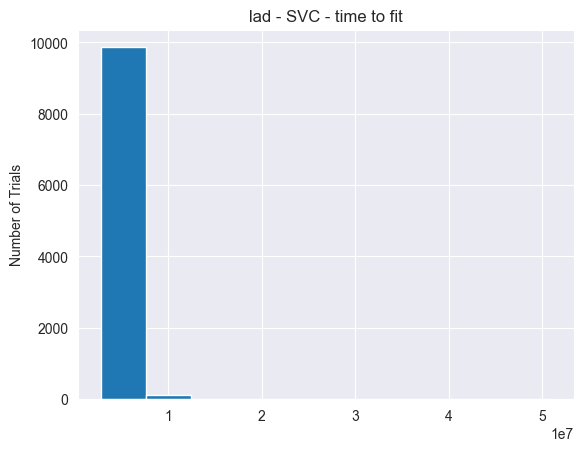

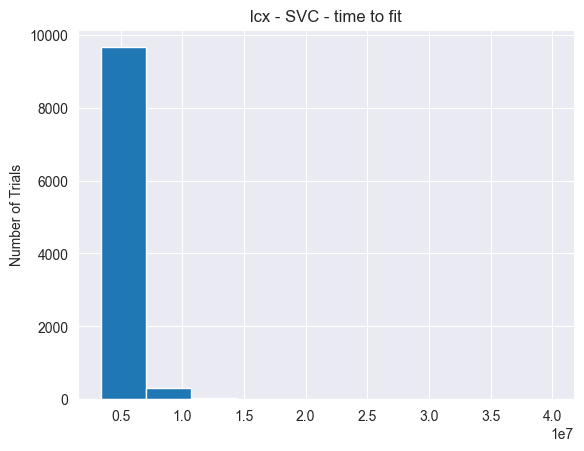

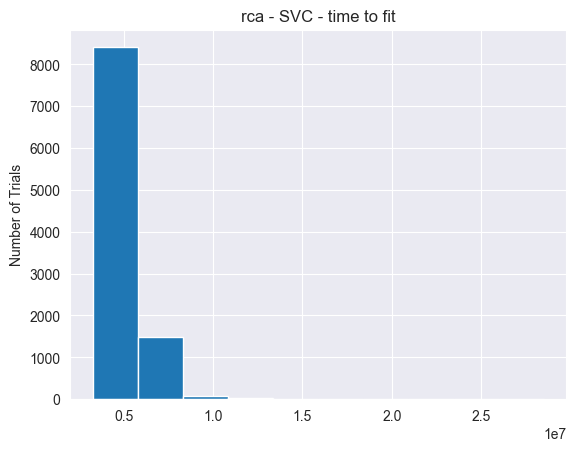

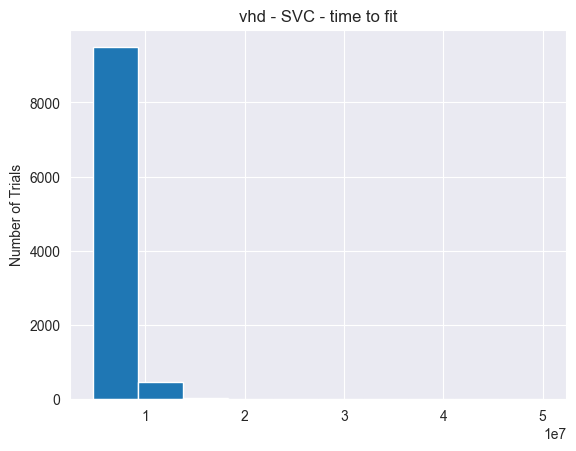

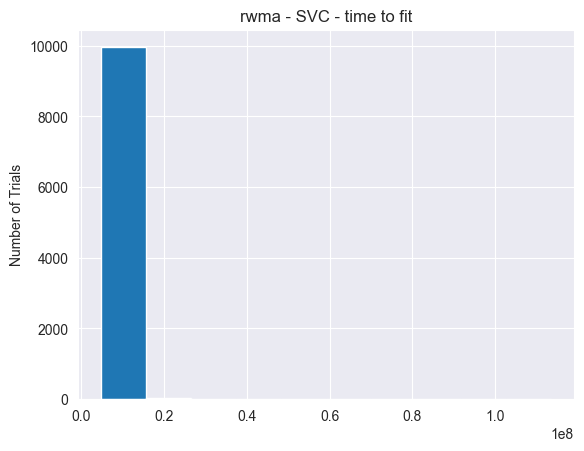

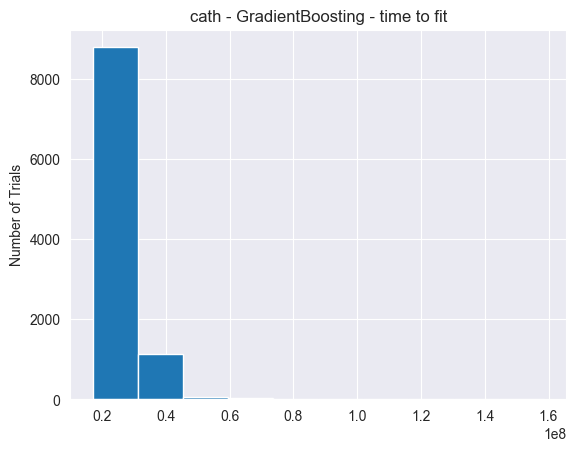

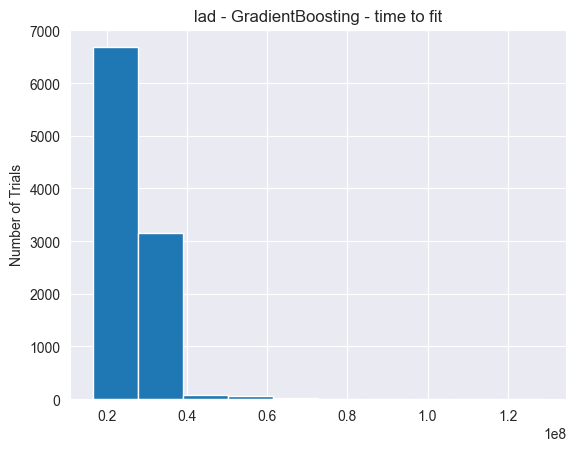

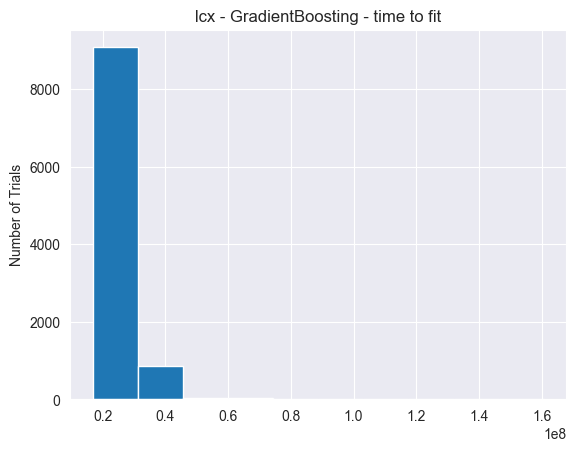

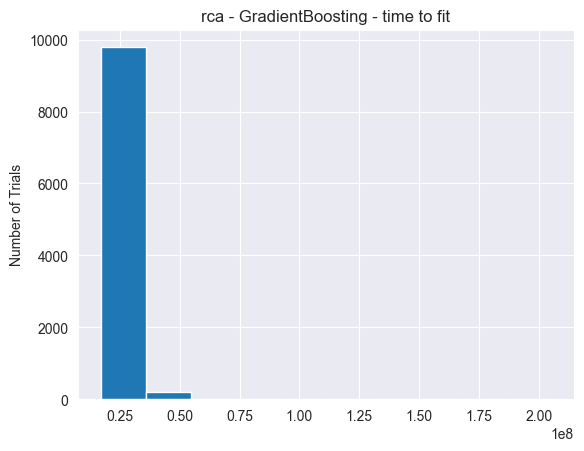

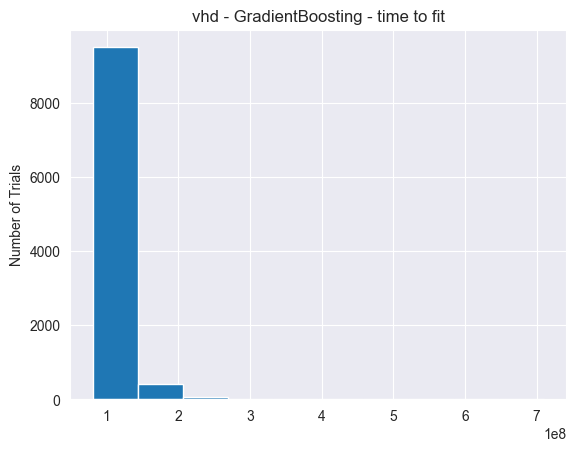

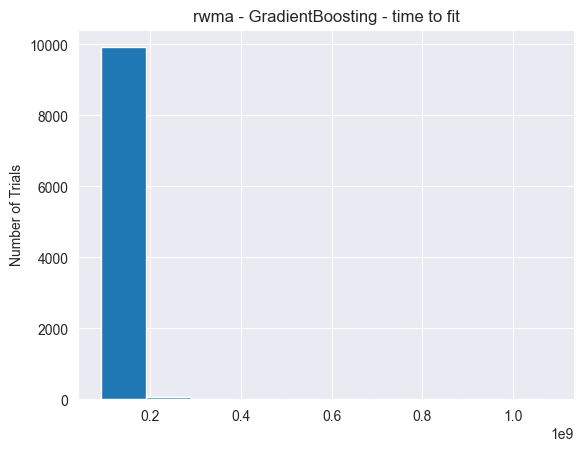

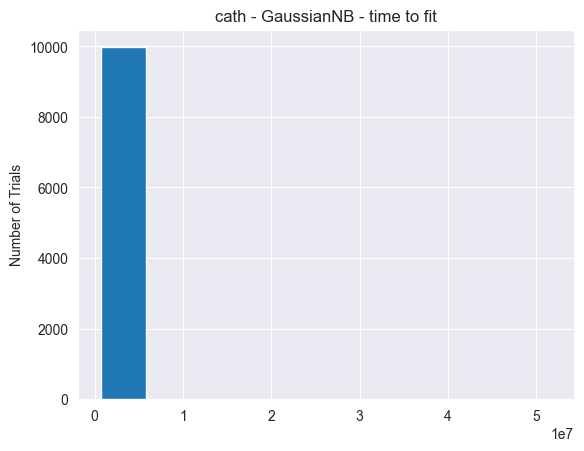

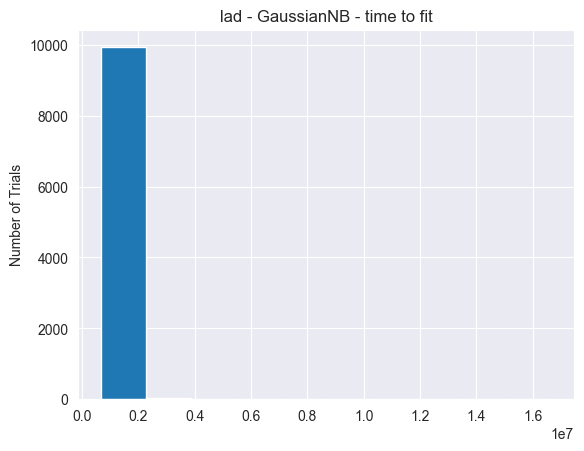

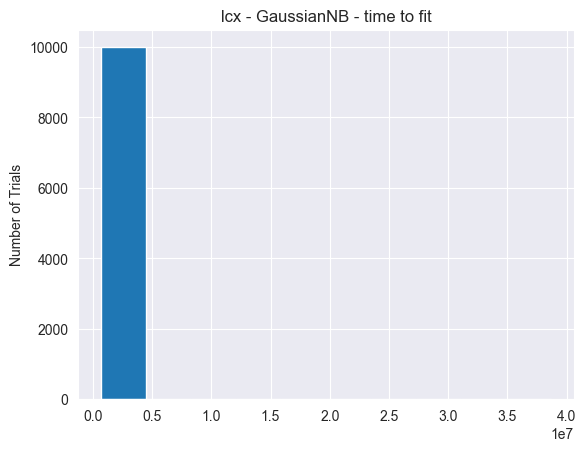

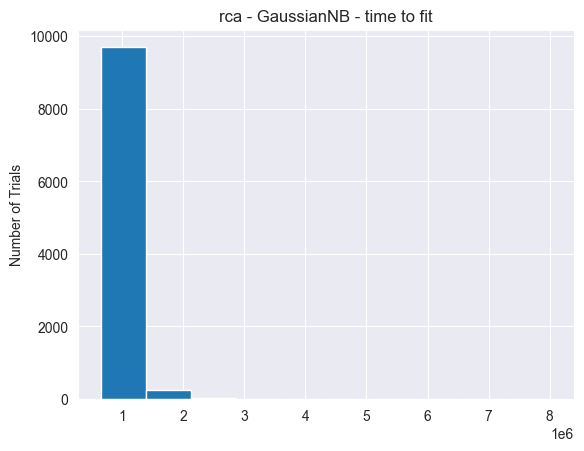

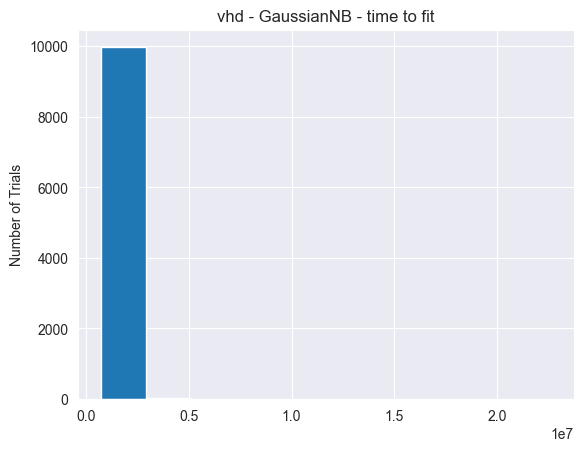

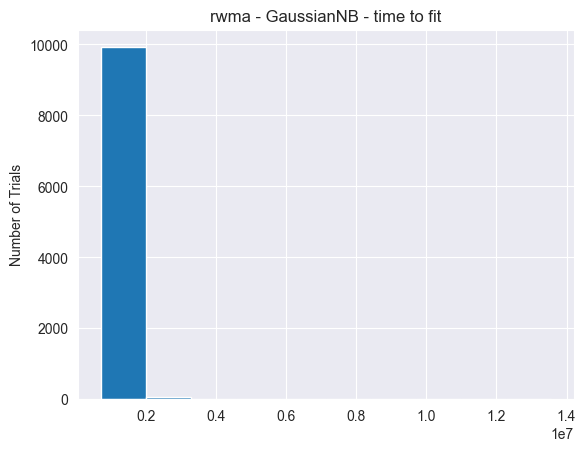

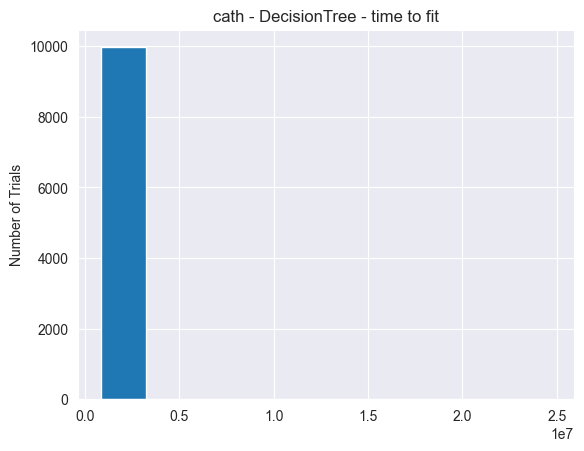

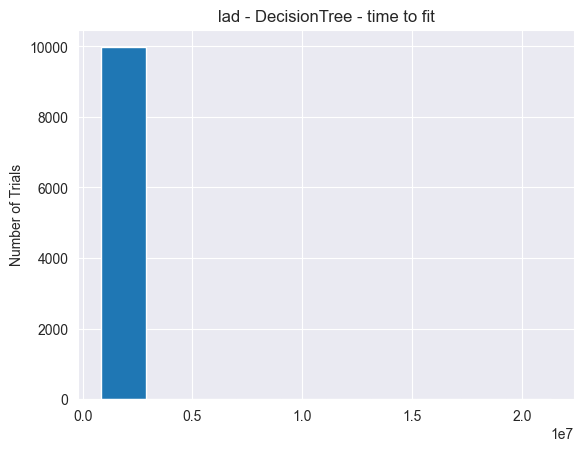

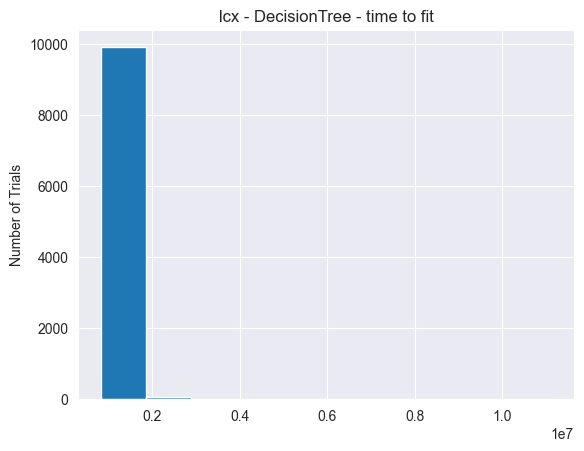

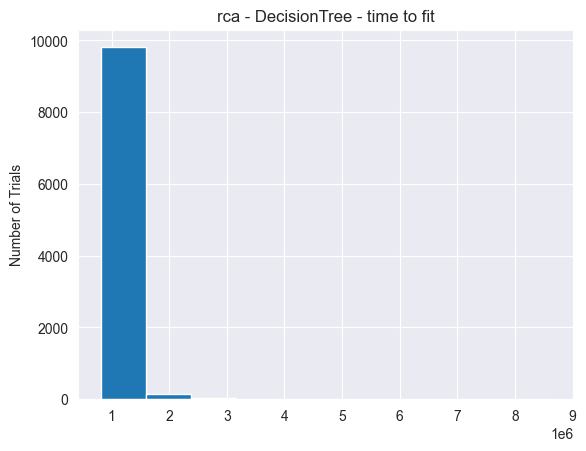

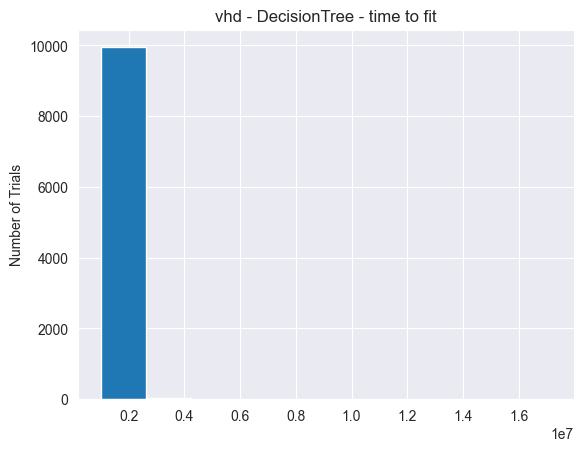

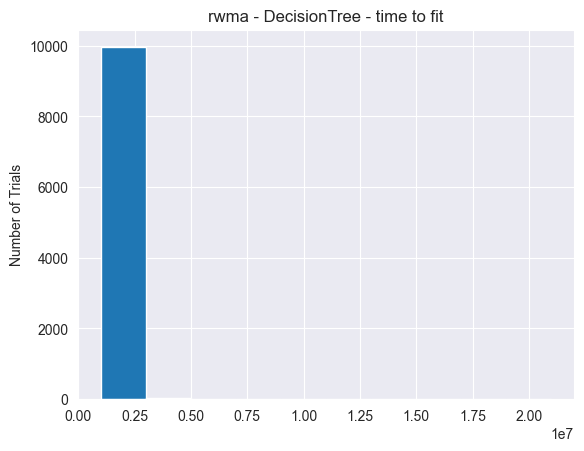

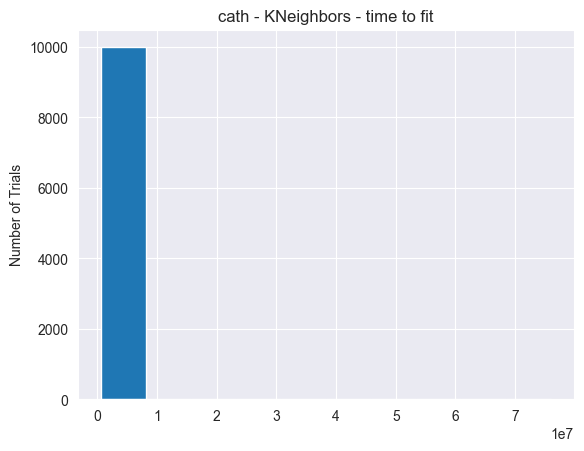

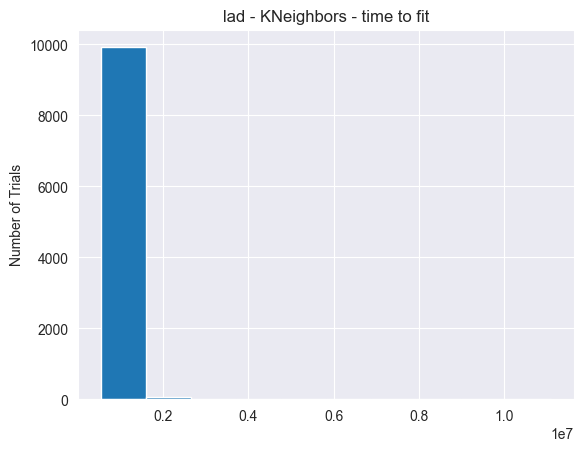

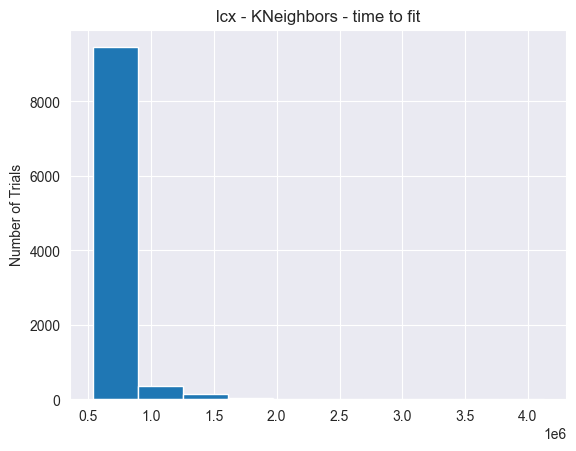

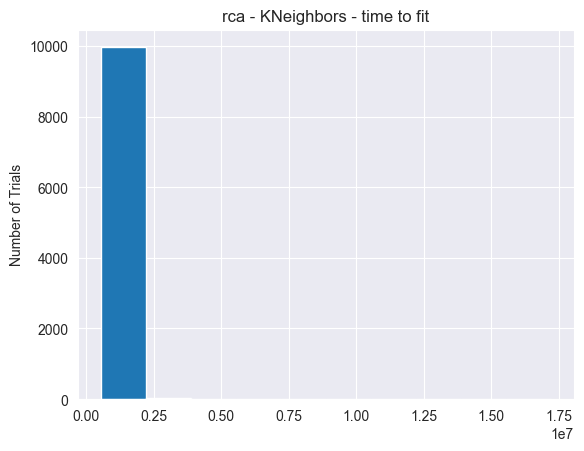

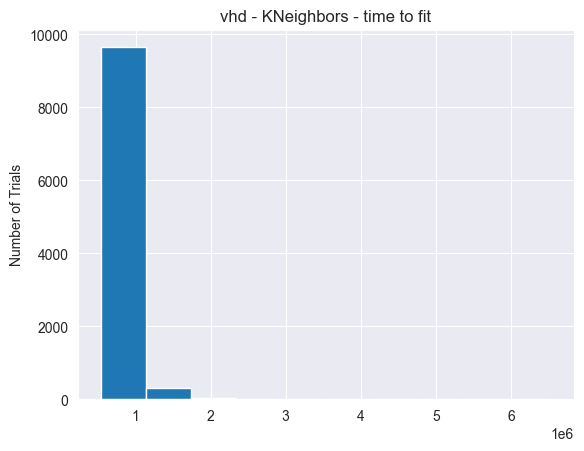

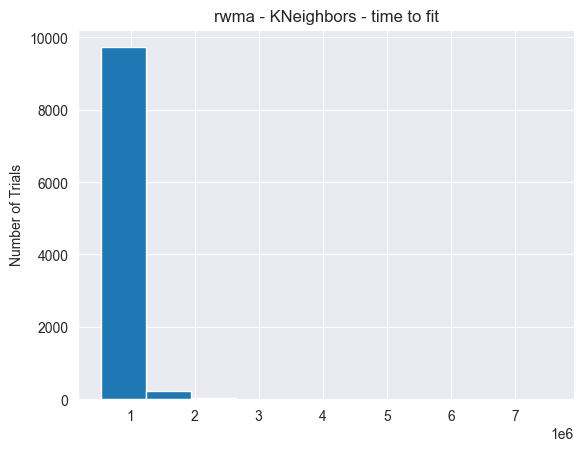

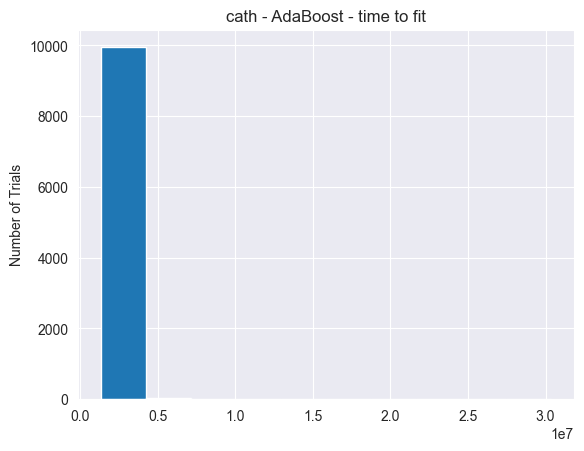

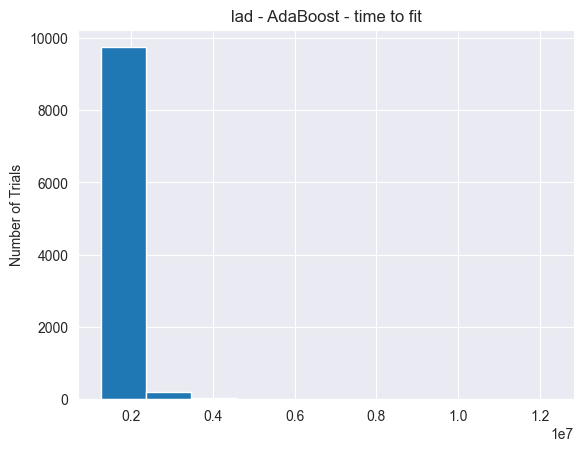

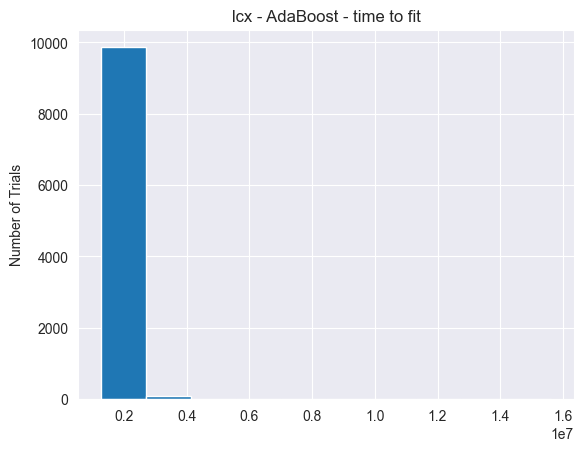

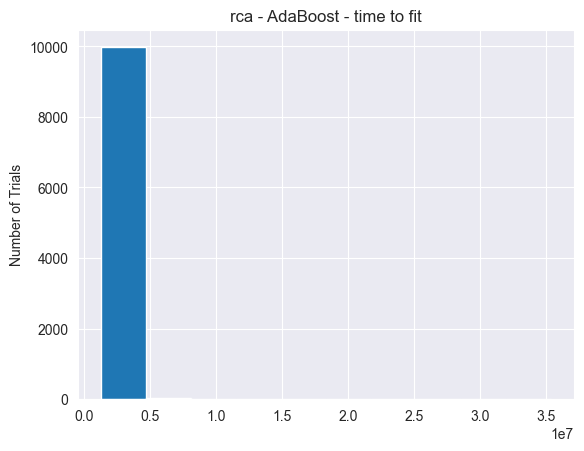

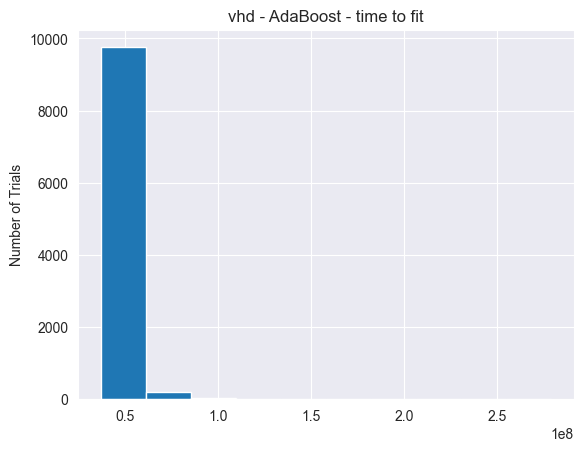

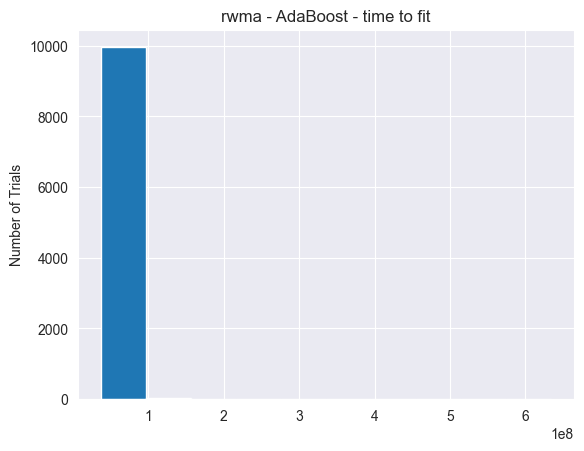

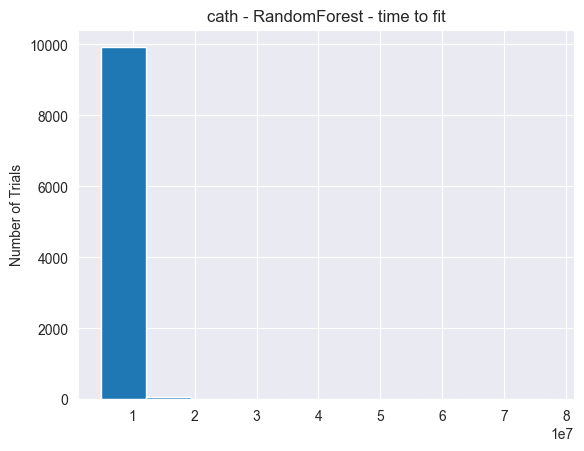

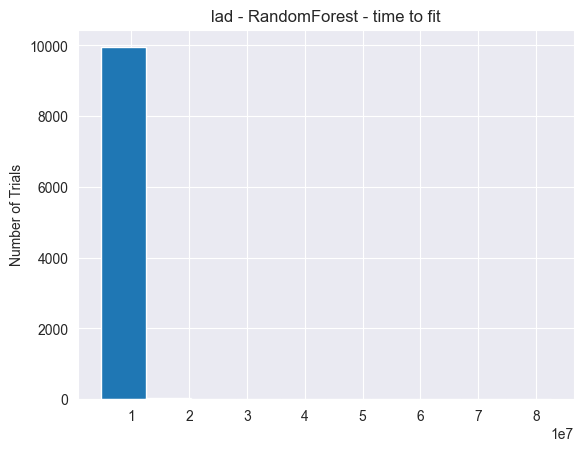

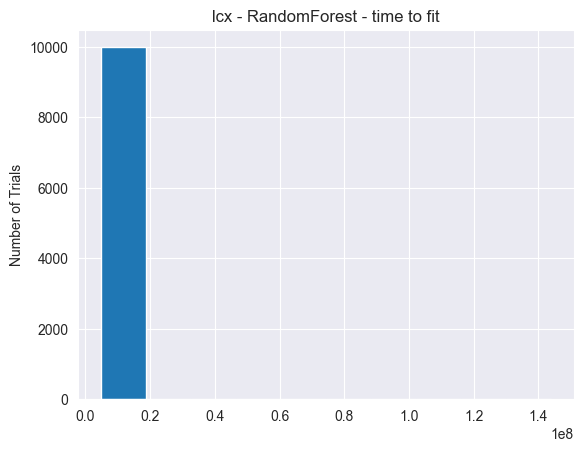

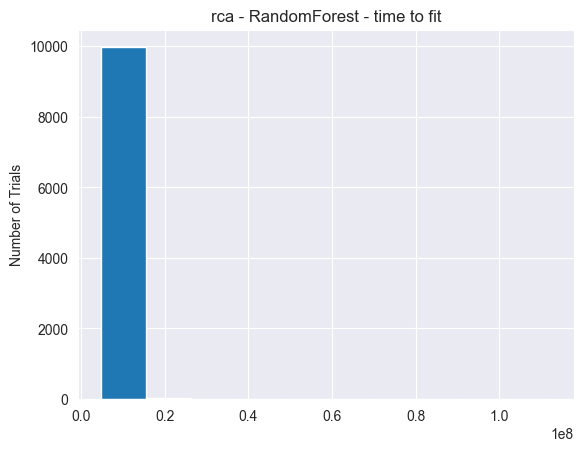

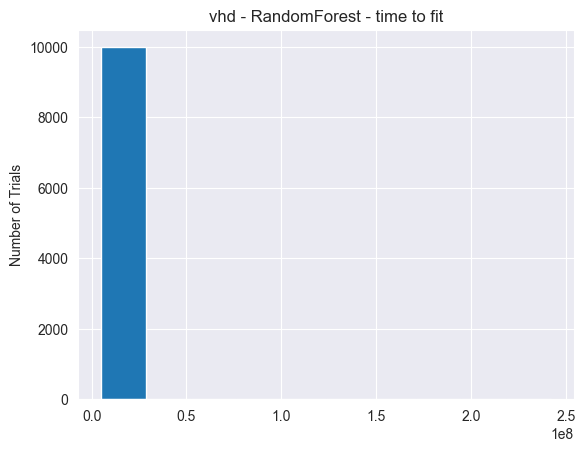

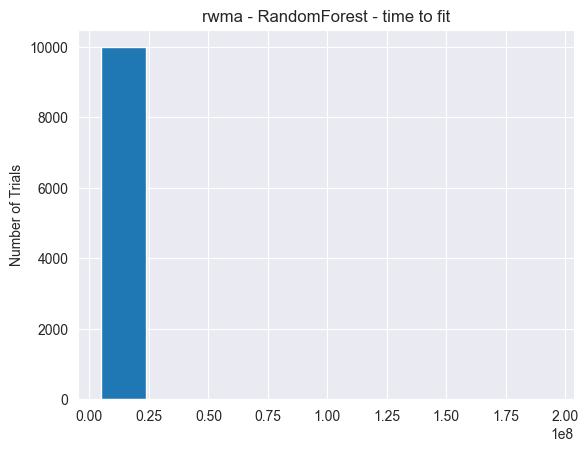

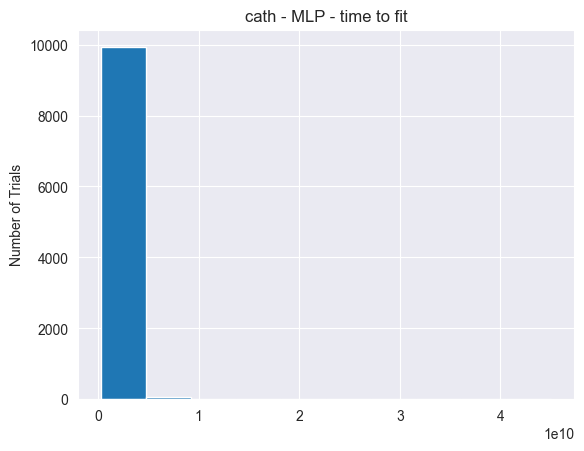

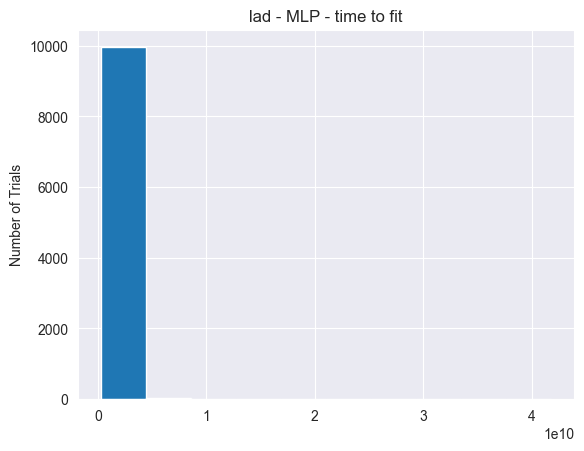

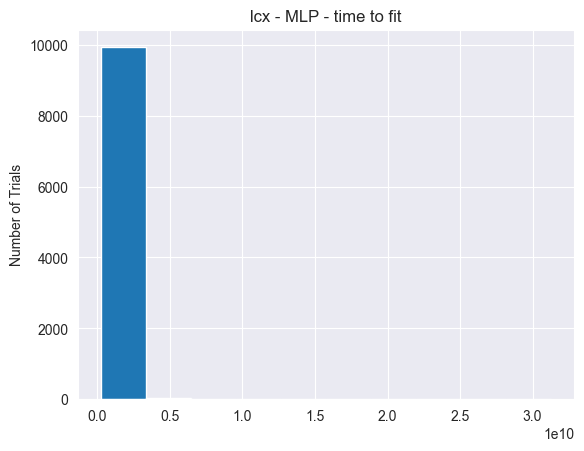

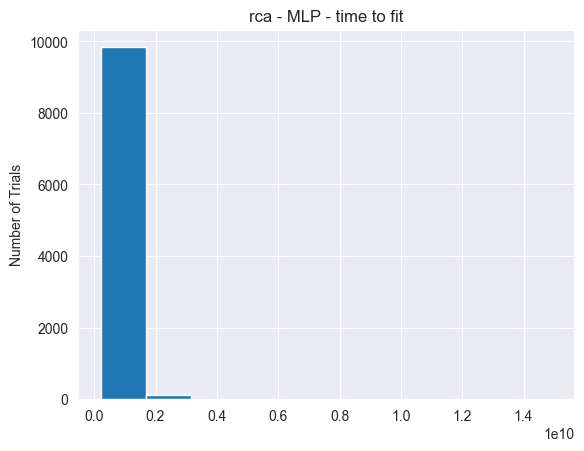

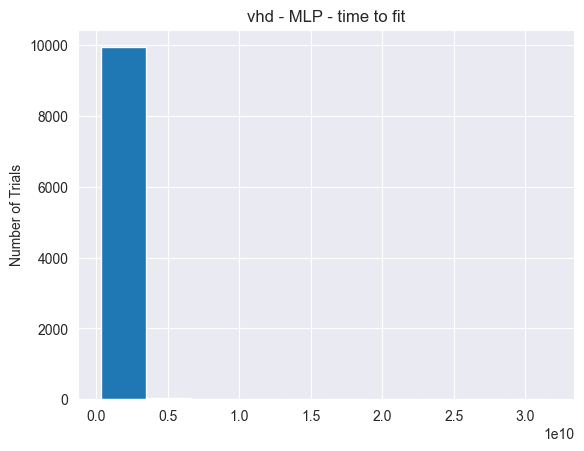

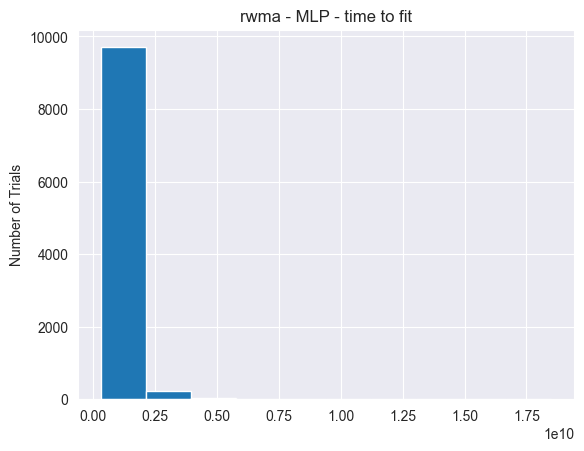

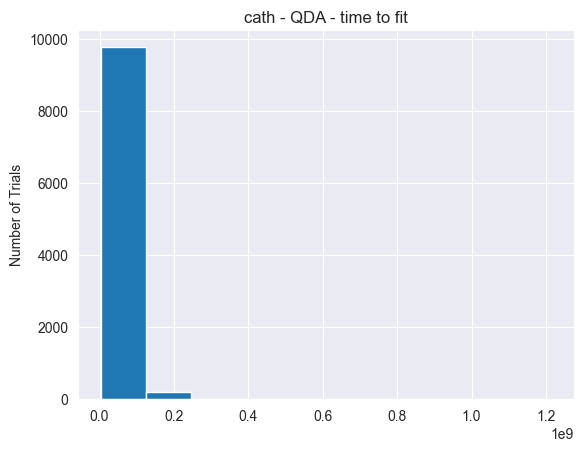

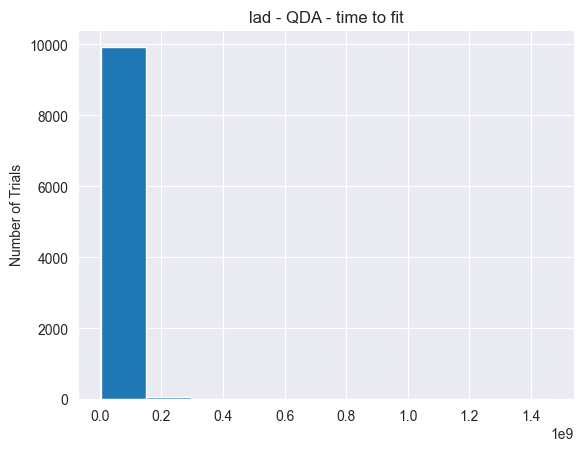

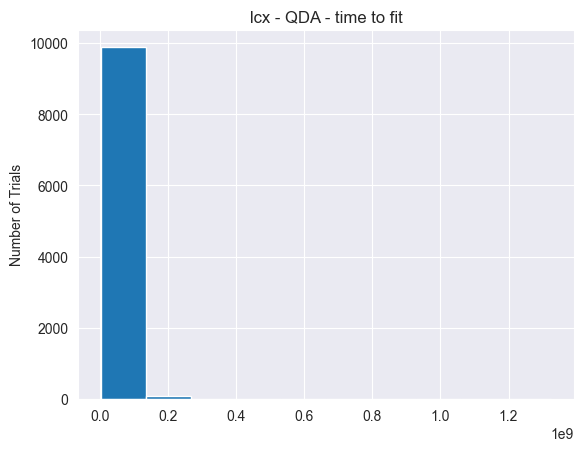

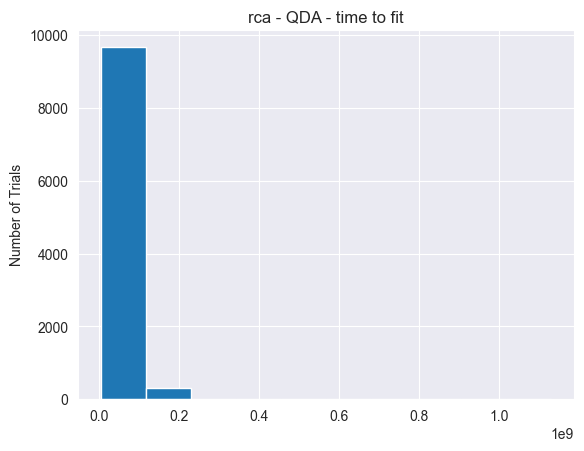

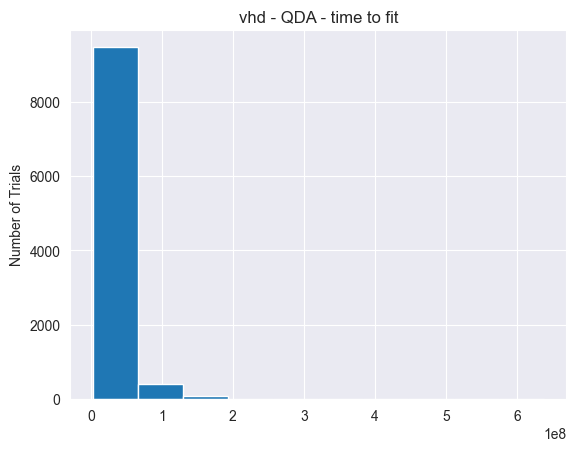

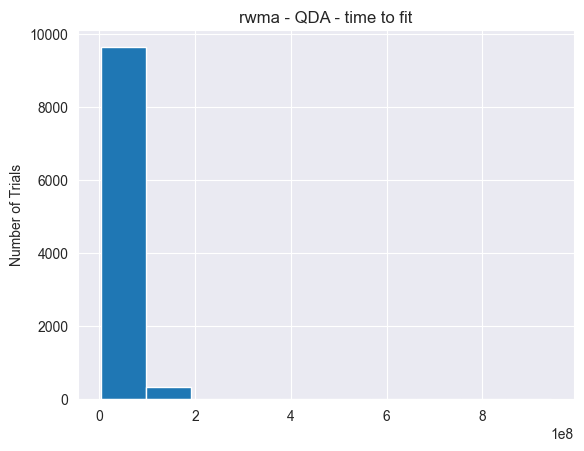

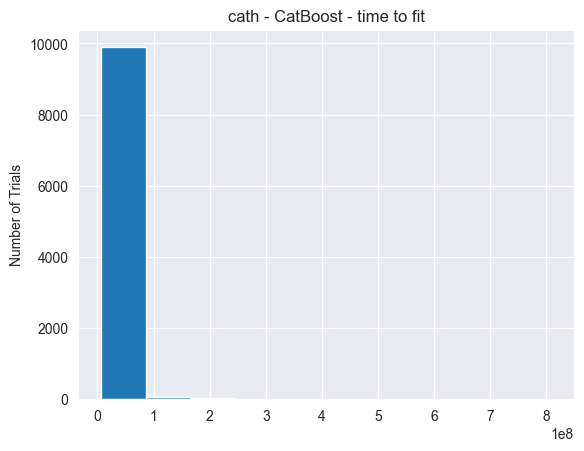

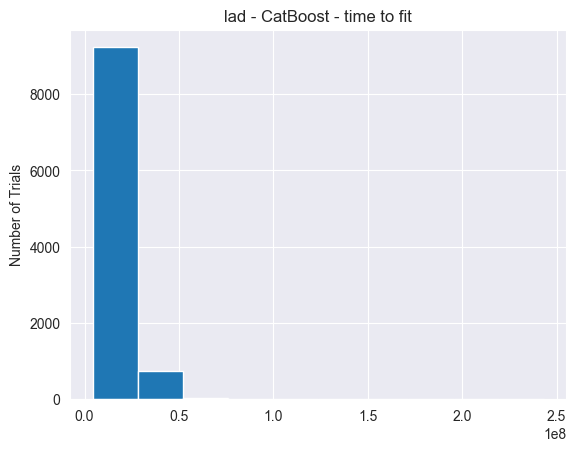

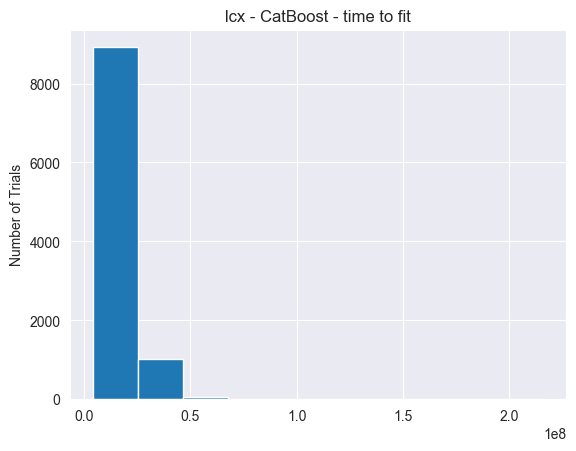

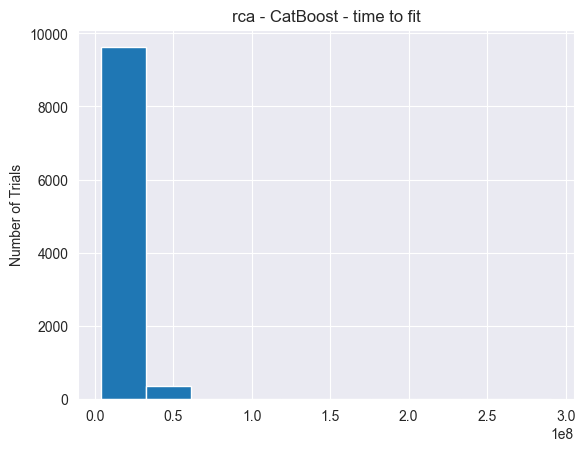

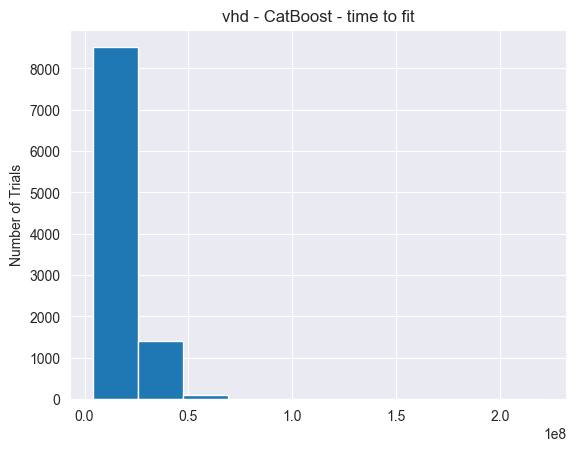

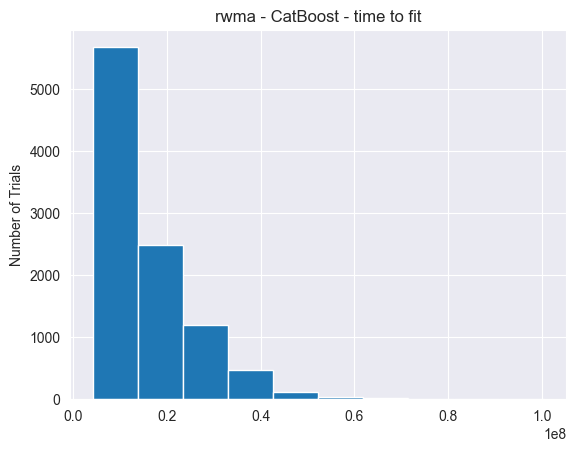

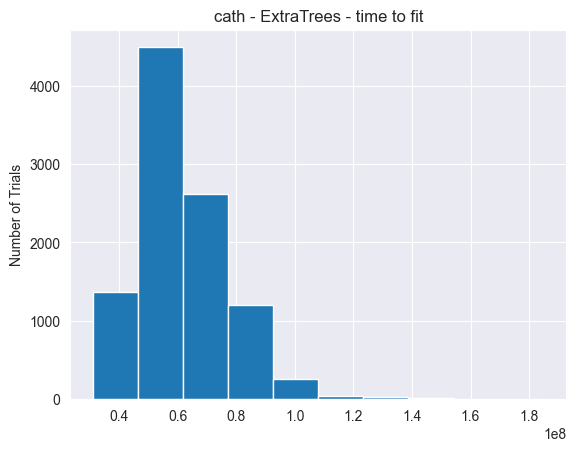

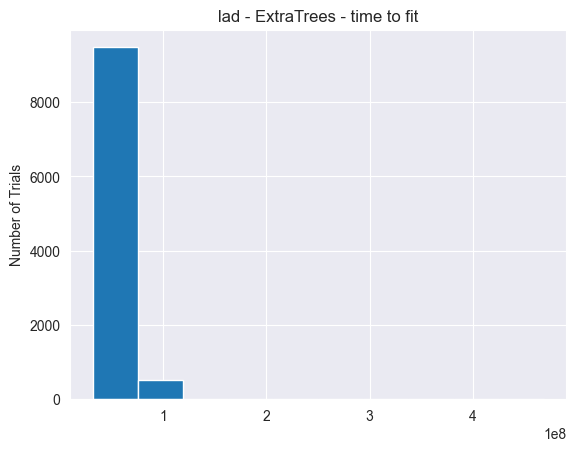

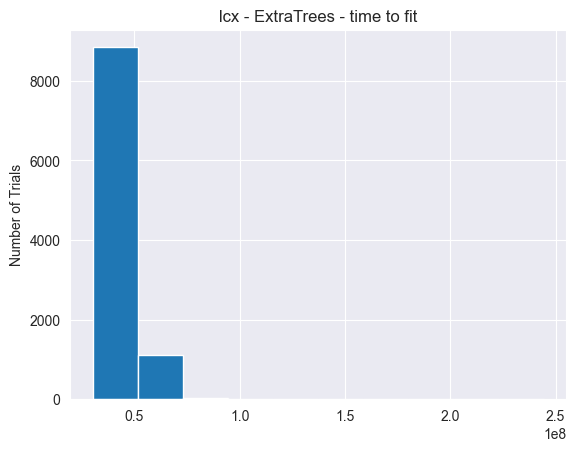

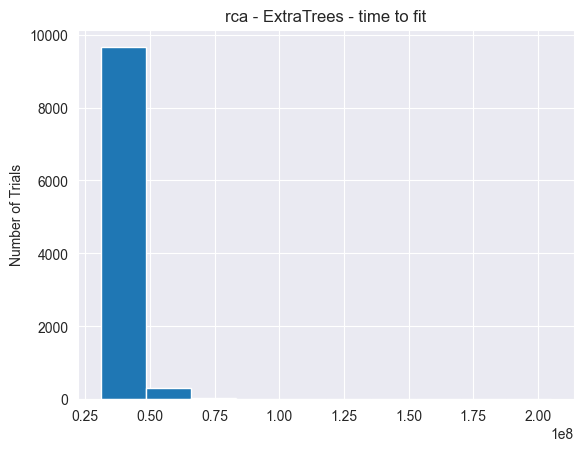

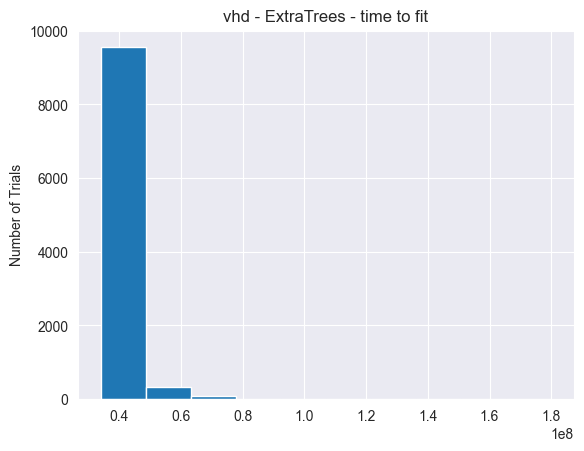

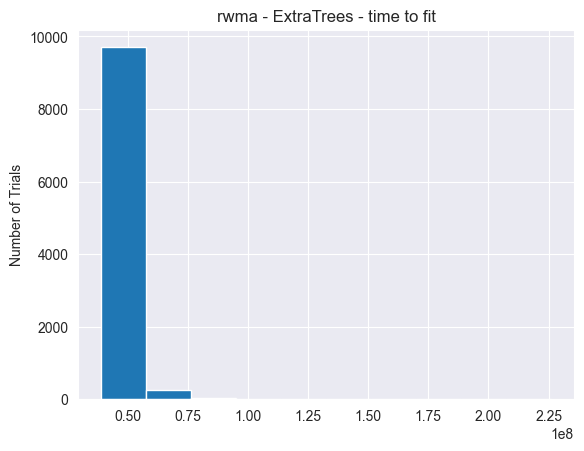

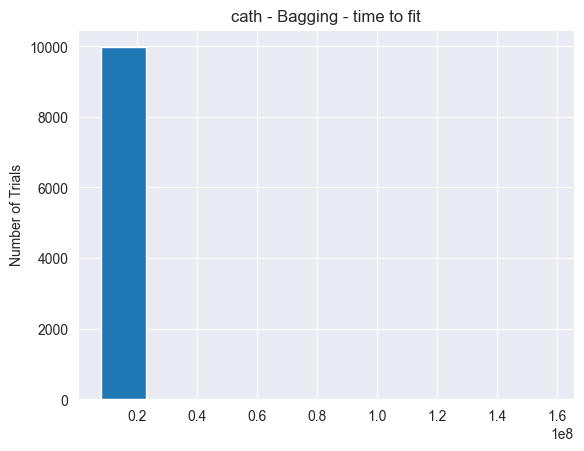

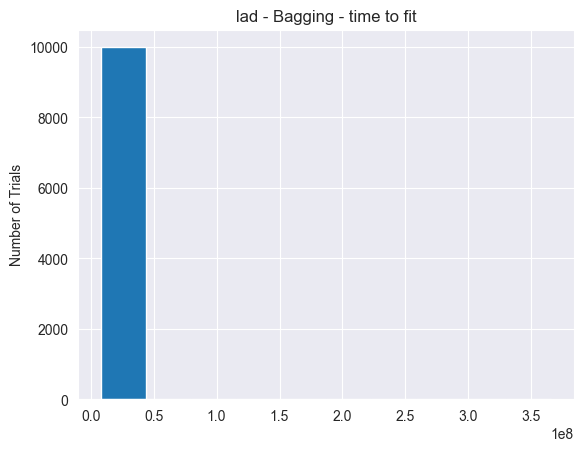

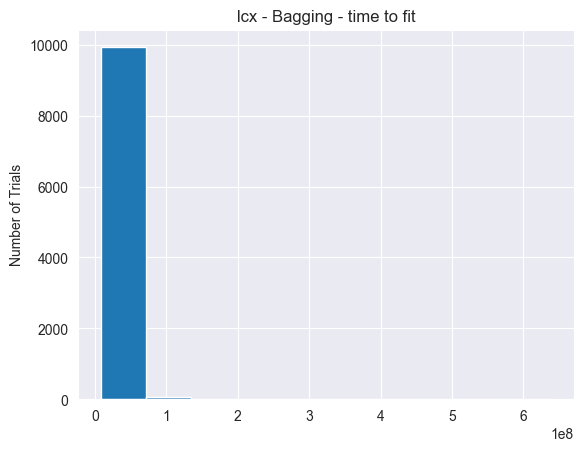

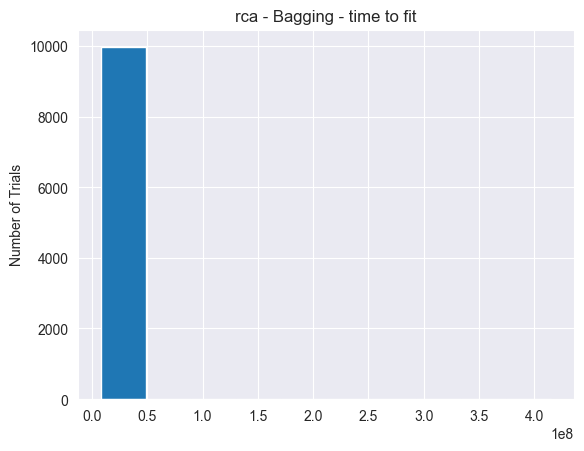

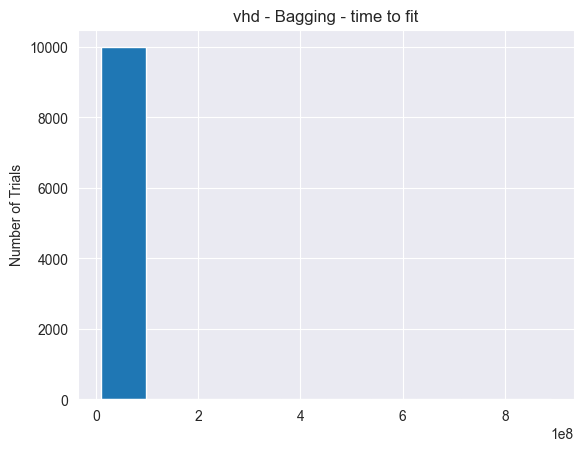

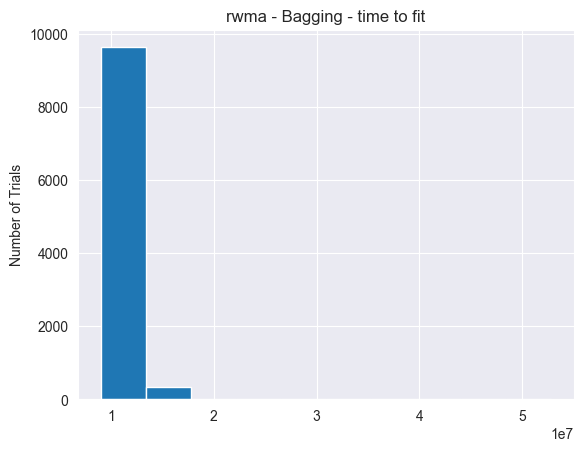

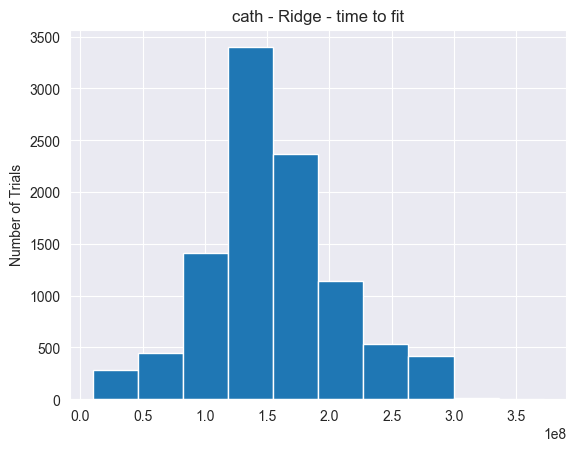

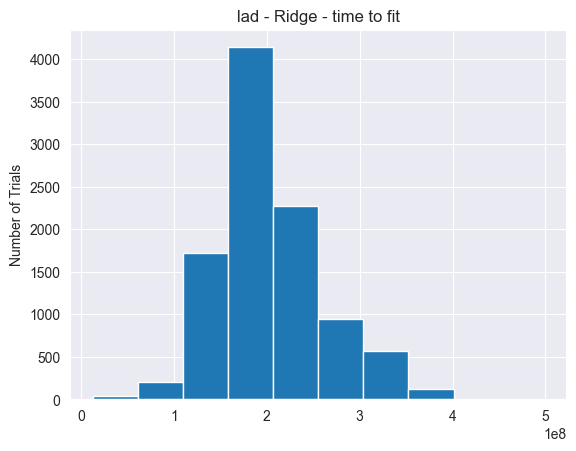

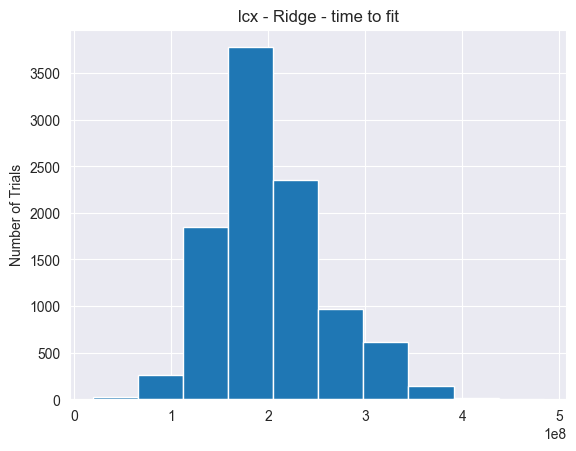

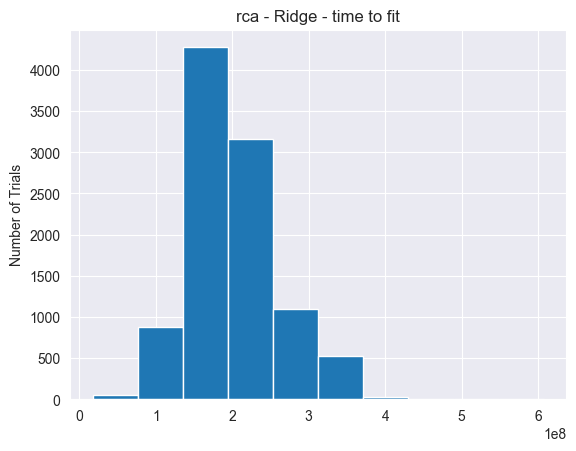

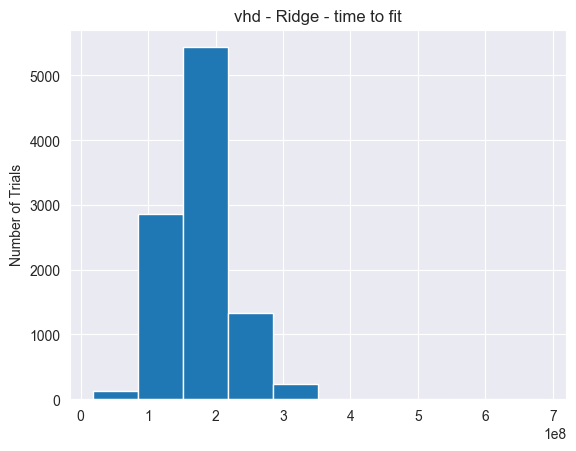

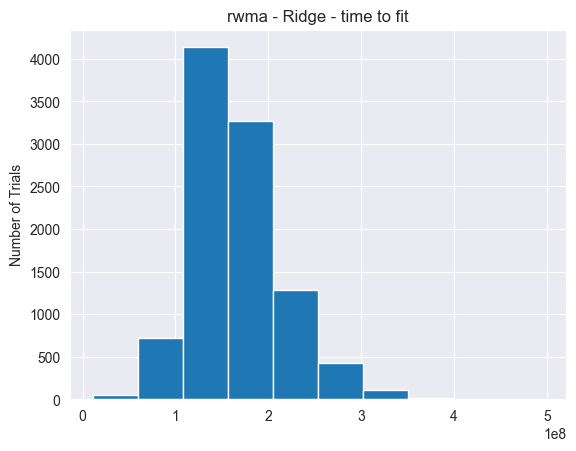

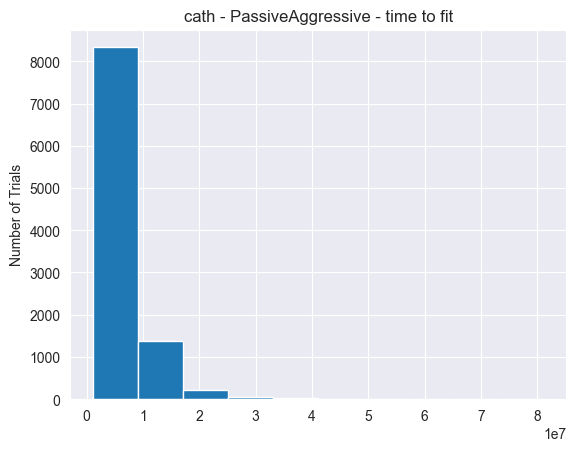

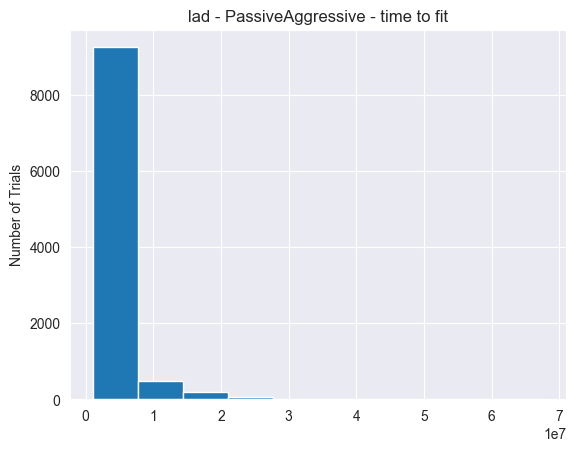

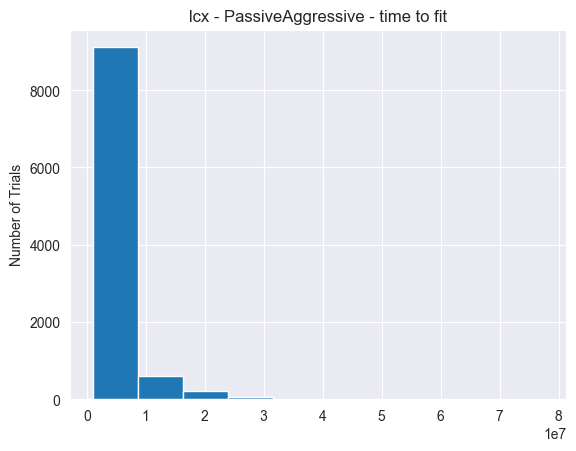

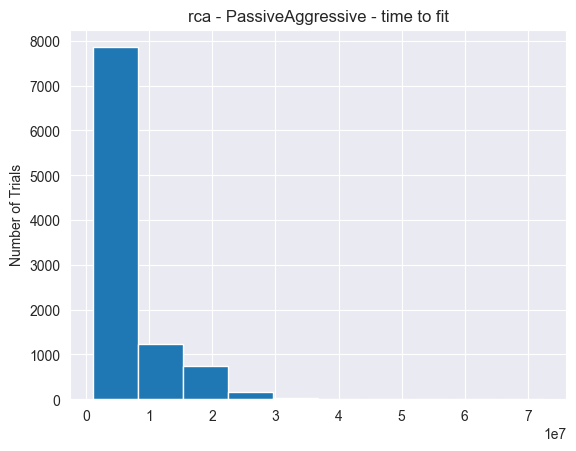

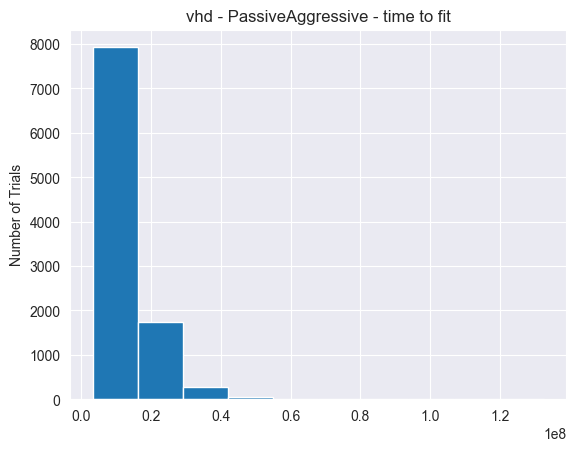

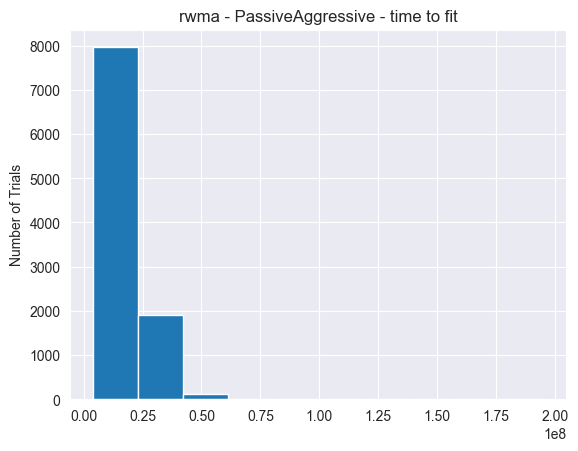

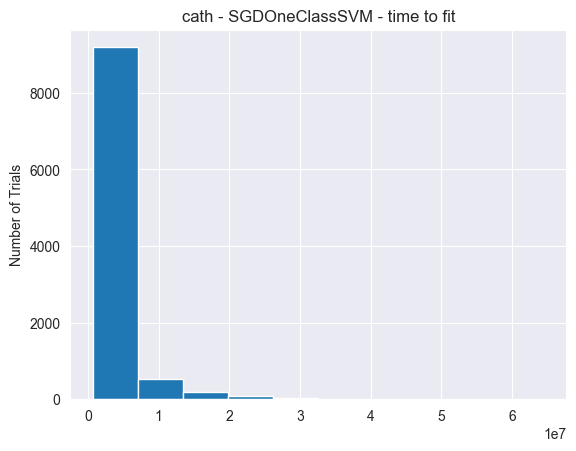

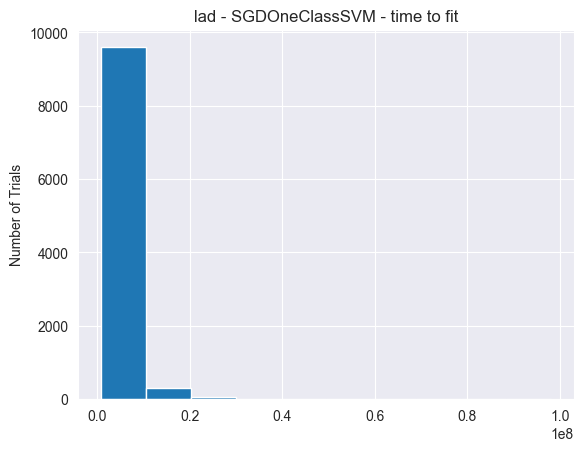

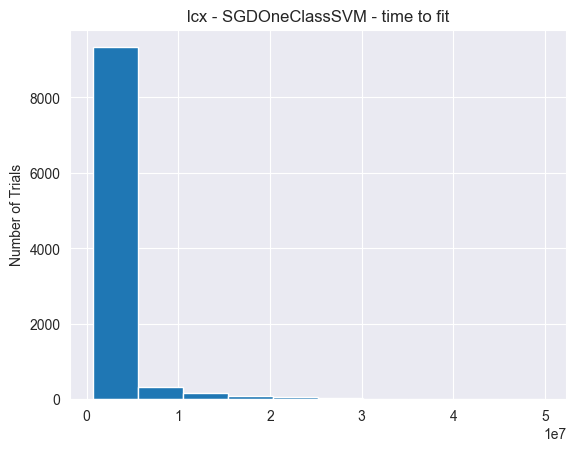

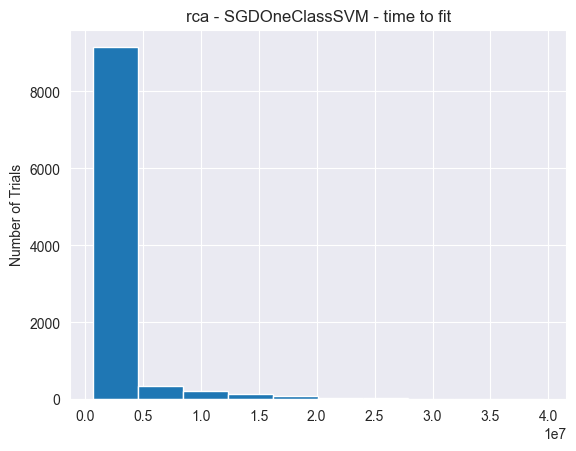

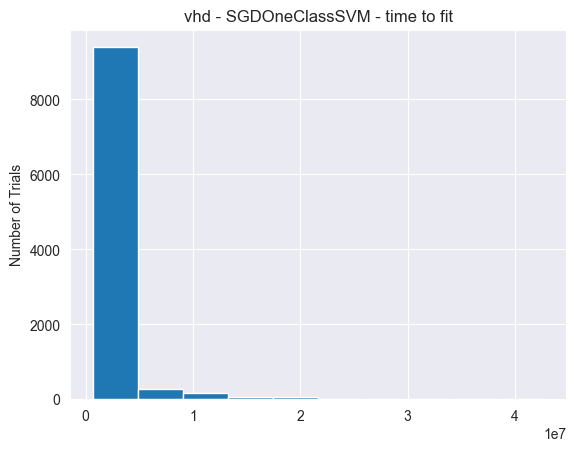

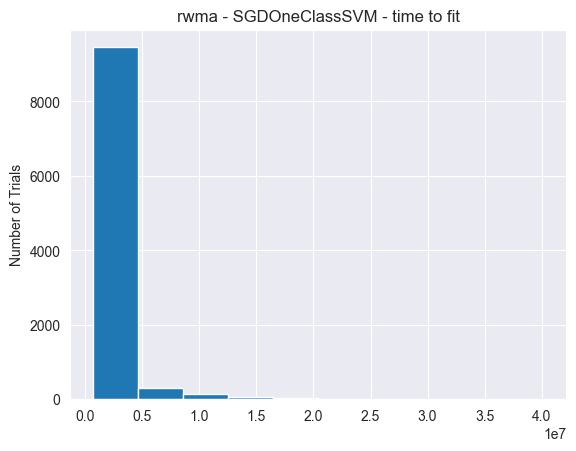

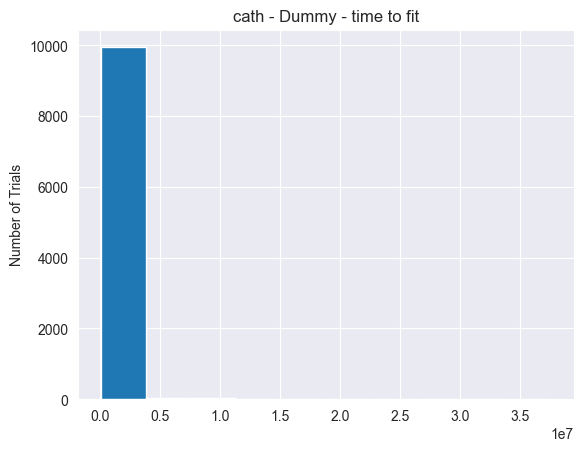

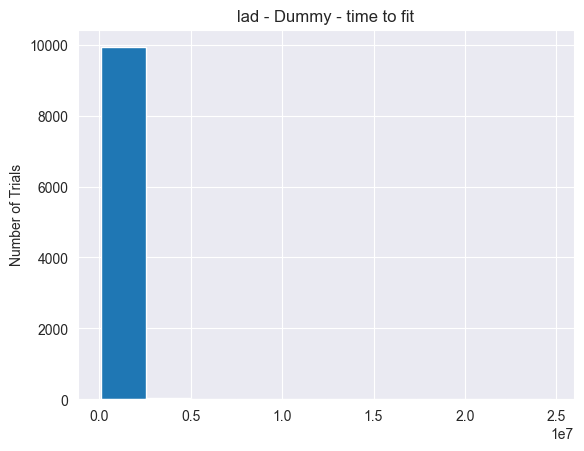

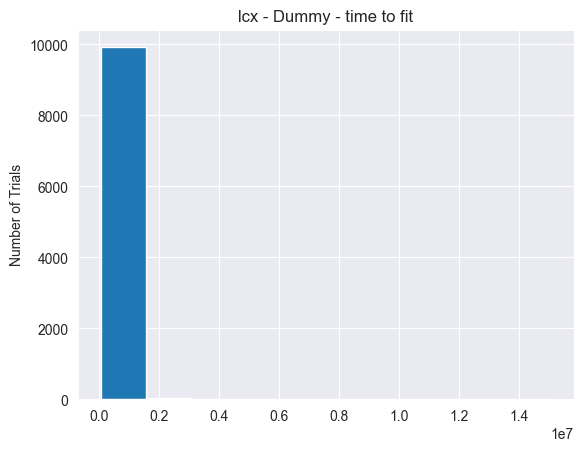

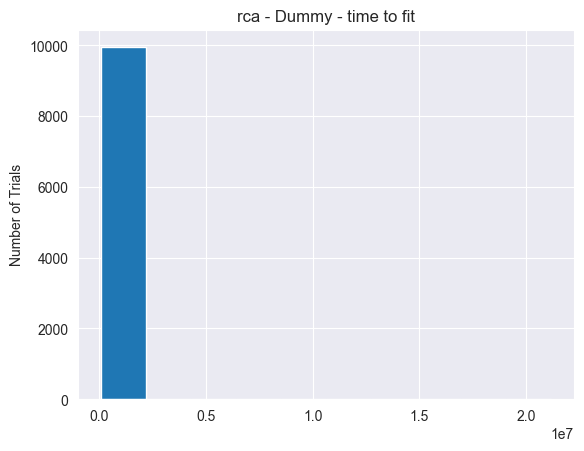

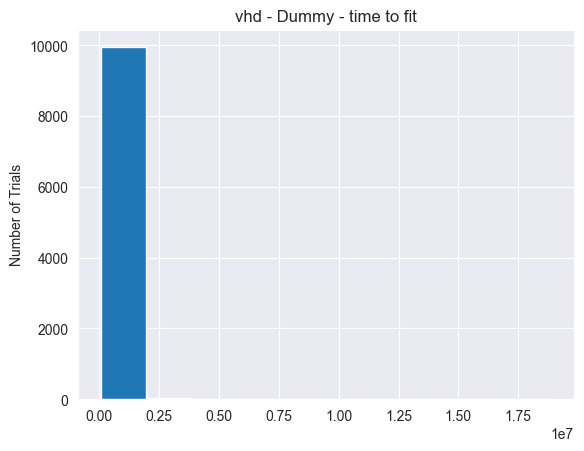

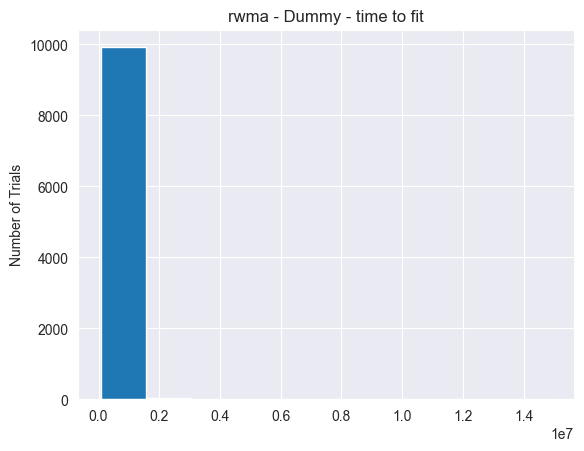

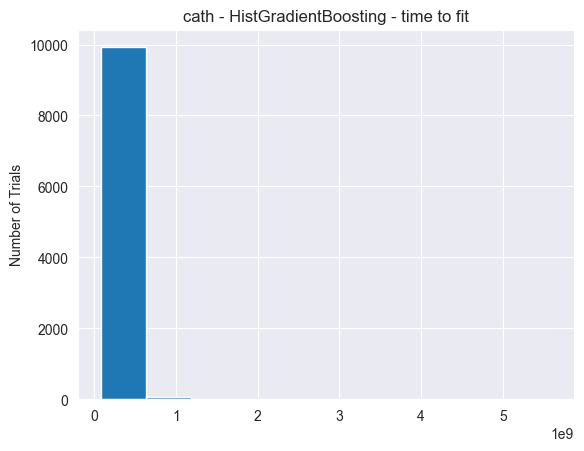

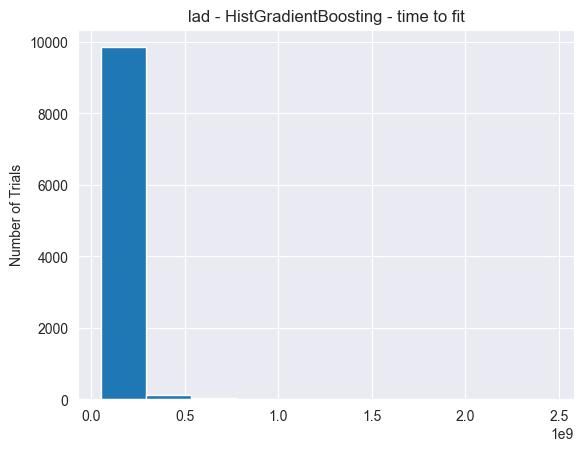

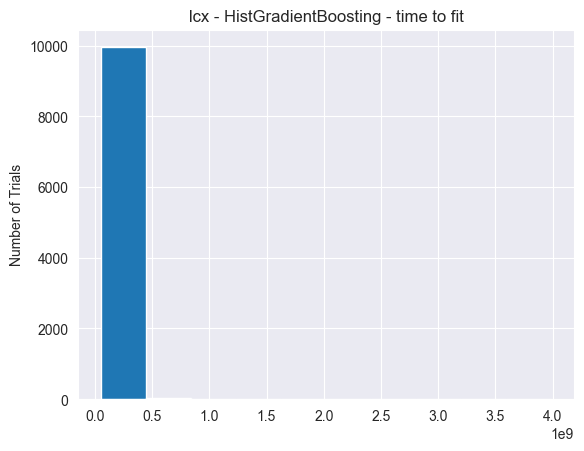

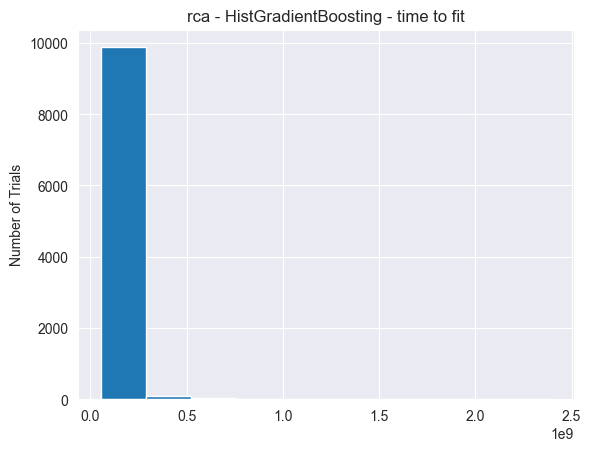

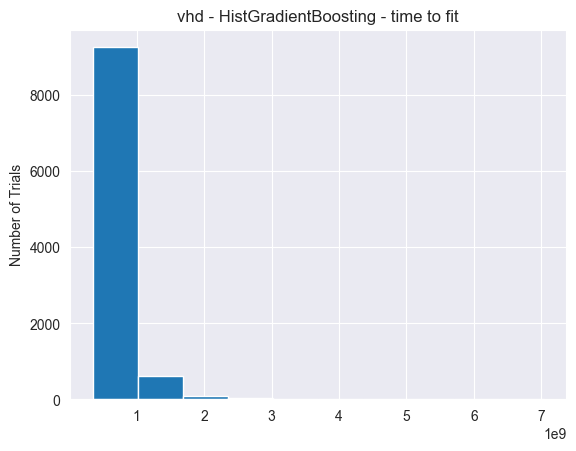

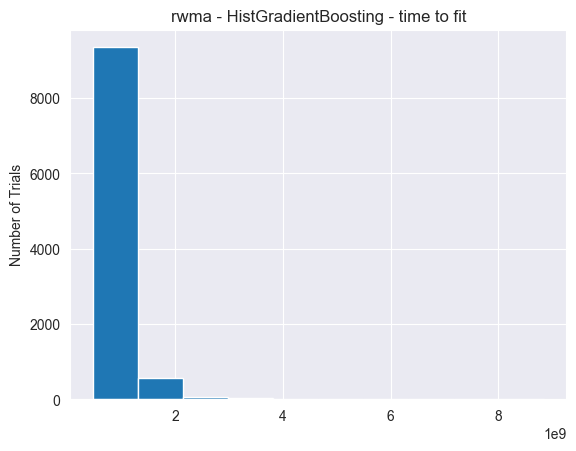

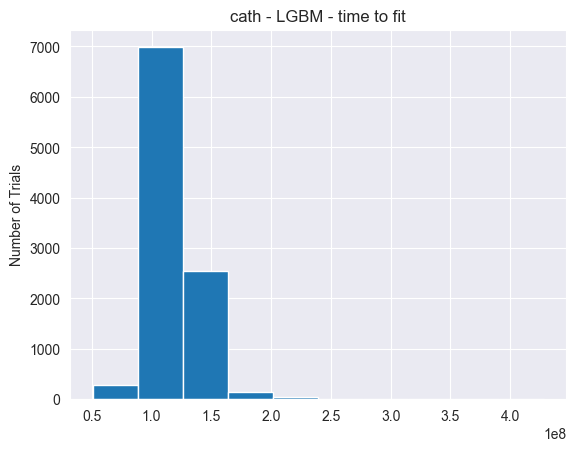

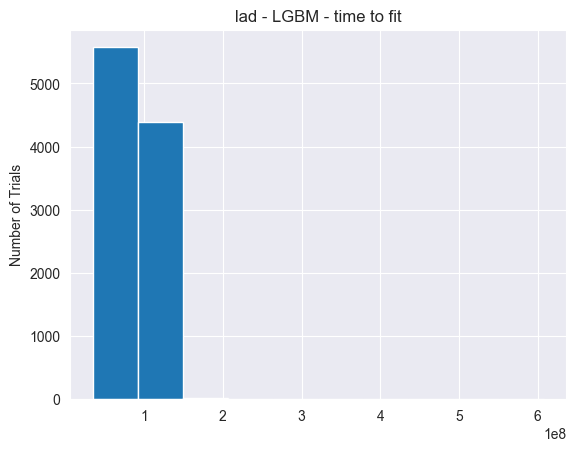

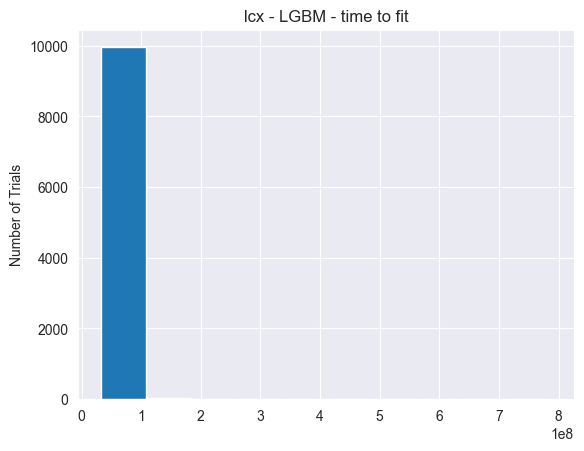

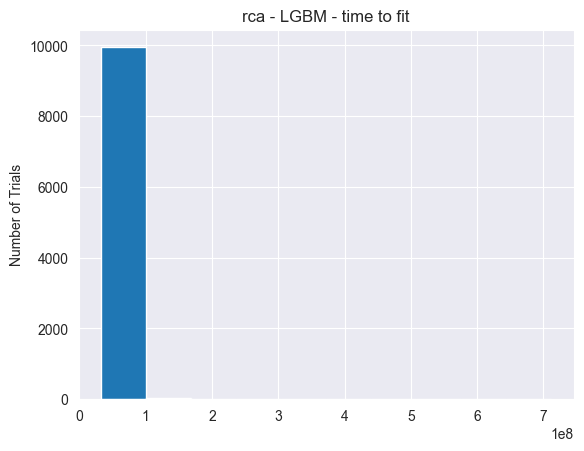

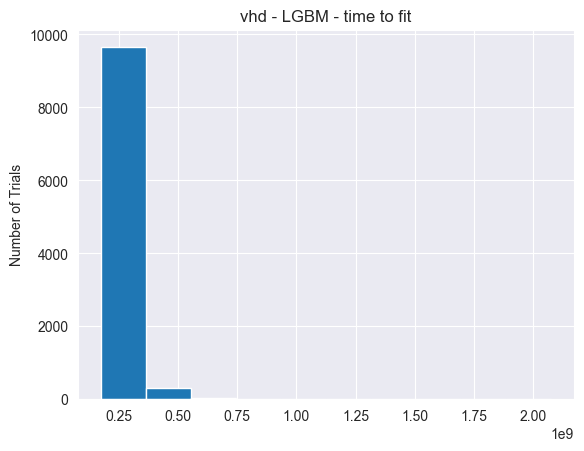

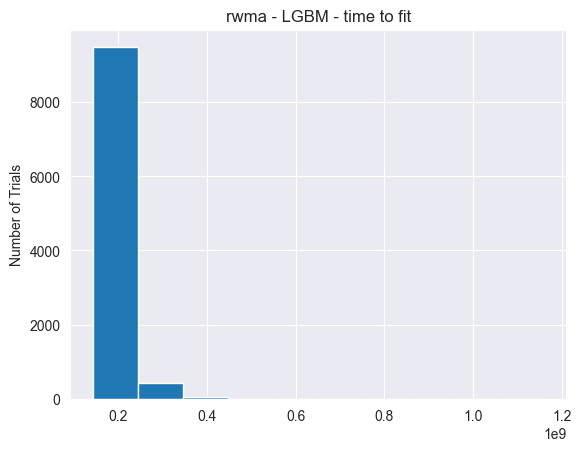

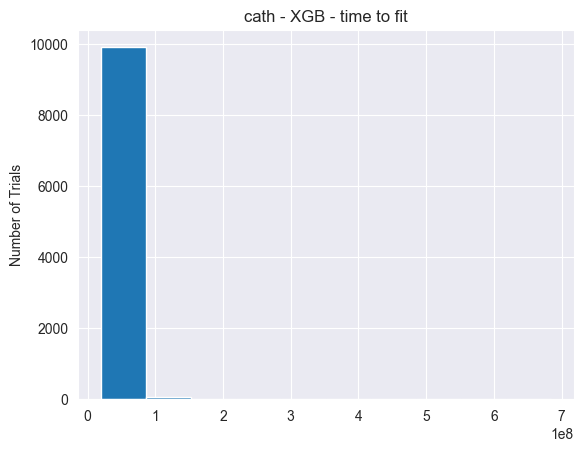

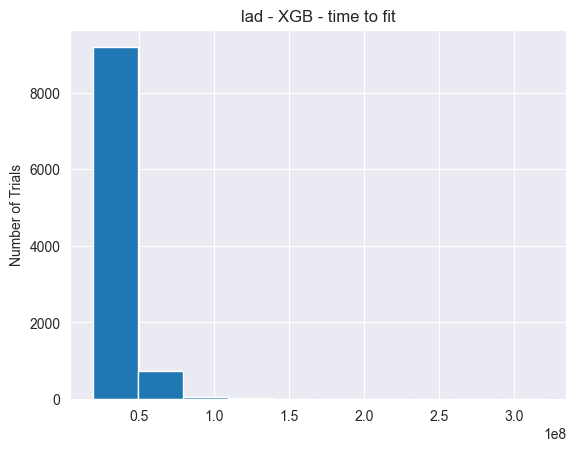

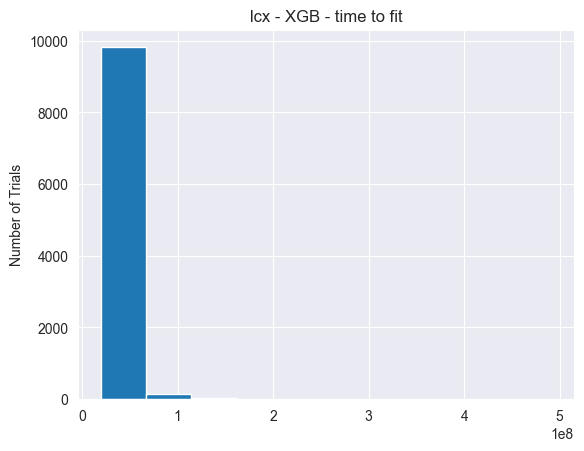

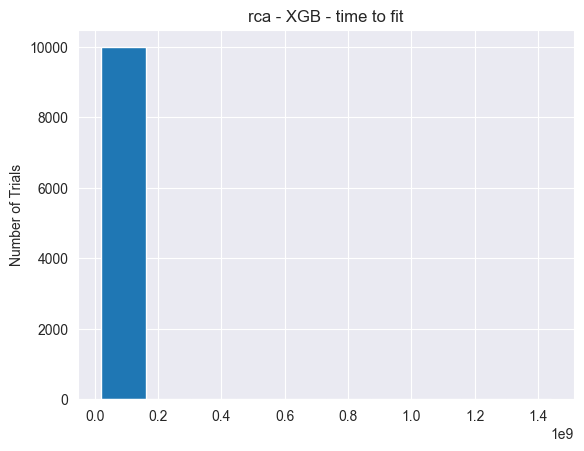

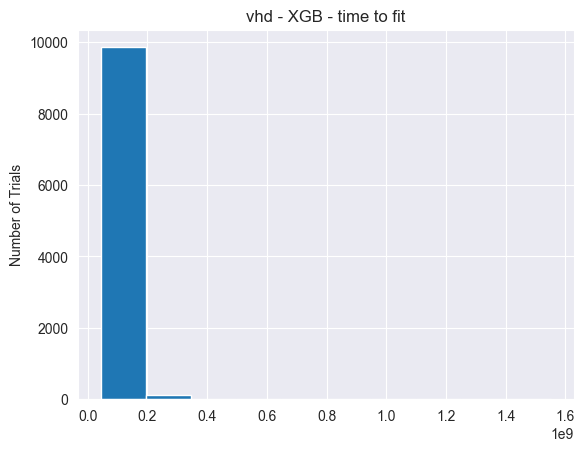

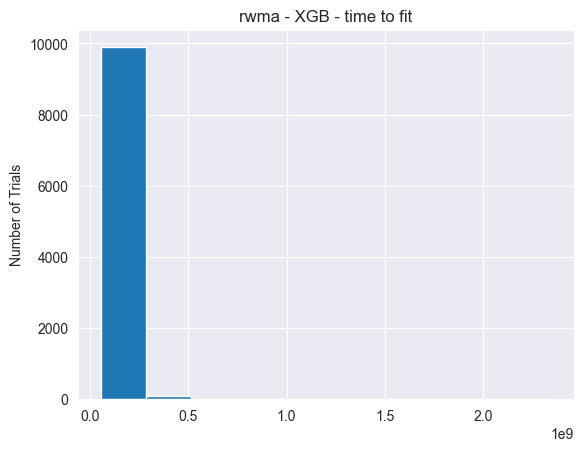

In [20]:
# Distribution of time to fit
for i in df.columns:
    if 'time to fit' in i:
        plt.hist(df[i])
        plt.title(i)
        plt.ylabel('Number of Trials')
        plt.show()

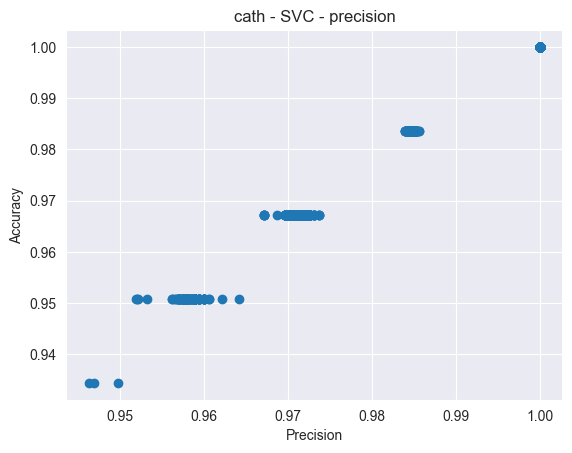

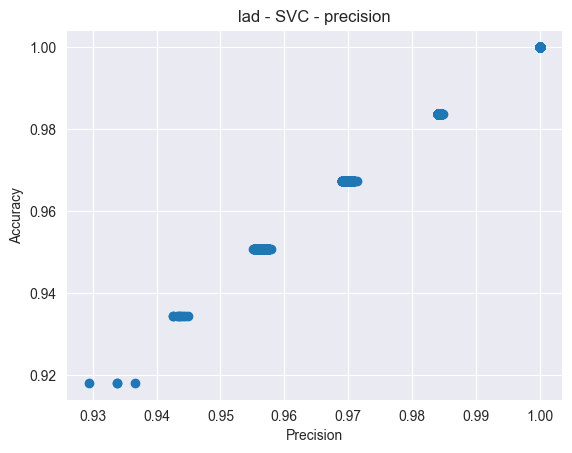

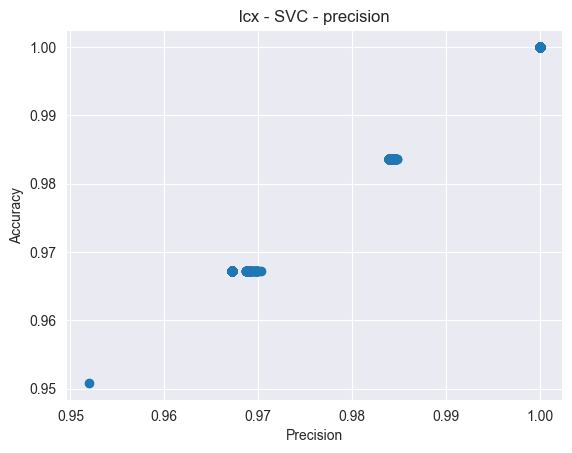

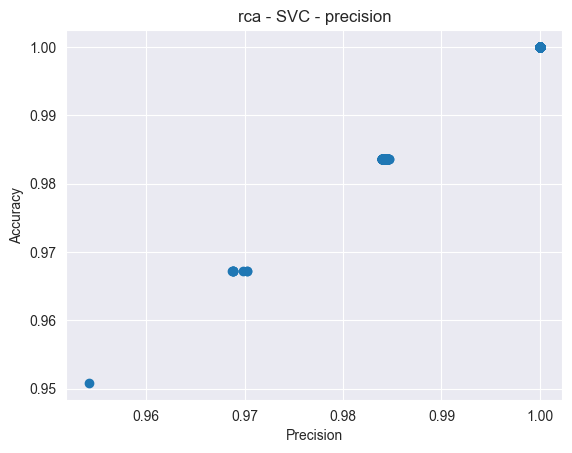

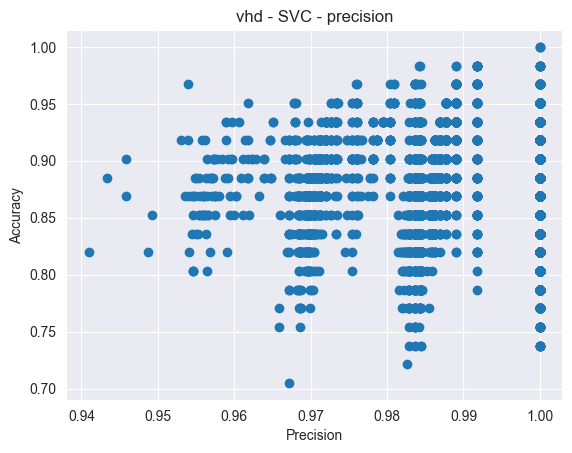

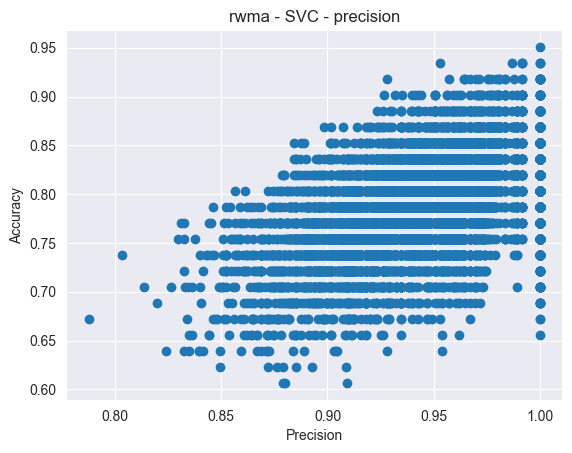

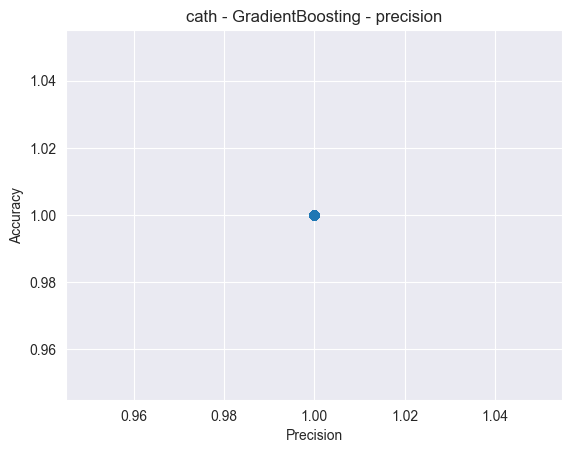

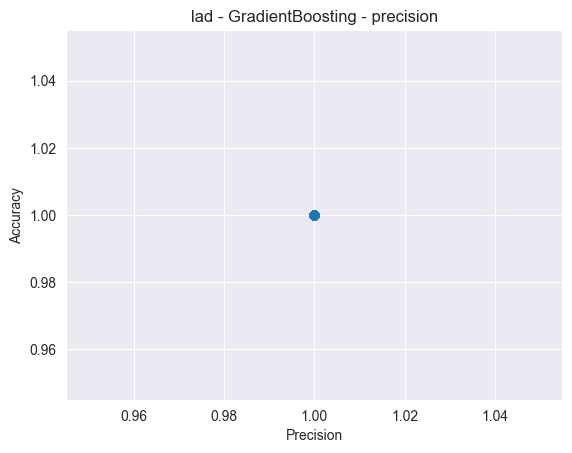

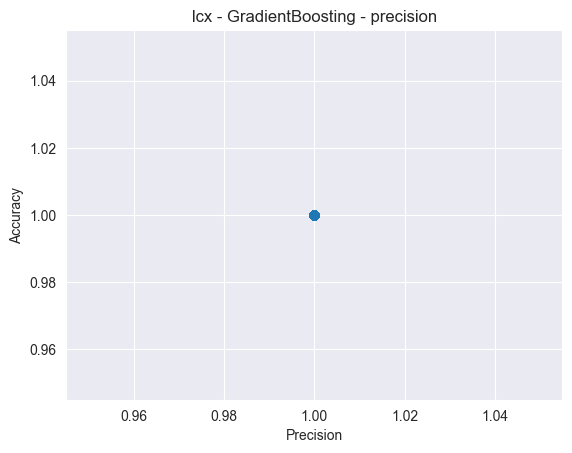

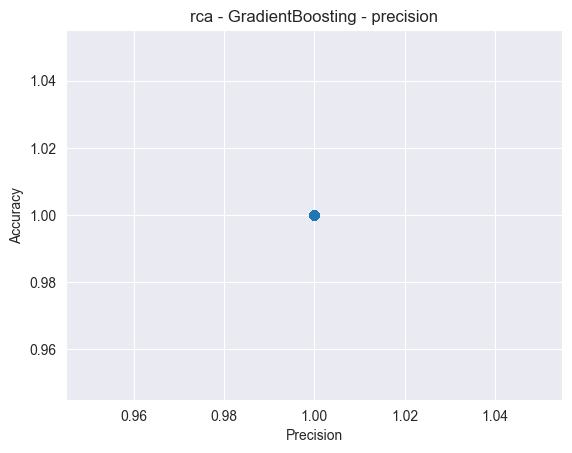

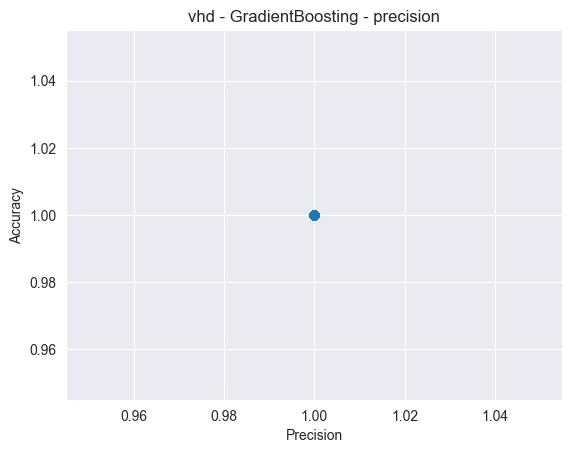

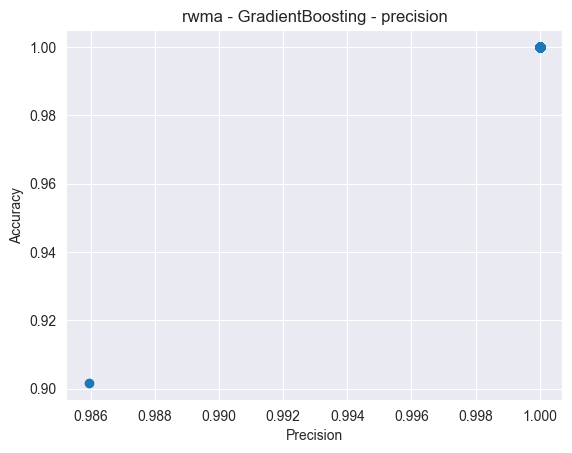

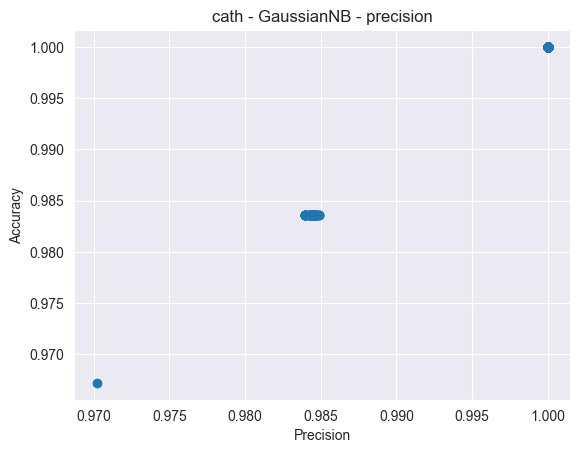

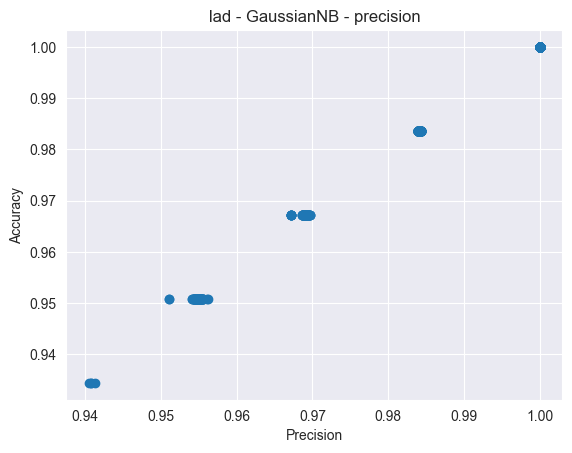

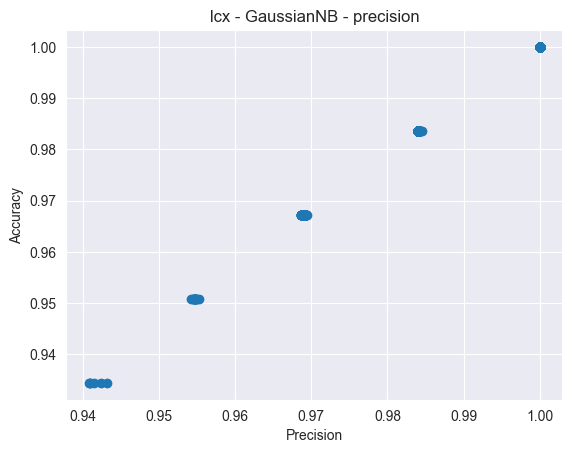

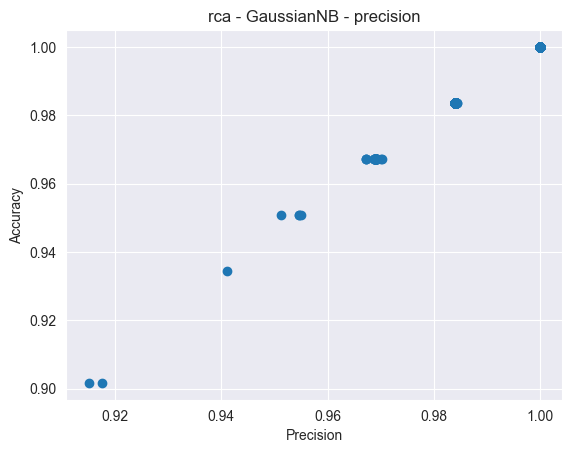

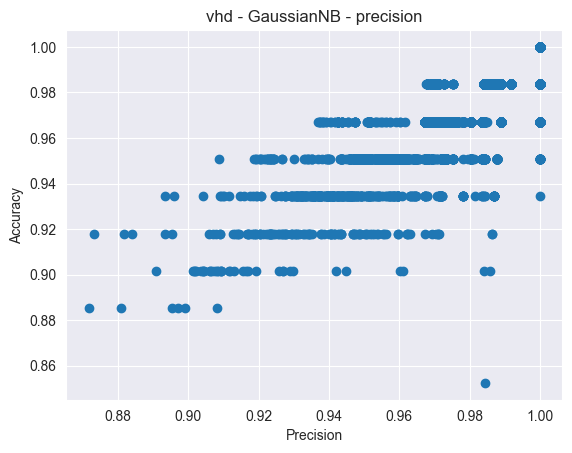

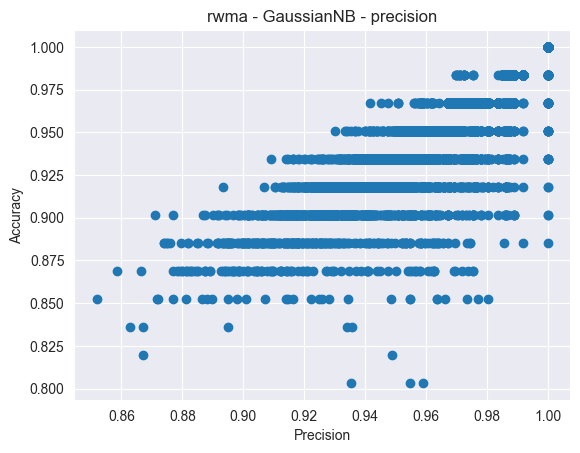

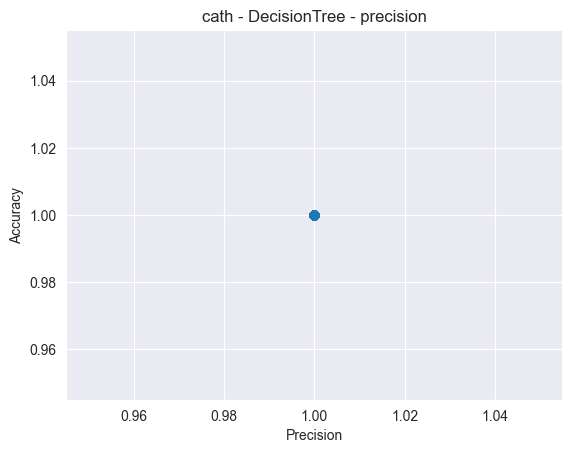

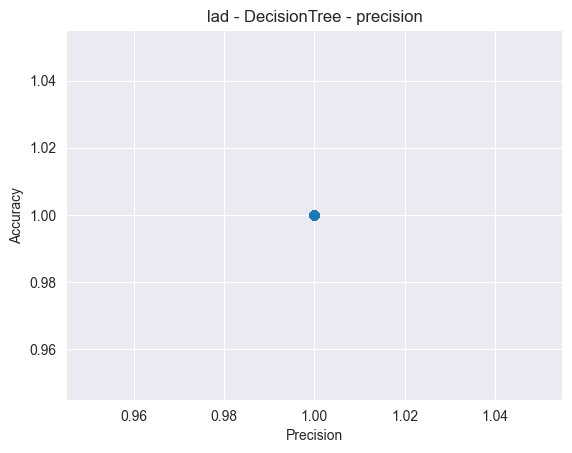

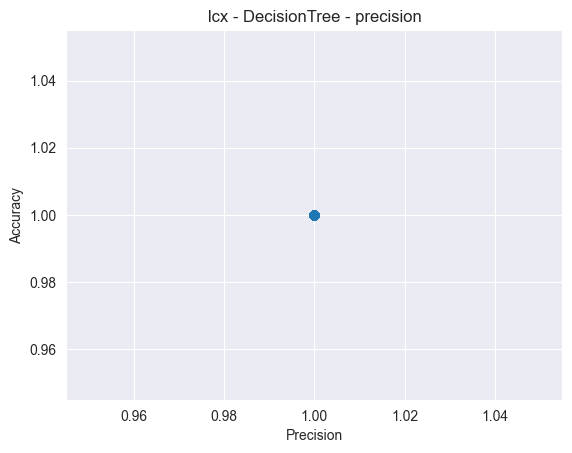

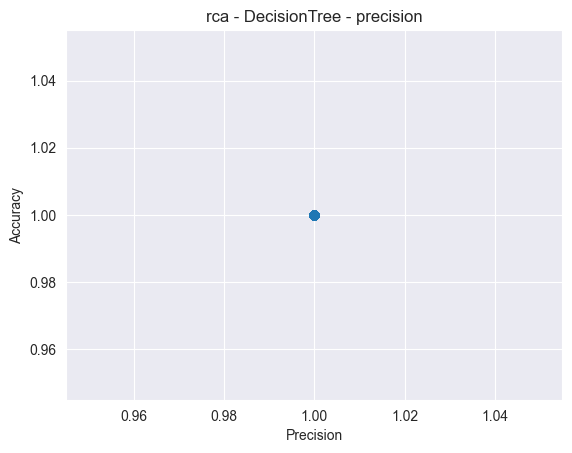

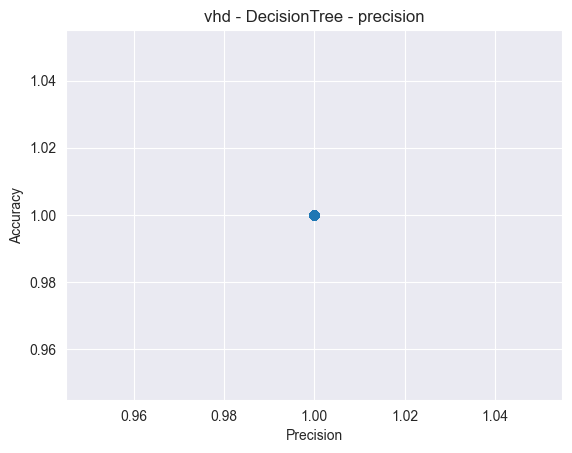

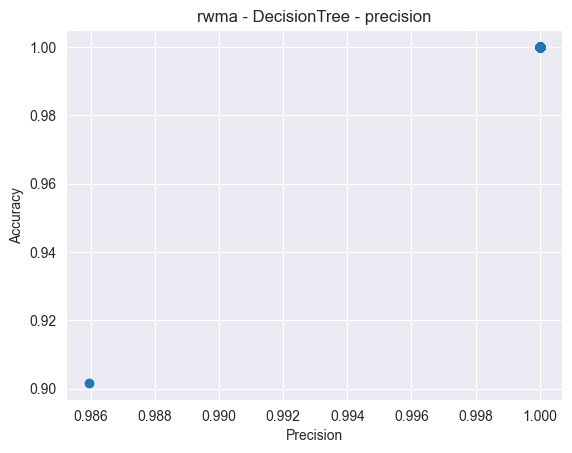

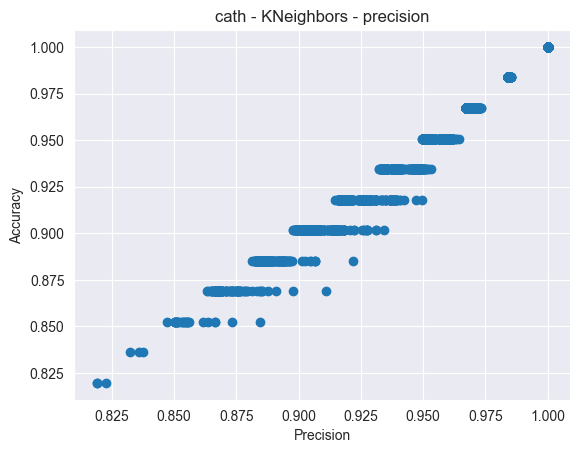

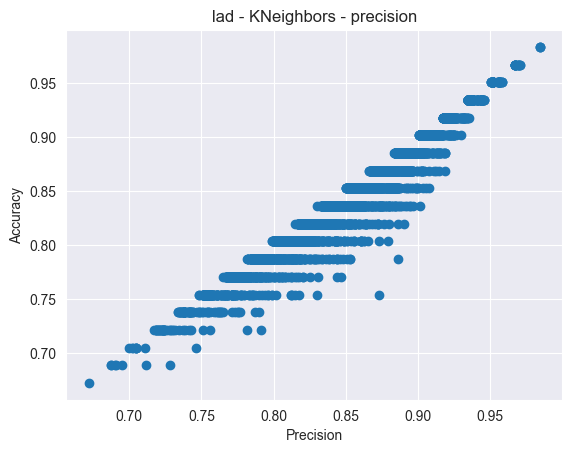

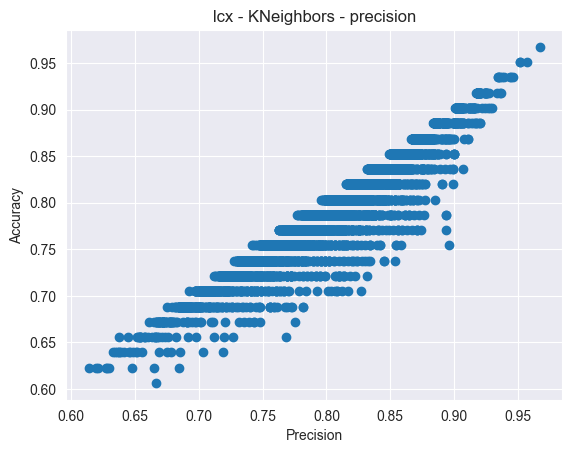

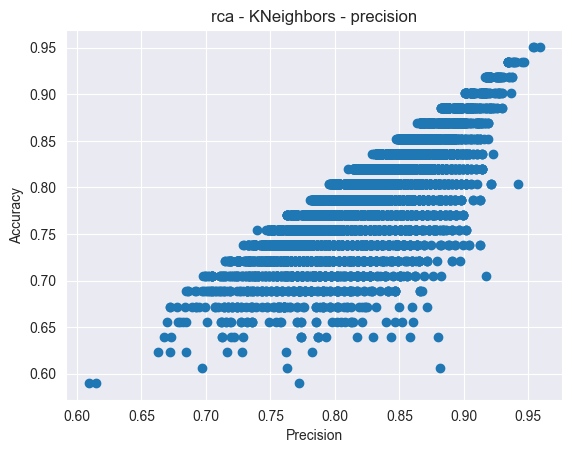

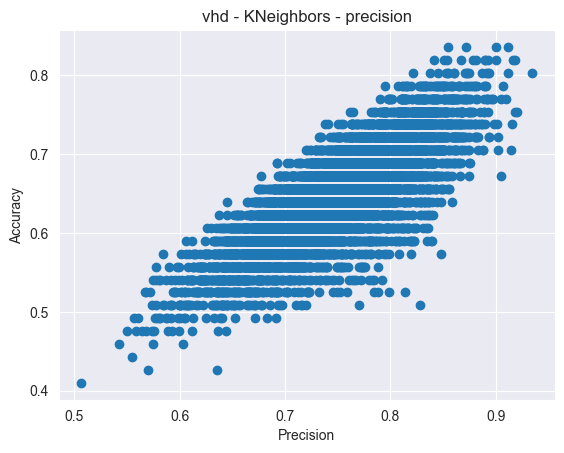

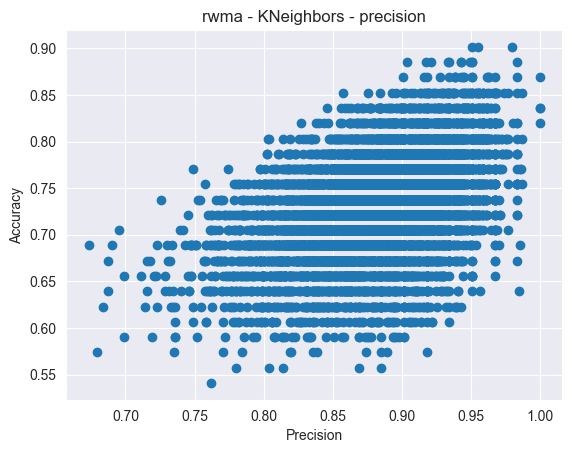

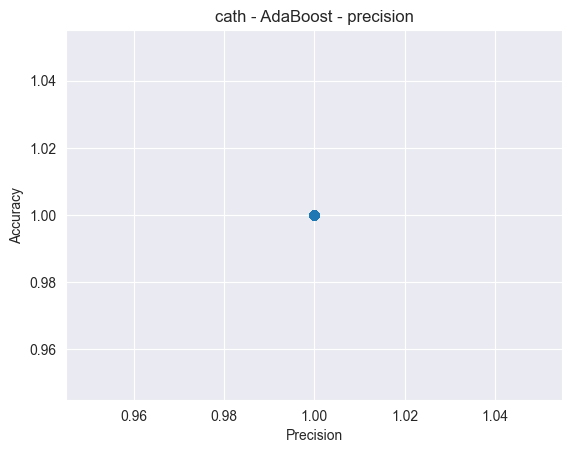

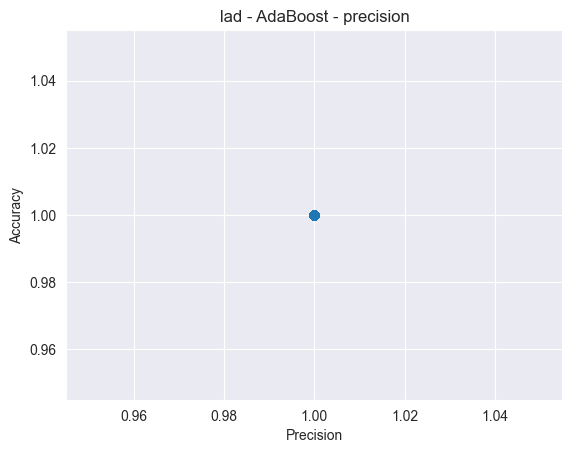

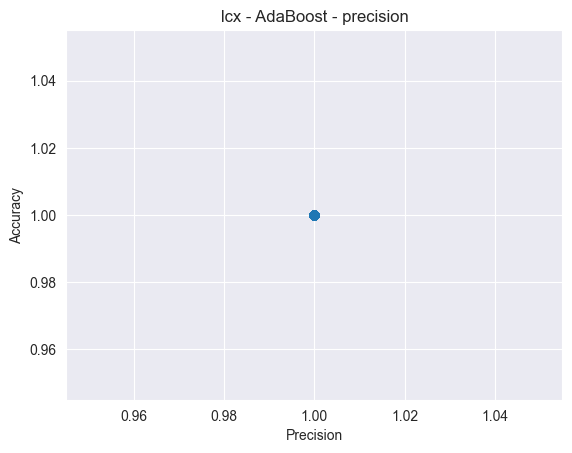

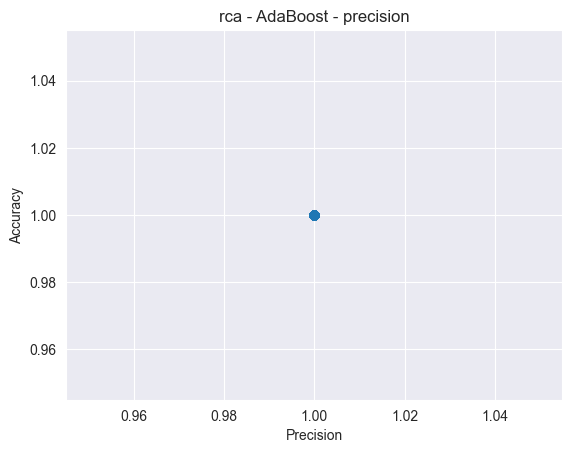

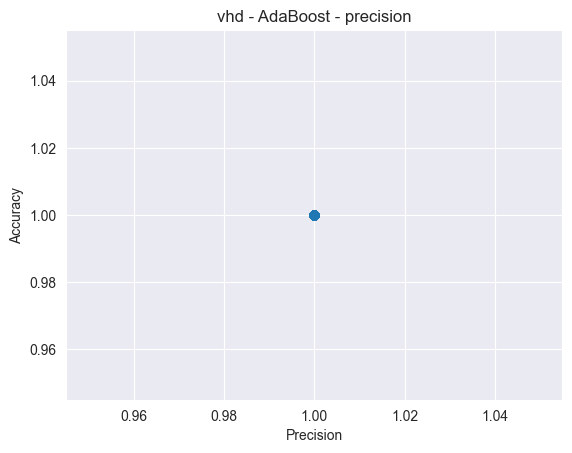

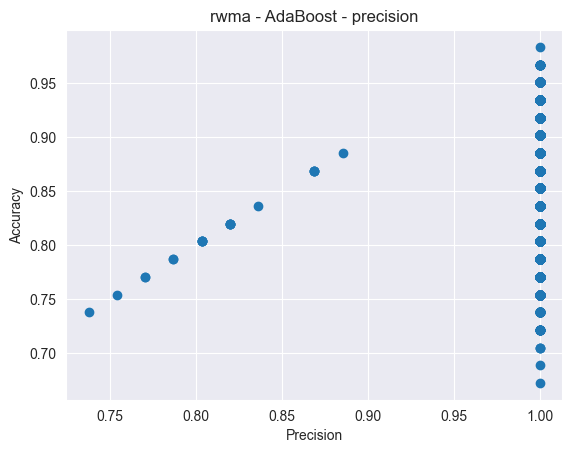

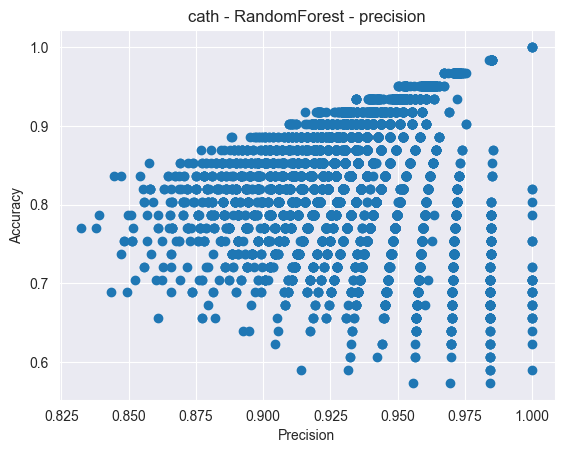

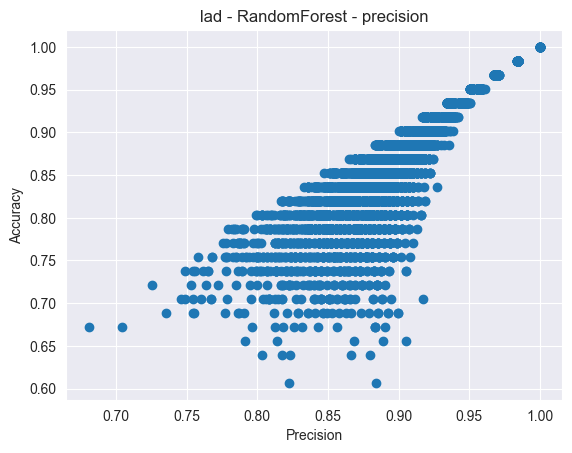

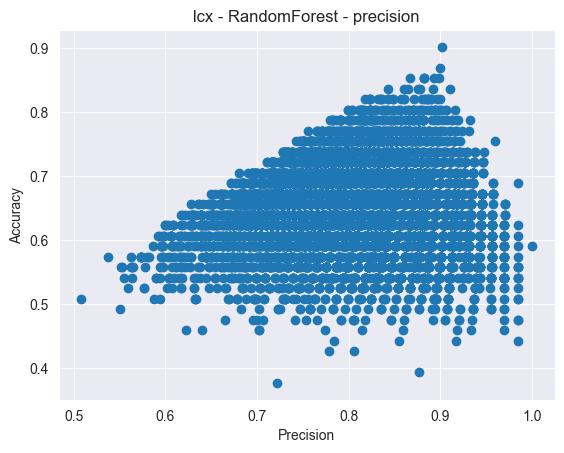

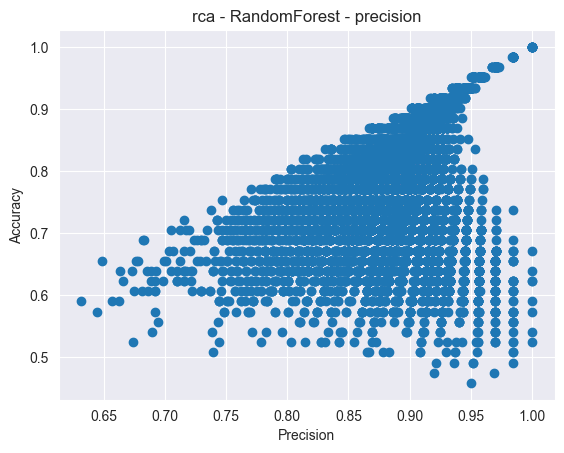

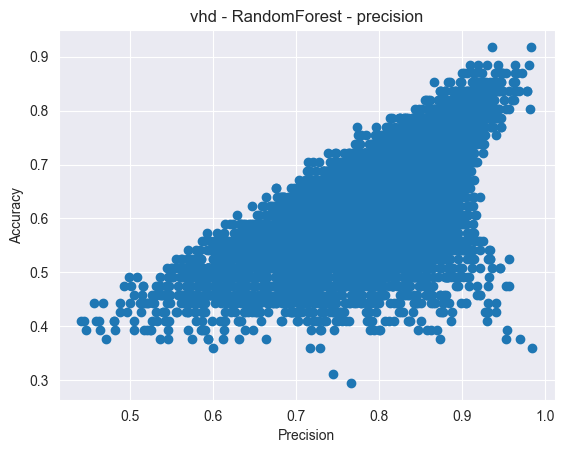

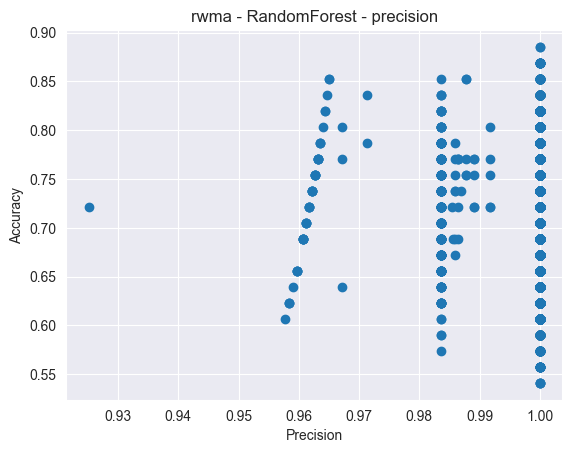

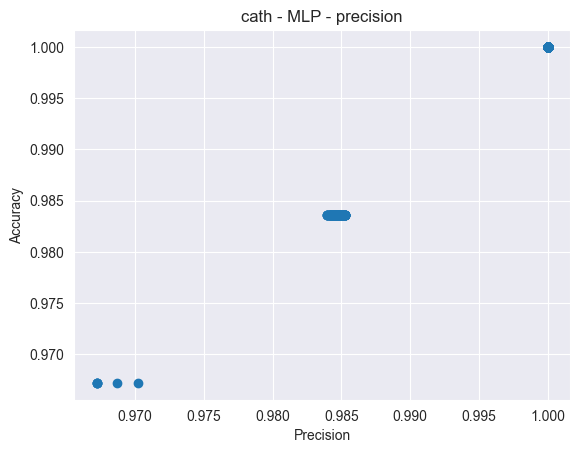

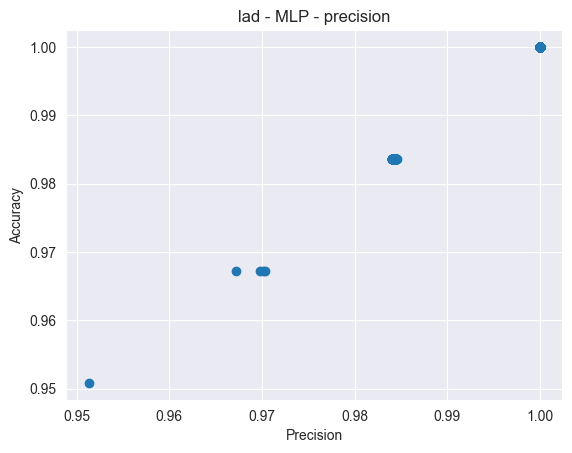

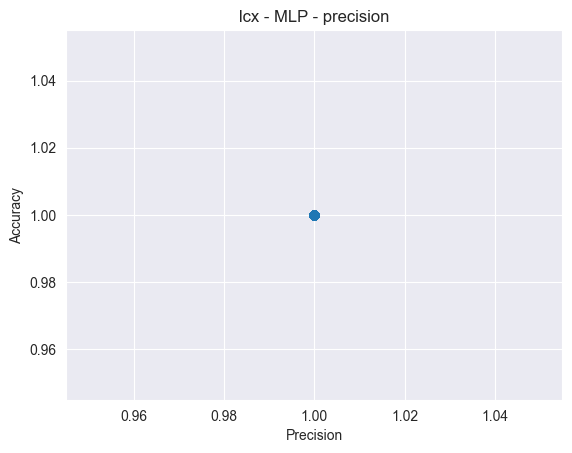

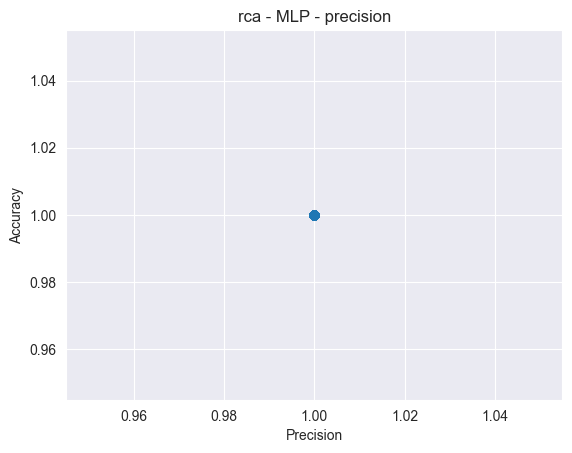

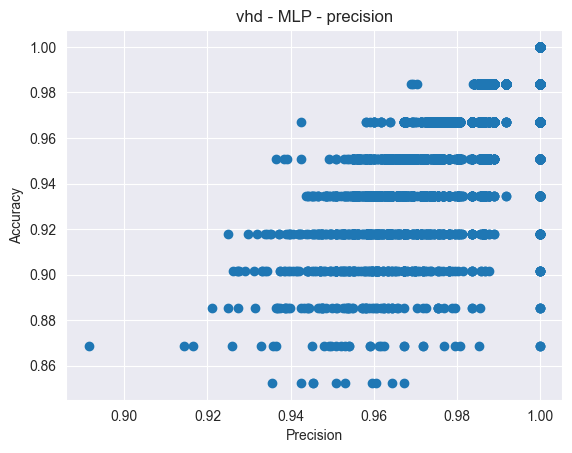

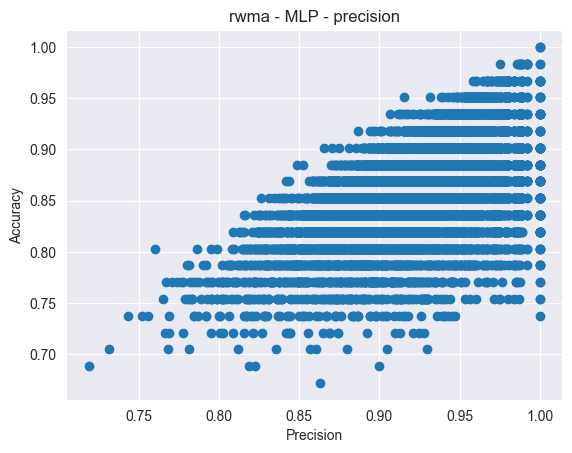

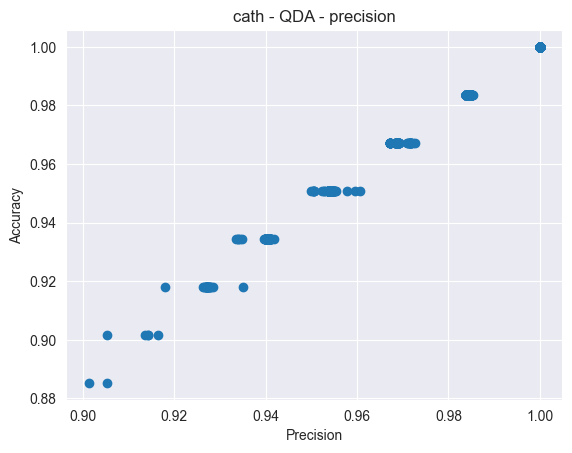

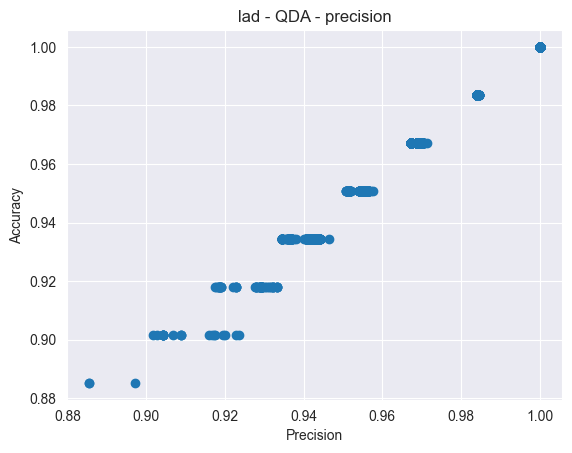

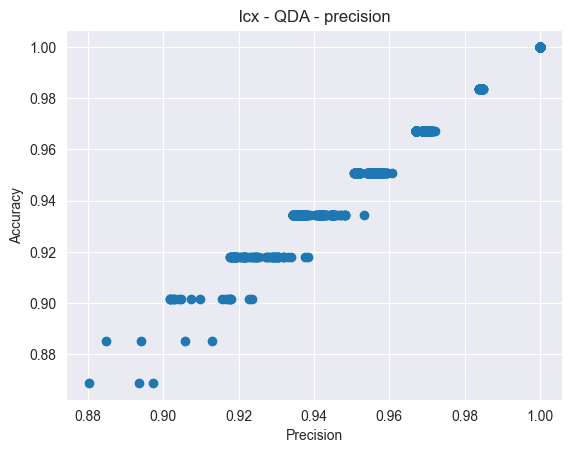

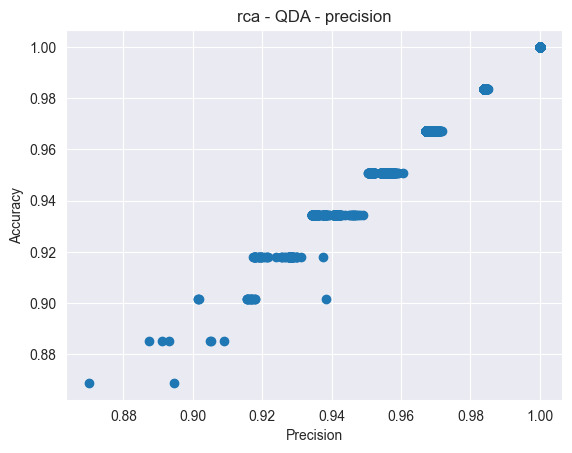

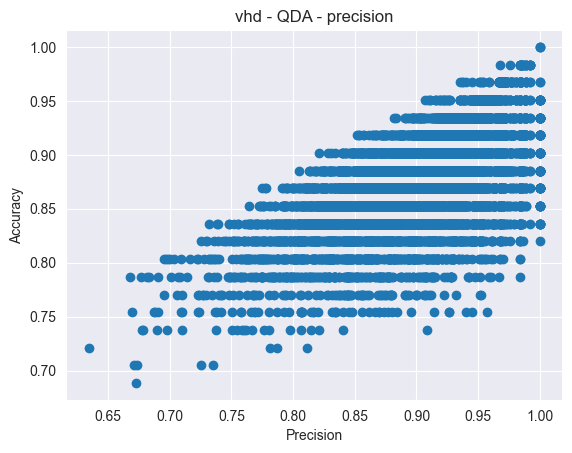

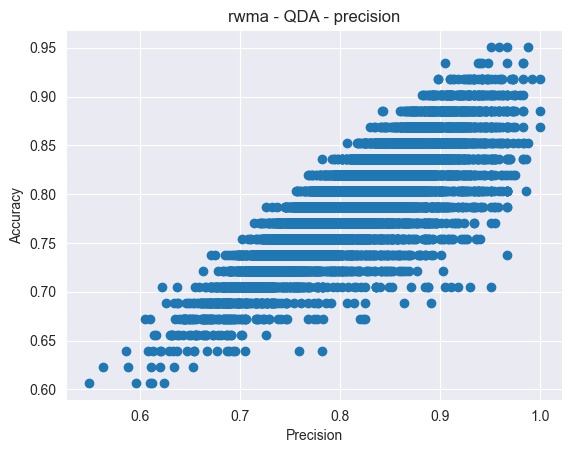

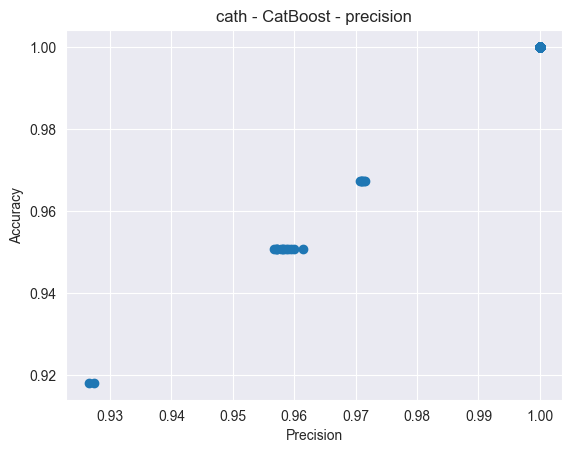

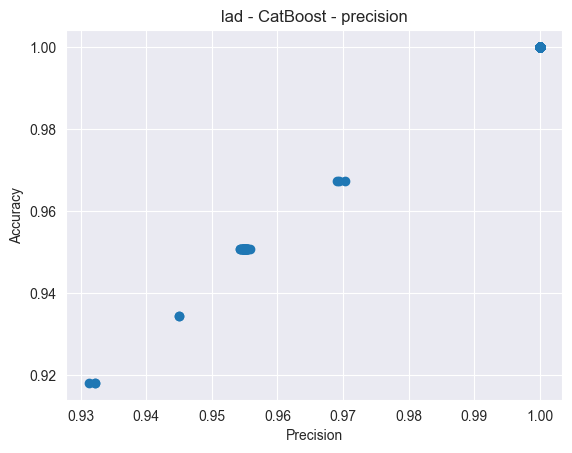

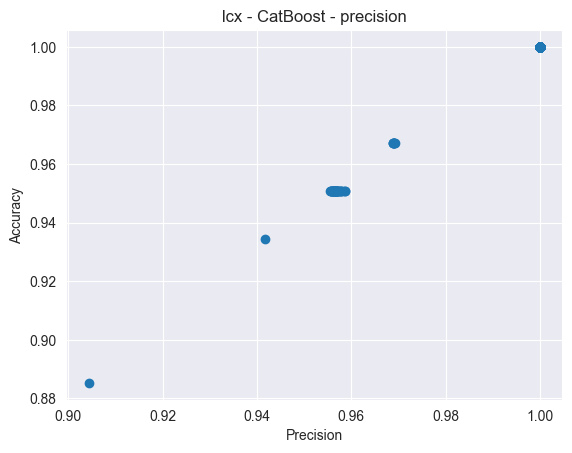

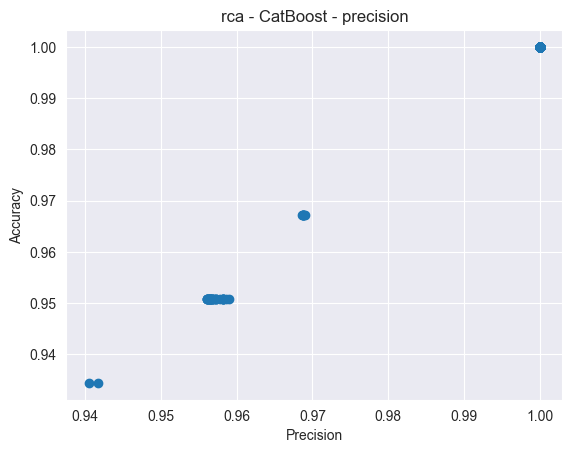

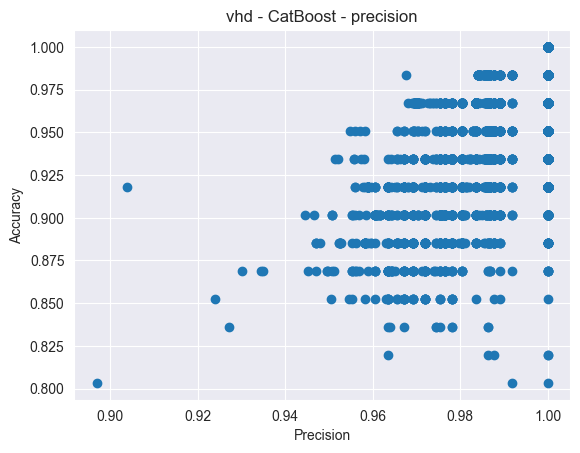

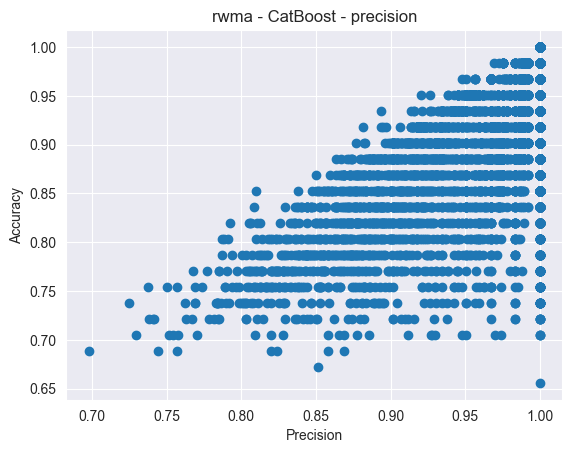

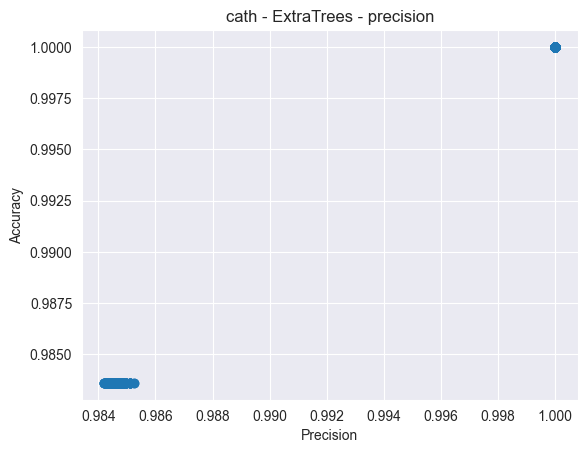

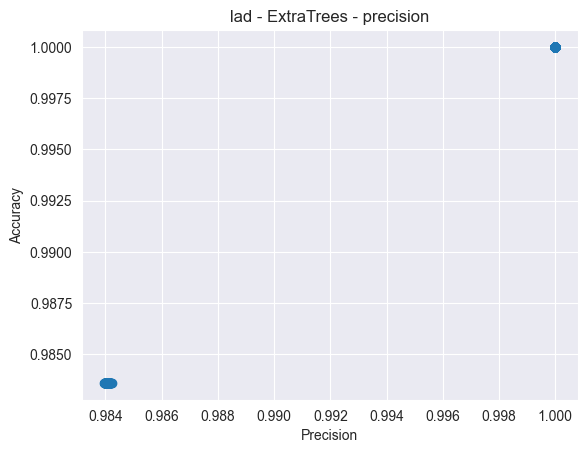

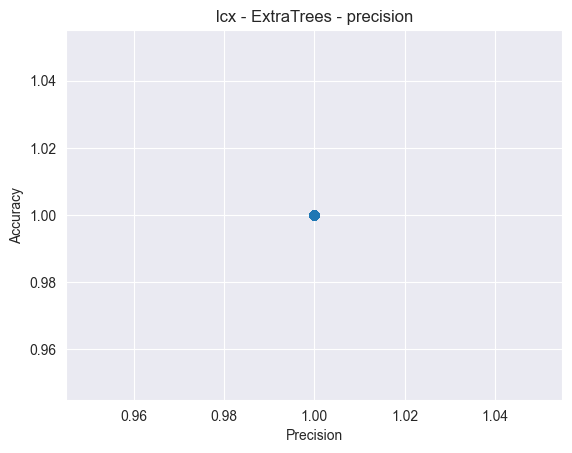

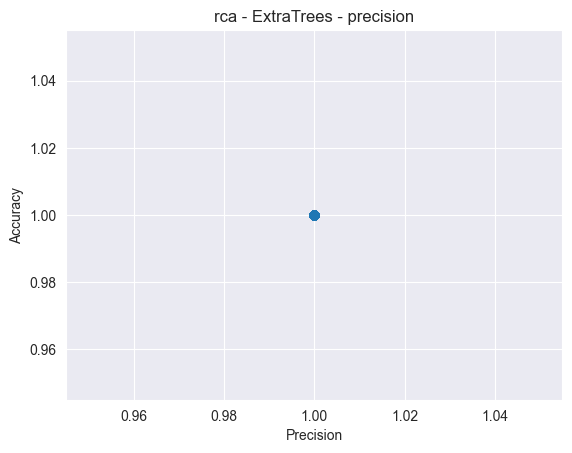

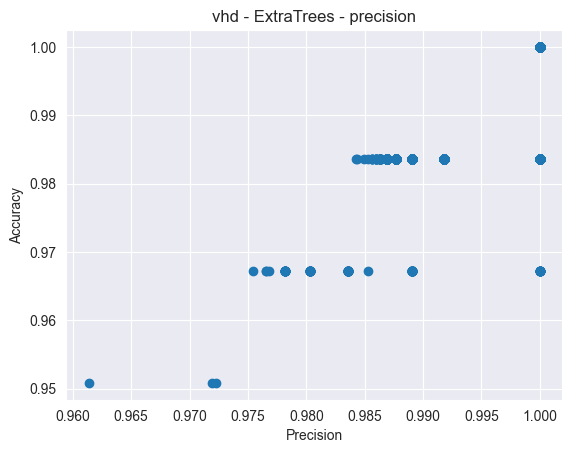

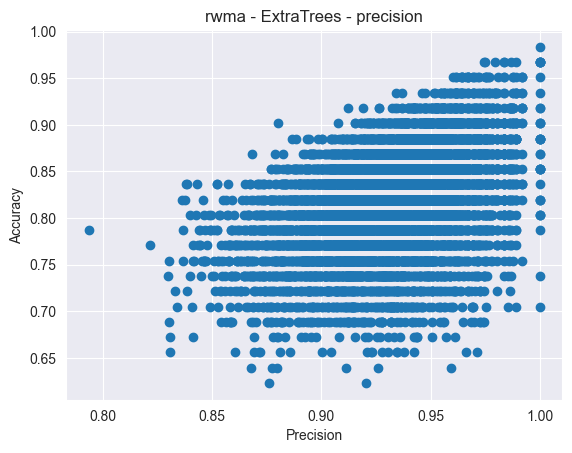

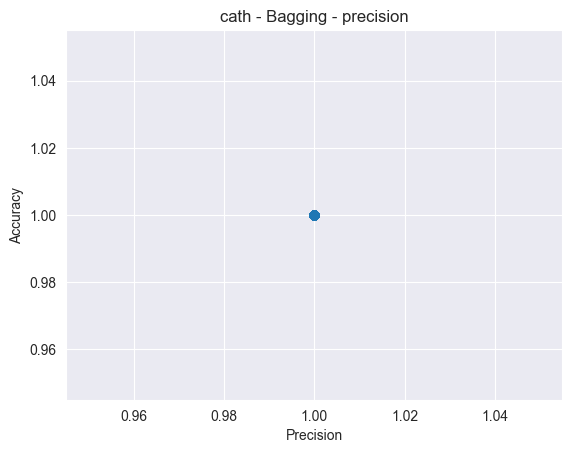

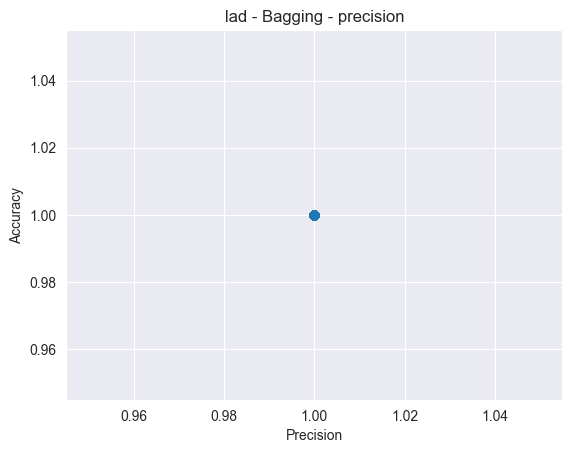

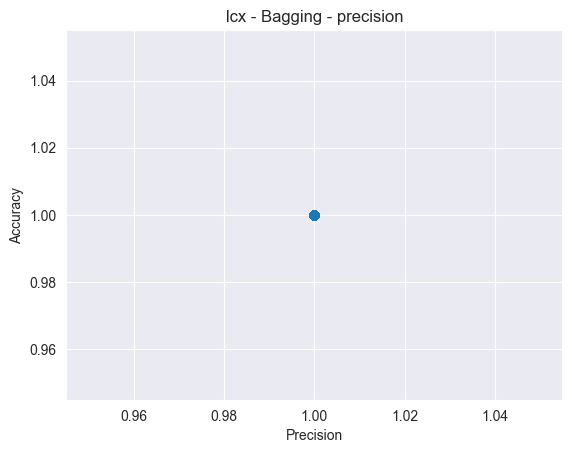

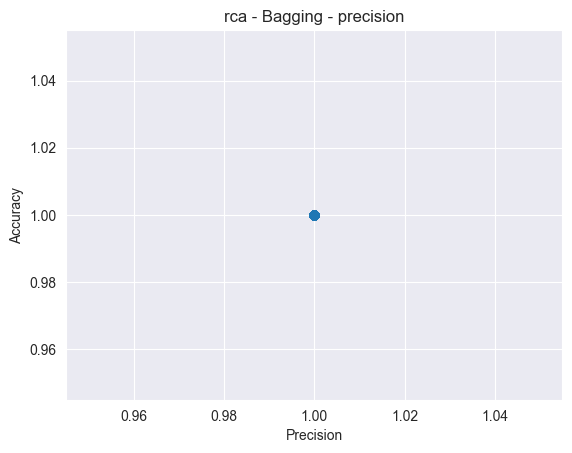

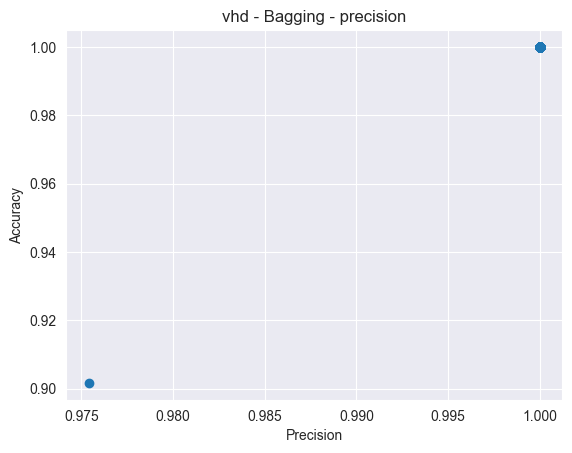

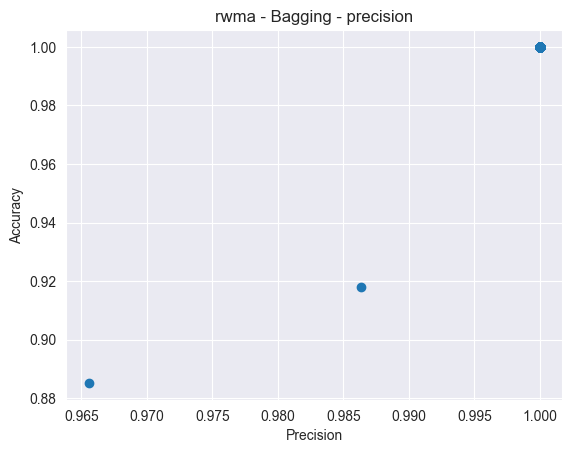

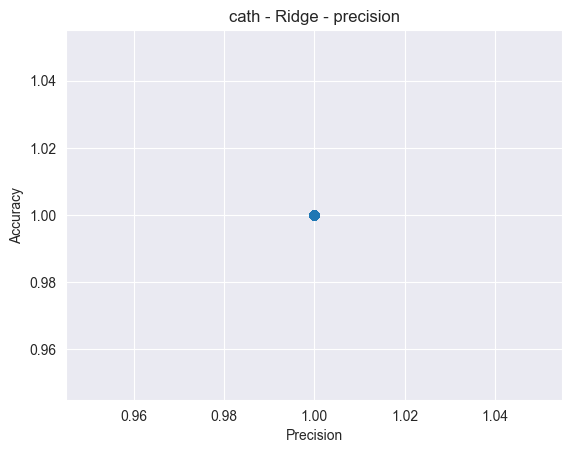

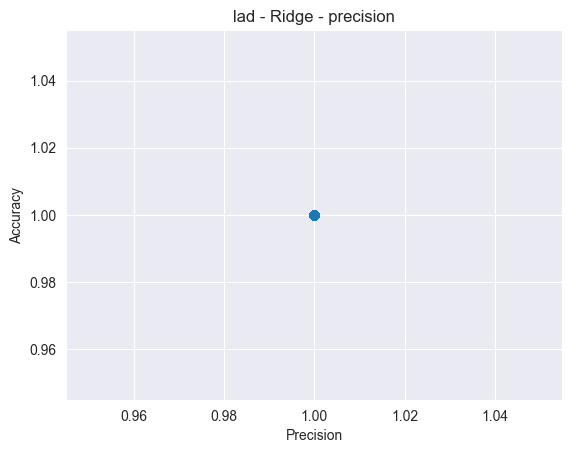

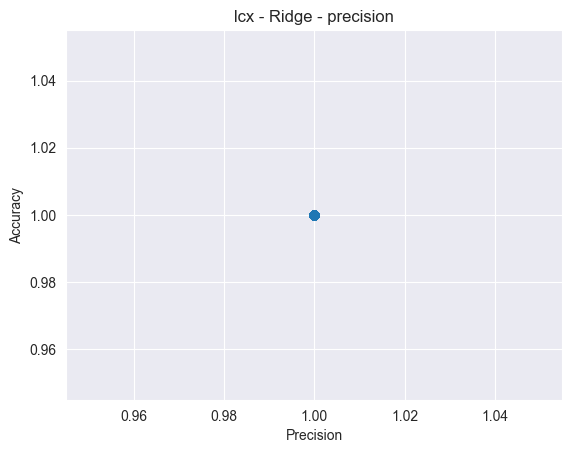

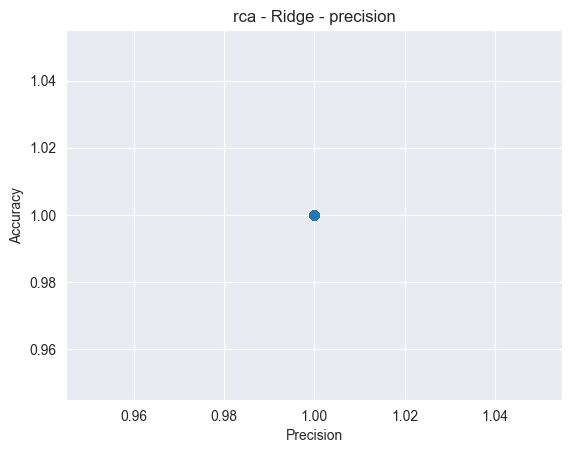

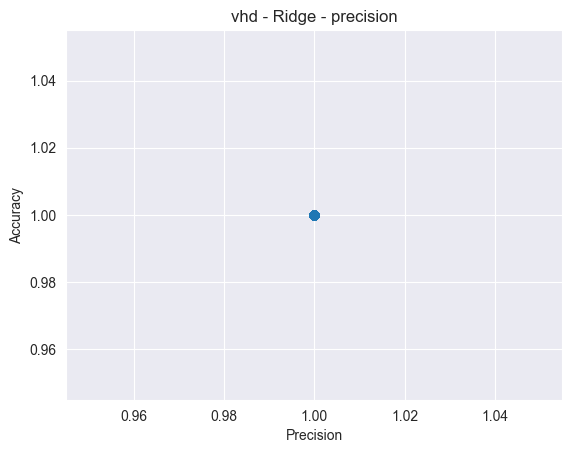

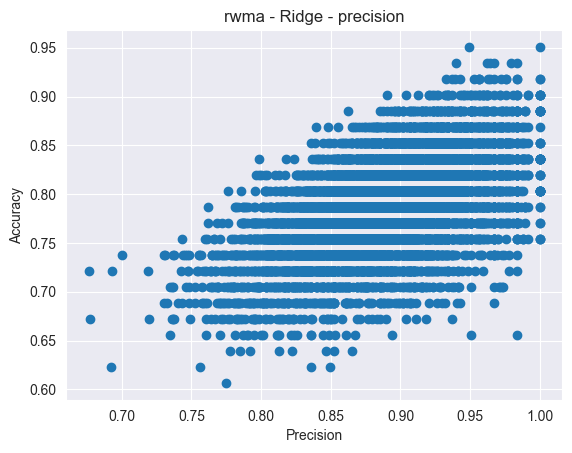

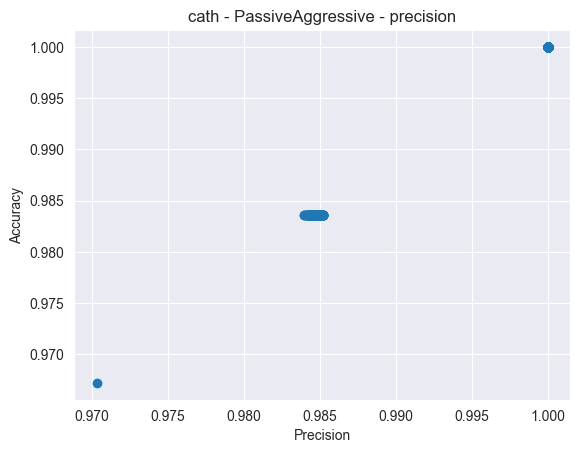

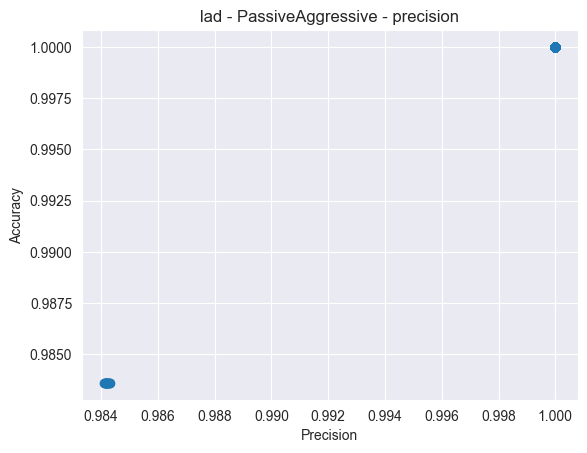

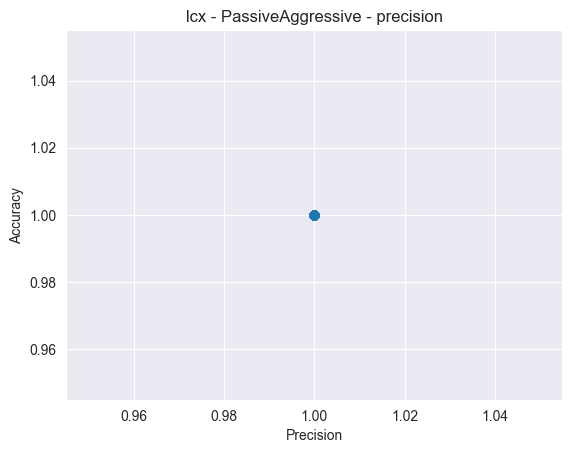

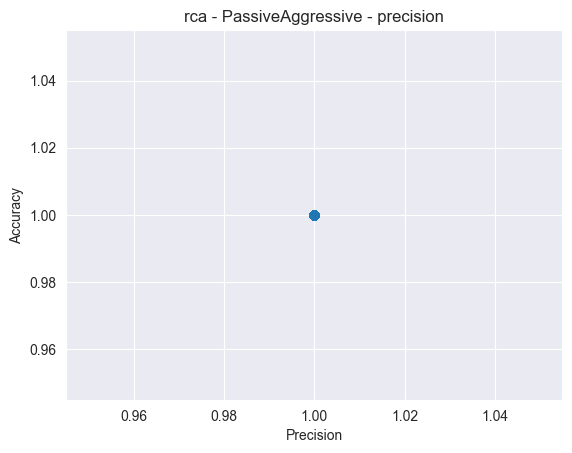

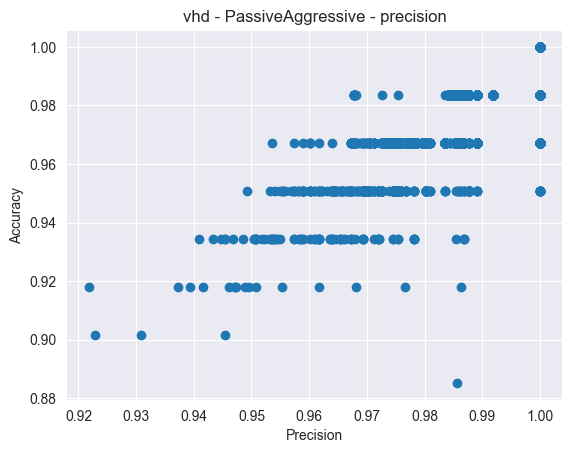

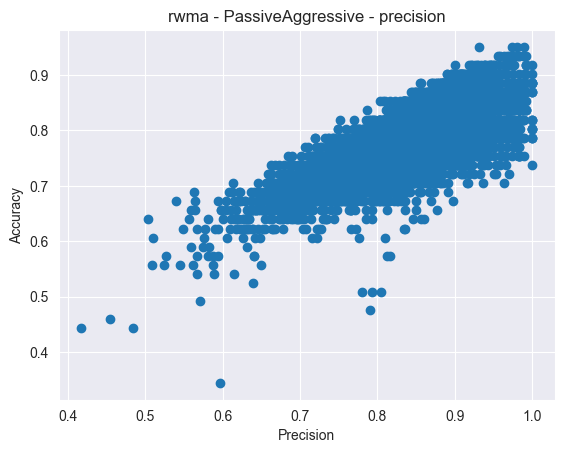

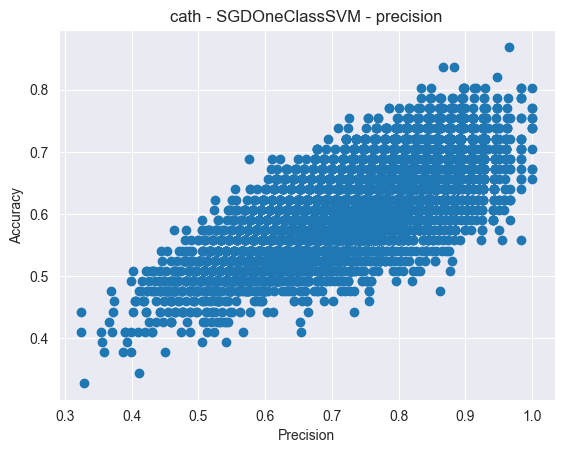

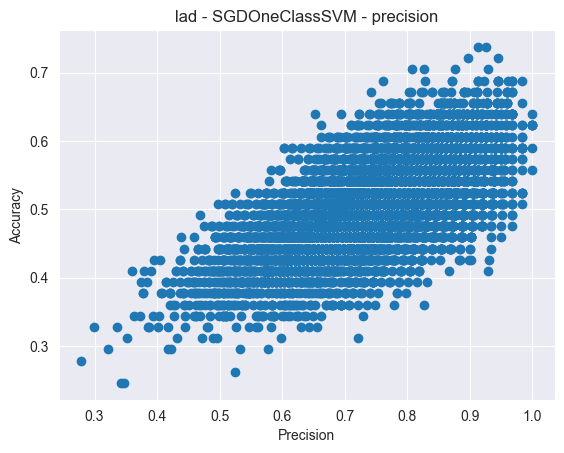

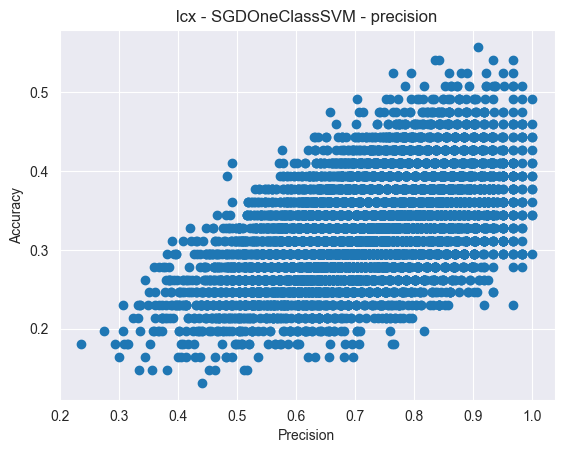

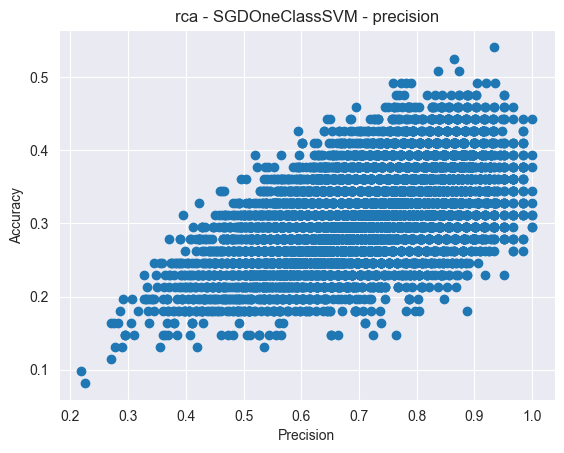

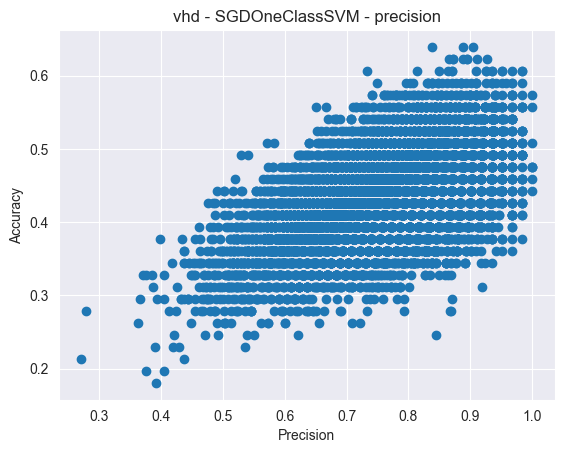

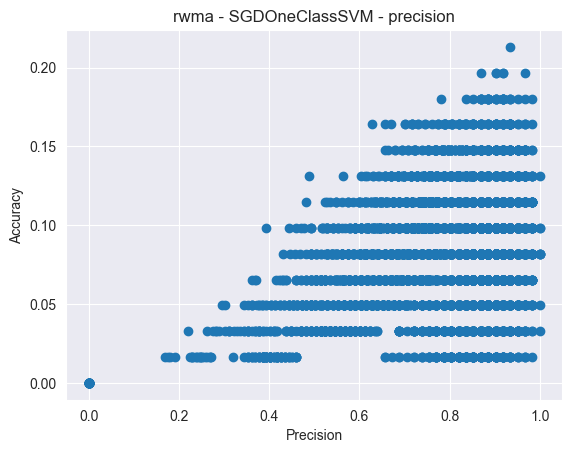

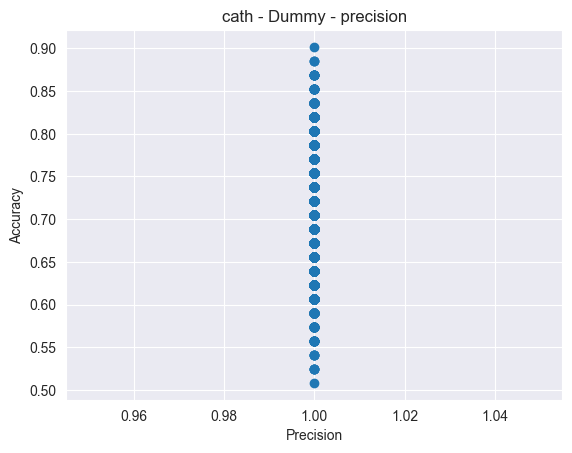

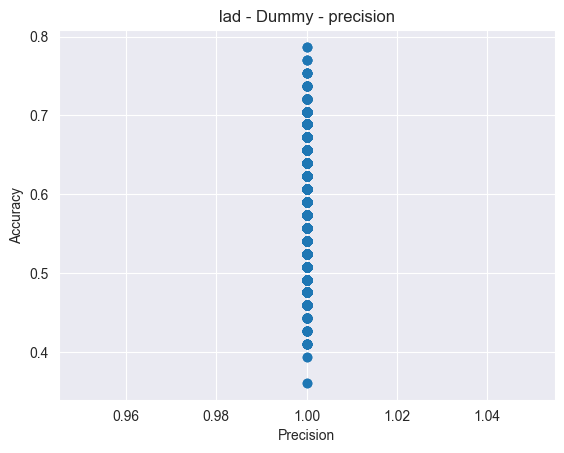

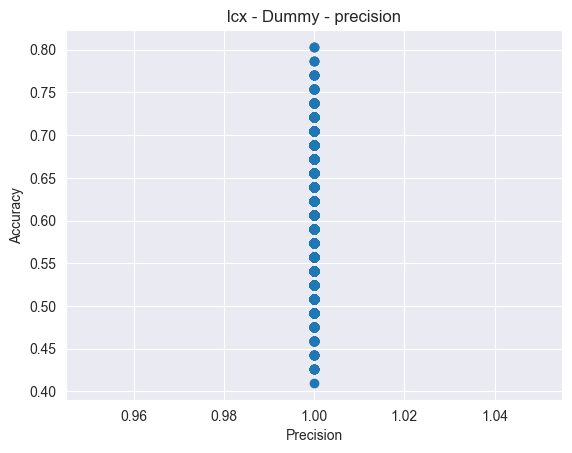

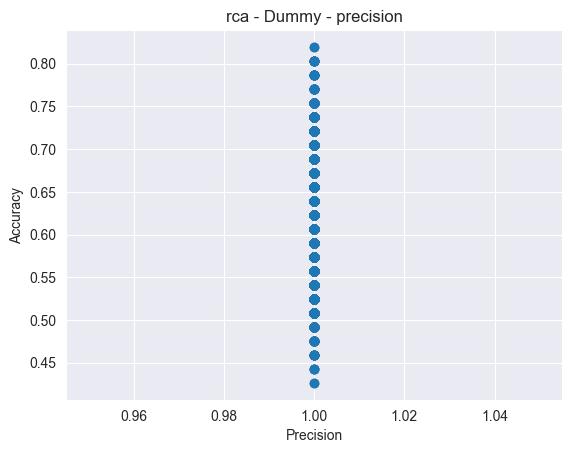

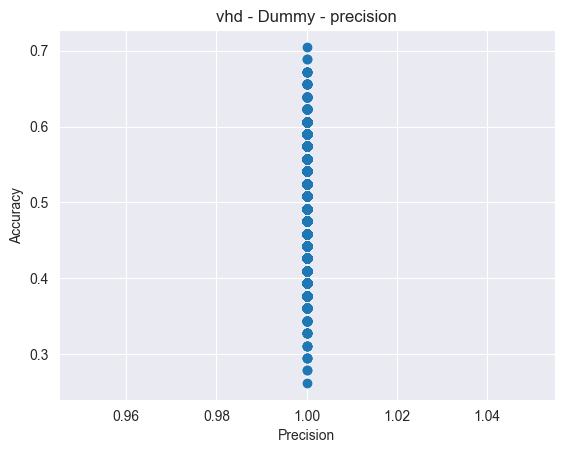

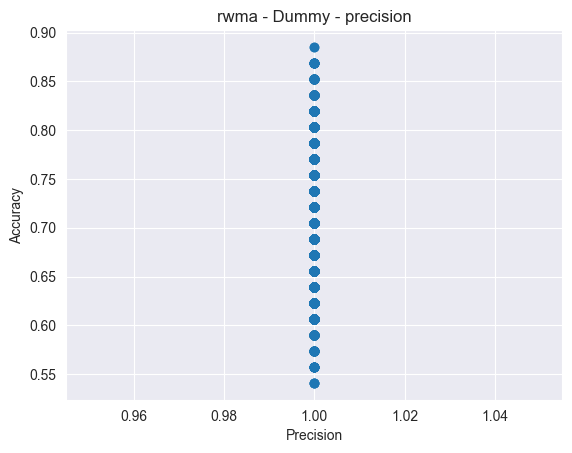

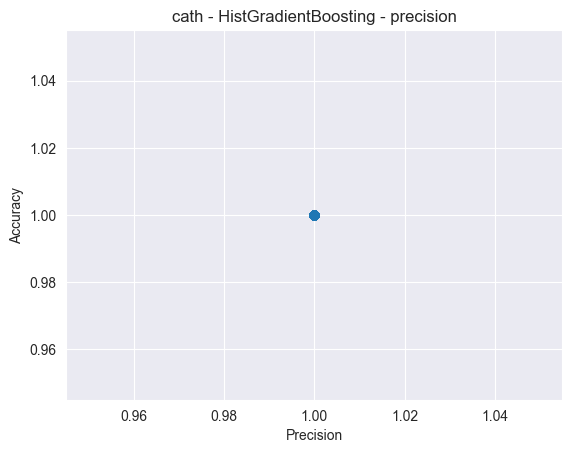

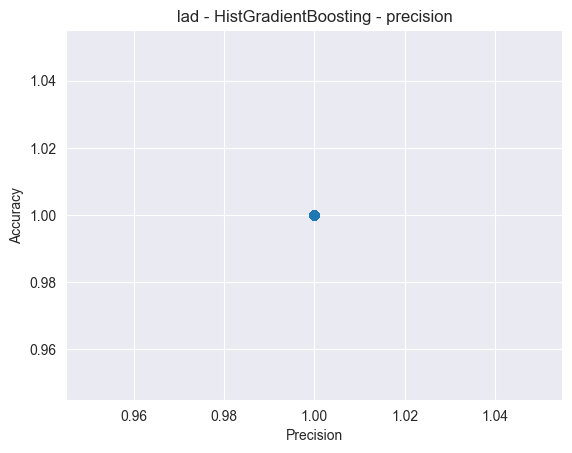

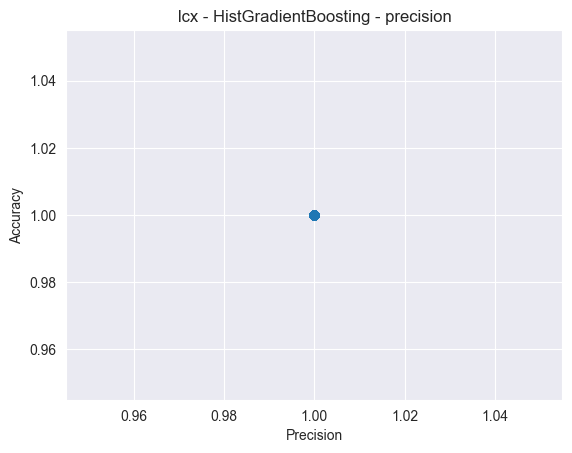

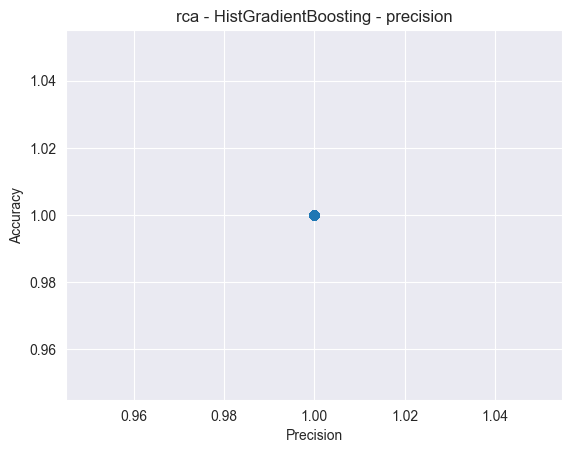

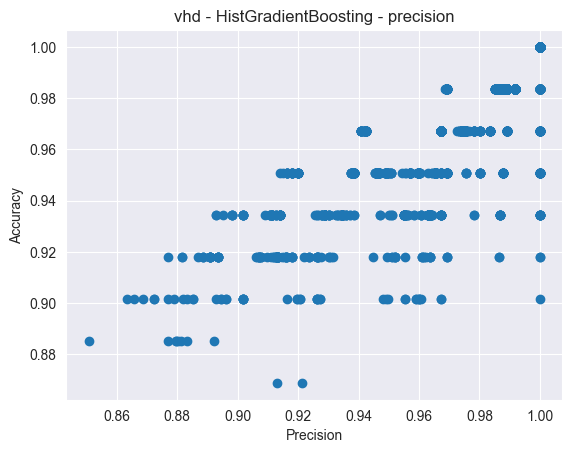

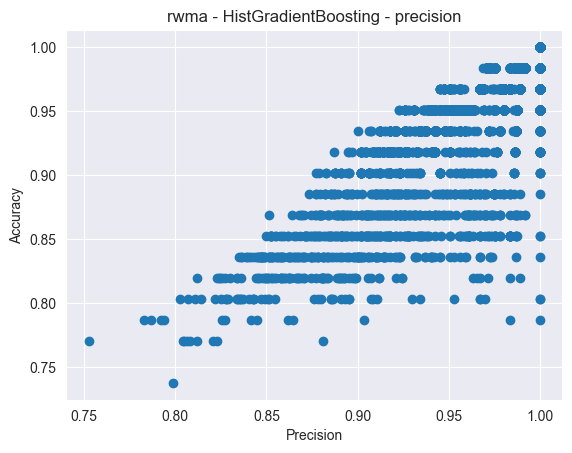

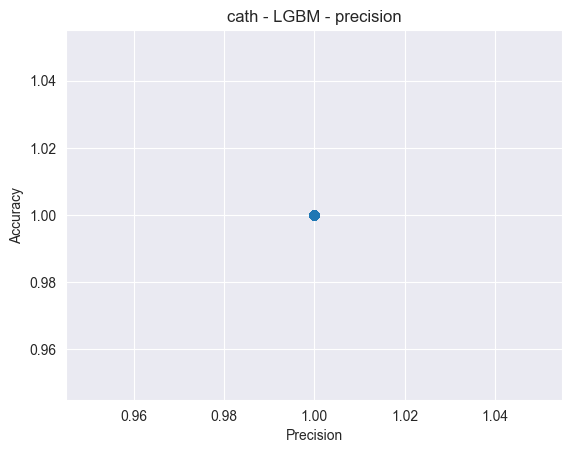

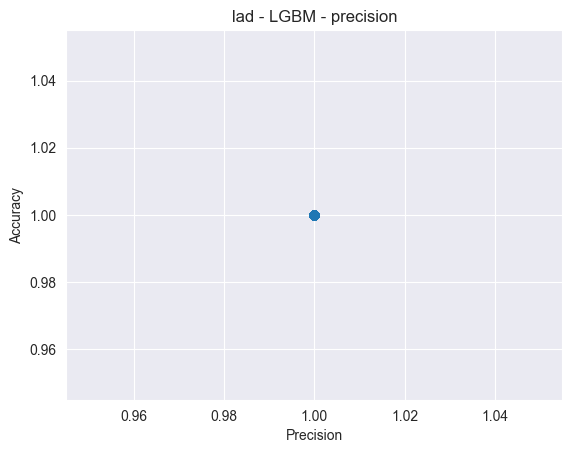

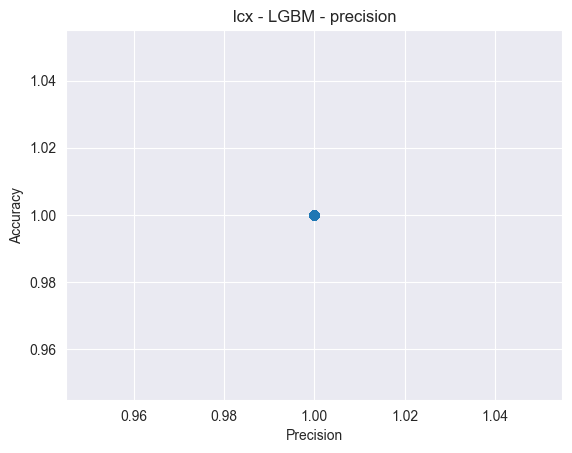

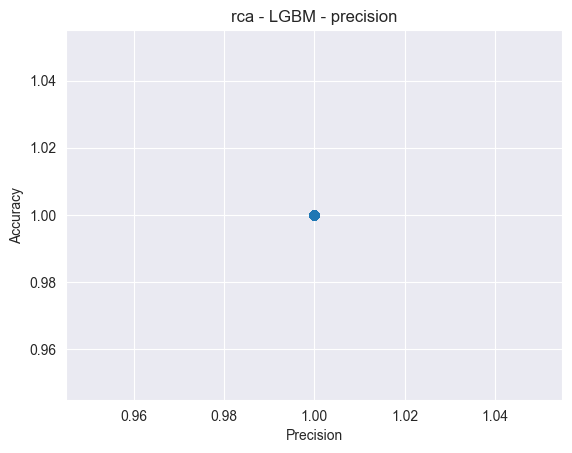

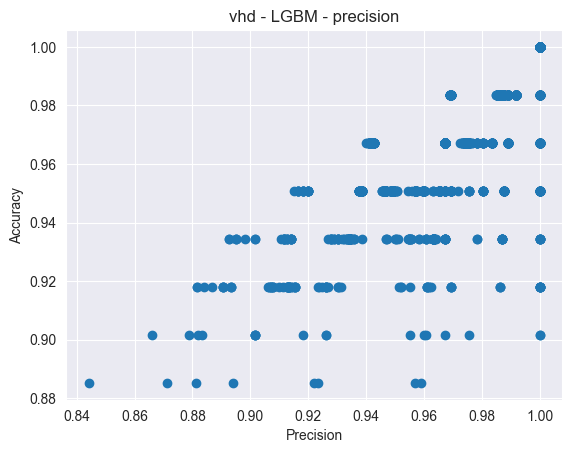

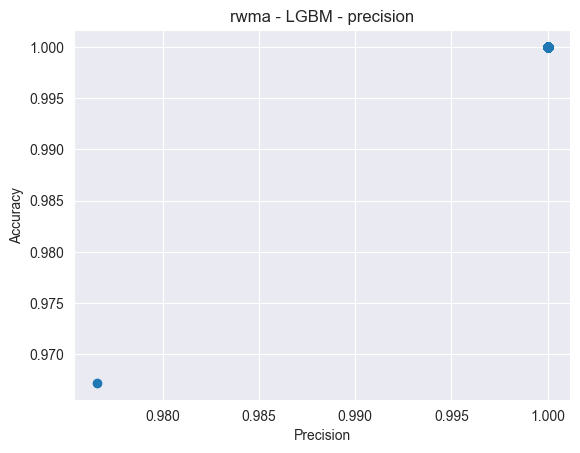

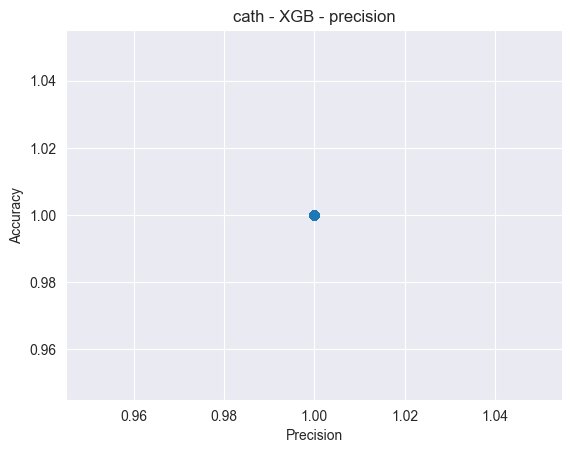

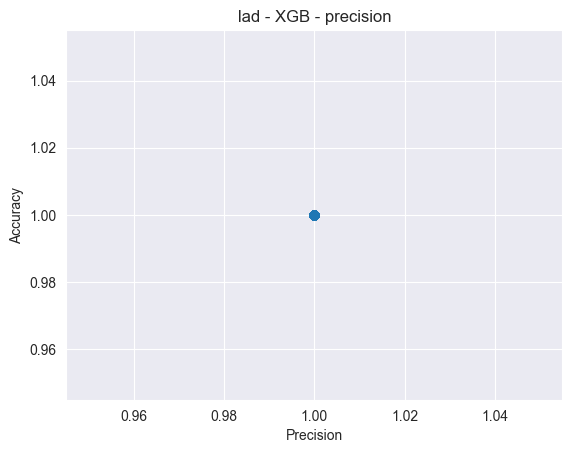

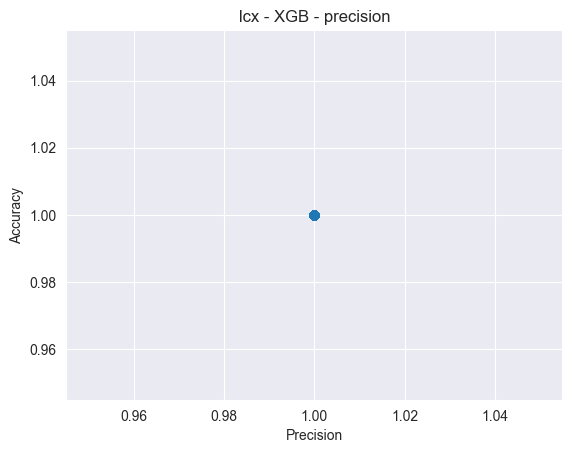

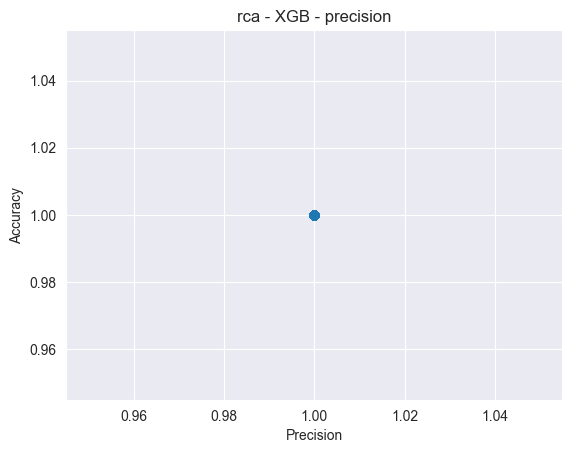

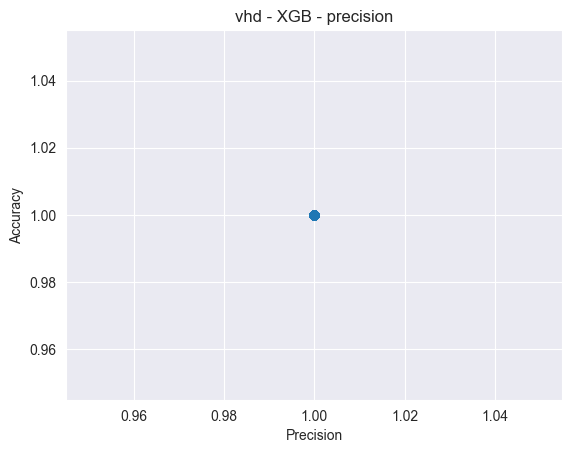

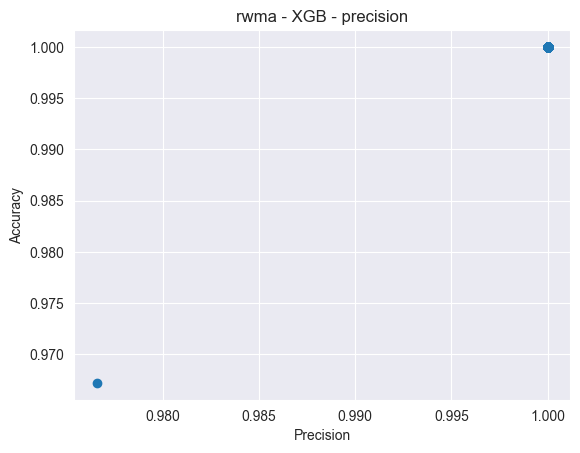

In [21]:
# Precision to Accuracy Plot
for i in df.columns:
    if 'precision' in i and 'balanced' not in i:
        plt.scatter(df[i], df[i.replace('precision', 'accuracy')])
        plt.title(i)
        plt.xlabel('Precision')
        plt.ylabel('Accuracy')
        plt.show()